# Optunaモデルの作成

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import optuna.integration.lightgbm as lgb

EDAで作成したデータファイル（``data_7.csv``）から特徴量を読み込む

In [2]:
df_7 = pd.read_csv('data_7.csv')
df_7.head()

,Id,age,domain1_var1,domain1_var2,domain2_var1,domain2_var2,IC_01,IC_07,IC_05,IC_16,...,CBN(13)_vs_DMN(94),CBN(18)_vs_DMN(94),CBN(4)_vs_DMN(94),CBN(7)_vs_DMN(94),CBN(18)_vs_CBN(13),CBN(4)_vs_CBN(13),CBN(7)_vs_CBN(13),CBN(4)_vs_CBN(18),CBN(7)_vs_CBN(18),CBN(7)_vs_CBN(4)
0,10001,57.436077,30.571975,62.553736,53.325130,51.427998,0.006070,0.014466,0.004136,0.000658,...,-0.203459,0.630524,0.227728,0.407087,0.450352,-0.074469,0.151244,-0.105504,0.626158,0.352528
1,10002,59.580851,50.969456,67.470628,60.651856,58.311361,0.009087,0.009291,0.007049,-0.002076,...,-0.306443,-0.047546,0.260530,-0.207901,0.595487,0.809261,0.648386,0.052190,0.772152,0.271778
2,10004,71.413018,53.152498,58.012103,52.418389,62.536641,0.004675,0.000957,0.006154,-0.000429,...,-0.276111,0.393040,0.370413,0.042790,0.437297,0.560578,0.440411,0.032559,0.923573,0.112833
3,10005,66.532630,51.847306,60.052535,52.108977,69.993075,-0.000398,0.006878,0.009051,0.000369,...,-0.248033,0.522701,0.107870,0.605457,0.660222,0.711500,0.321404,0.077306,1.063450,0.124246
4,10007,38.617381,49.197021,65.674285,40.151376,34.096421,0.005192,0.010585,0.012160,-0.000920,...,-0.178258,0.387695,0.166441,0.176302,0.504423,0.821638,0.517638,0.372172,0.787271,0.328486


Bayesian Optimizationで、自動的にハイパーパラメーターチューニングを実施するOptunaを使用。

学習に時間がかかるためクロスバリデーションせず、1通りのtrain/validationの分割で実施する。

==< domain1_var2 >==
X_train : (4407, 1457)


C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:61: ExperimentalWarning: train is experimental (supported from v0.18.0). The interface can change in the future.
  ExperimentalWarning,
C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:83: ExperimentalWarning: LightGBMTuner is experimental (supported from v1.5.0). The interface can change in the future.
  ExperimentalWarning,

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.61546	valid_1's rmse: 10.4077
[40]	training's rmse: 6.64566	valid_1's rmse: 10.0097
[60]	training's rmse: 5.31587	valid_1's rmse: 9.85377
[80]	training's rmse: 4.29706	valid_1's rmse: 9.79653
[100]	training's rmse: 3.51406	valid_1's rmse: 9.77083
[120]	training's rmse: 2.90465	valid_1's rmse: 9.74444
[140]	training's rmse: 2.42012	valid_1's rmse: 9.74005
Early stopping, best iteration is:
[131]	training's rmse: 2.62355	valid_1's rmse: 9.72616



feature_fraction, val_score: 9.726156:  14%|#4        | 1/7 [00:11<01:08, 11.34s/it][I 2020-06-28 21:21:53,044] Finished trial#0 with value: 9.726156007753785 with parameters: {'feature_fraction': 0.5}. Best is trial#0 with value: 9.726156007753785.

feature_fraction, val_score: 9.726156:  14%|#4        | 1/7 [00:11<01:08, 11.34s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.48176	valid_1's rmse: 10.4772
[40]	training's rmse: 6.50203	valid_1's rmse: 10.099
[60]	training's rmse: 5.14185	valid_1's rmse: 9.97616
[80]	training's rmse: 4.11464	valid_1's rmse: 9.92542
[100]	training's rmse: 3.33424	valid_1's rmse: 9.88993
[120]	training's rmse: 2.71114	valid_1's rmse: 9.87599
[140]	training's rmse: 2.23239	valid_1's rmse: 9.85814
[160]	training's rmse: 1.85097	valid_1's rmse: 9.83827
[180]	training's rmse: 1.53028	valid_1's rmse: 9.83583
[200]	training's rmse: 1.2733	valid_1's rmse: 9.84105
Early stopping, best iteration is:
[186]	training's rmse: 1.44684	valid_1's rmse: 9.83202



feature_fraction, val_score: 9.726156:  29%|##8       | 2/7 [00:57<01:48, 21.75s/it][I 2020-06-28 21:22:39,140] Finished trial#1 with value: 9.832017107149335 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#0 with value: 9.726156007753785.

feature_fraction, val_score: 9.726156:  29%|##8       | 2/7 [00:57<01:48, 21.75s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.45787	valid_1's rmse: 10.4072
[40]	training's rmse: 6.5009	valid_1's rmse: 10.0735
[60]	training's rmse: 5.14071	valid_1's rmse: 9.94368
[80]	training's rmse: 4.13148	valid_1's rmse: 9.91103
[100]	training's rmse: 3.35942	valid_1's rmse: 9.87683
[120]	training's rmse: 2.75525	valid_1's rmse: 9.86282
[140]	training's rmse: 2.27236	valid_1's rmse: 9.84746
[160]	training's rmse: 1.88409	valid_1's rmse: 9.83128
[180]	training's rmse: 1.5648	valid_1's rmse: 9.82416
[200]	training's rmse: 1.30411	valid_1's rmse: 9.83117
Early stopping, best iteration is:
[184]	training's rmse: 1.51405	valid_1's rmse: 9.82379



feature_fraction, val_score: 9.726156:  43%|####2     | 3/7 [01:42<01:54, 28.65s/it][I 2020-06-28 21:23:23,856] Finished trial#2 with value: 9.823793564584163 with parameters: {'feature_fraction': 0.8}. Best is trial#0 with value: 9.726156007753785.

feature_fraction, val_score: 9.726156:  43%|####2     | 3/7 [01:42<01:54, 28.65s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.54251	valid_1's rmse: 10.4313
[40]	training's rmse: 6.59728	valid_1's rmse: 9.95783
[60]	training's rmse: 5.22954	valid_1's rmse: 9.85381
[80]	training's rmse: 4.21537	valid_1's rmse: 9.80402
[100]	training's rmse: 3.43766	valid_1's rmse: 9.78225
[120]	training's rmse: 2.83067	valid_1's rmse: 9.75936
[140]	training's rmse: 2.34932	valid_1's rmse: 9.72466
[160]	training's rmse: 1.95916	valid_1's rmse: 9.70566
Early stopping, best iteration is:
[156]	training's rmse: 2.02983	valid_1's rmse: 9.7031



feature_fraction, val_score: 9.703097:  57%|#####7    | 4/7 [02:12<01:27, 29.18s/it][I 2020-06-28 21:23:54,254] Finished trial#3 with value: 9.70309656489774 with parameters: {'feature_fraction': 0.6}. Best is trial#3 with value: 9.70309656489774.

feature_fraction, val_score: 9.703097:  57%|#####7    | 4/7 [02:12<01:27, 29.18s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.67542	valid_1's rmse: 10.5112
[40]	training's rmse: 6.69927	valid_1's rmse: 10.0508
[60]	training's rmse: 5.37229	valid_1's rmse: 9.89277
[80]	training's rmse: 4.38146	valid_1's rmse: 9.80131
[100]	training's rmse: 3.60561	valid_1's rmse: 9.77329
[120]	training's rmse: 2.99201	valid_1's rmse: 9.77608
Early stopping, best iteration is:
[105]	training's rmse: 3.43959	valid_1's rmse: 9.76456



feature_fraction, val_score: 9.703097:  71%|#######1  | 5/7 [02:28<00:50, 25.17s/it][I 2020-06-28 21:24:10,075] Finished trial#4 with value: 9.764555242158197 with parameters: {'feature_fraction': 0.4}. Best is trial#3 with value: 9.70309656489774.

feature_fraction, val_score: 9.703097:  71%|#######1  | 5/7 [02:28<00:50, 25.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.44953	valid_1's rmse: 10.4186
[40]	training's rmse: 6.46154	valid_1's rmse: 10.0676
[60]	training's rmse: 5.09977	valid_1's rmse: 9.9214
[80]	training's rmse: 4.07739	valid_1's rmse: 9.87002
[100]	training's rmse: 3.29871	valid_1's rmse: 9.8209
[120]	training's rmse: 2.69966	valid_1's rmse: 9.80045
[140]	training's rmse: 2.2221	valid_1's rmse: 9.80087
[160]	training's rmse: 1.84022	valid_1's rmse: 9.78932
[180]	training's rmse: 1.52215	valid_1's rmse: 9.77746
[200]	training's rmse: 1.26147	valid_1's rmse: 9.77414
[220]	training's rmse: 1.05026	valid_1's rmse: 9.76431
[240]	training's rmse: 0.874678	valid_1's rmse: 9.76392
Early stopping, best iteration is:
[227]	training's rmse: 0.986564	valid_1's rmse: 9.76076



feature_fraction, val_score: 9.703097:  86%|########5 | 6/7 [03:31<00:36, 36.66s/it][I 2020-06-28 21:25:13,571] Finished trial#5 with value: 9.760758316951366 with parameters: {'feature_fraction': 1.0}. Best is trial#3 with value: 9.70309656489774.

feature_fraction, val_score: 9.703097:  86%|########5 | 6/7 [03:31<00:36, 36.66s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.48339	valid_1's rmse: 10.4628
[40]	training's rmse: 6.53718	valid_1's rmse: 10.0075
[60]	training's rmse: 5.19215	valid_1's rmse: 9.92145
[80]	training's rmse: 4.17595	valid_1's rmse: 9.88055
[100]	training's rmse: 3.3977	valid_1's rmse: 9.83679
[120]	training's rmse: 2.79727	valid_1's rmse: 9.82693
[140]	training's rmse: 2.30565	valid_1's rmse: 9.81315
Early stopping, best iteration is:
[136]	training's rmse: 2.39494	valid_1's rmse: 9.80844



feature_fraction, val_score: 9.703097: 100%|##########| 7/7 [04:03<00:00, 34.79s/it]

num_leaves, val_score: 9.703097:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.11613	valid_1's rmse: 10.4178
[40]	training's rmse: 5.98311	valid_1's rmse: 10.0567
[60]	training's rmse: 4.55856	valid_1's rmse: 9.92682
[80]	training's rmse: 3.51224	valid_1's rmse: 9.86185
[100]	training's rmse: 2.73808	valid_1's rmse: 9.81949
[120]	training's rmse: 2.15961	valid_1's rmse: 9.81628
Early stopping, best iteration is:
[113]	training's rmse: 2.34752	valid_1's rmse: 9.81161



num_leaves, val_score: 9.703097:   5%|5         | 1/20 [00:28<09:02, 28.54s/it][I 2020-06-28 21:26:13,821] Finished trial#7 with value: 9.811609845515324 with parameters: {'num_leaves': 38}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:   5%|5         | 1/20 [00:28<09:02, 28.54s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.67033	valid_1's rmse: 10.4397
[40]	training's rmse: 2.02185	valid_1's rmse: 10.208
[60]	training's rmse: 1.01515	valid_1's rmse: 10.1479
[80]	training's rmse: 0.60674	valid_1's rmse: 10.1301
[100]	training's rmse: 0.419051	valid_1's rmse: 10.1207
[120]	training's rmse: 0.316775	valid_1's rmse: 10.1159
[140]	training's rmse: 0.251983	valid_1's rmse: 10.1155
Early stopping, best iteration is:
[129]	training's rmse: 0.284401	valid_1's rmse: 10.1149



num_leaves, val_score: 9.703097:  10%|#         | 2/20 [01:54<13:43, 45.73s/it][I 2020-06-28 21:27:39,671] Finished trial#8 with value: 10.114920412322245 with parameters: {'num_leaves': 196}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  10%|#         | 2/20 [01:54<13:43, 45.73s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.2218	valid_1's rmse: 10.4548
[40]	training's rmse: 3.48348	valid_1's rmse: 10.1262
[60]	training's rmse: 2.00956	valid_1's rmse: 10.0273
[80]	training's rmse: 1.1774	valid_1's rmse: 9.98739
[100]	training's rmse: 0.698473	valid_1's rmse: 9.97866
[120]	training's rmse: 0.418119	valid_1's rmse: 9.97113
[140]	training's rmse: 0.25264	valid_1's rmse: 9.97004
[160]	training's rmse: 0.154997	valid_1's rmse: 9.96973
Early stopping, best iteration is:
[148]	training's rmse: 0.206814	valid_1's rmse: 9.96862



num_leaves, val_score: 9.703097:  15%|#5        | 3/20 [03:02<14:49, 52.33s/it][I 2020-06-28 21:28:47,399] Finished trial#9 with value: 9.968620345407235 with parameters: {'num_leaves': 86}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  15%|#5        | 3/20 [03:02<14:49, 52.33s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.67033	valid_1's rmse: 10.4397
[40]	training's rmse: 2.02185	valid_1's rmse: 10.208
[60]	training's rmse: 1.01515	valid_1's rmse: 10.1479
[80]	training's rmse: 0.60674	valid_1's rmse: 10.1301
[100]	training's rmse: 0.419051	valid_1's rmse: 10.1207
[120]	training's rmse: 0.316775	valid_1's rmse: 10.1159
[140]	training's rmse: 0.251983	valid_1's rmse: 10.1155
Early stopping, best iteration is:
[129]	training's rmse: 0.284401	valid_1's rmse: 10.1149



num_leaves, val_score: 9.703097:  20%|##        | 4/20 [04:26<16:33, 62.10s/it][I 2020-06-28 21:30:12,277] Finished trial#10 with value: 10.114920412322245 with parameters: {'num_leaves': 199}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  20%|##        | 4/20 [04:27<16:33, 62.10s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.31795	valid_1's rmse: 10.3864
[40]	training's rmse: 3.5975	valid_1's rmse: 10.0534
[60]	training's rmse: 2.11723	valid_1's rmse: 9.96121
[80]	training's rmse: 1.26754	valid_1's rmse: 9.91158
[100]	training's rmse: 0.764071	valid_1's rmse: 9.90034
[120]	training's rmse: 0.462607	valid_1's rmse: 9.89454
[140]	training's rmse: 0.282113	valid_1's rmse: 9.88942
[160]	training's rmse: 0.172585	valid_1's rmse: 9.88374
[180]	training's rmse: 0.106019	valid_1's rmse: 9.88276
[200]	training's rmse: 0.0655469	valid_1's rmse: 9.88283
Early stopping, best iteration is:
[181]	training's rmse: 0.103517	valid_1's rmse: 9.88252



num_leaves, val_score: 9.703097:  25%|##5       | 5/20 [05:43<16:38, 66.56s/it][I 2020-06-28 21:31:29,247] Finished trial#11 with value: 9.88252339664419 with parameters: {'num_leaves': 82}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  25%|##5       | 5/20 [05:44<16:38, 66.56s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.51343	valid_1's rmse: 10.5209
[40]	training's rmse: 2.72172	valid_1's rmse: 10.2756
[60]	training's rmse: 1.40967	valid_1's rmse: 10.1909
[80]	training's rmse: 0.751453	valid_1's rmse: 10.168
[100]	training's rmse: 0.417915	valid_1's rmse: 10.1606
[120]	training's rmse: 0.248235	valid_1's rmse: 10.1525
[140]	training's rmse: 0.165265	valid_1's rmse: 10.1528
Early stopping, best iteration is:
[125]	training's rmse: 0.221323	valid_1's rmse: 10.1519



num_leaves, val_score: 9.703097:  30%|###       | 6/20 [06:53<15:43, 67.38s/it][I 2020-06-28 21:32:38,549] Finished trial#12 with value: 10.151894965630715 with parameters: {'num_leaves': 112}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  30%|###       | 6/20 [06:53<15:43, 67.38s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.7703	valid_1's rmse: 10.4399
[40]	training's rmse: 2.0777	valid_1's rmse: 10.1521
[60]	training's rmse: 1.02664	valid_1's rmse: 10.0767
[80]	training's rmse: 0.593464	valid_1's rmse: 10.0639
[100]	training's rmse: 0.394534	valid_1's rmse: 10.0565
[120]	training's rmse: 0.286611	valid_1's rmse: 10.0583
Early stopping, best iteration is:
[100]	training's rmse: 0.394534	valid_1's rmse: 10.0565



num_leaves, val_score: 9.703097:  35%|###5      | 7/20 [07:59<14:29, 66.92s/it][I 2020-06-28 21:33:44,383] Finished trial#13 with value: 10.056496878622507 with parameters: {'num_leaves': 159}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  35%|###5      | 7/20 [07:59<14:29, 66.92s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.67033	valid_1's rmse: 10.4397
[40]	training's rmse: 2.02185	valid_1's rmse: 10.208
[60]	training's rmse: 1.01515	valid_1's rmse: 10.1479
[80]	training's rmse: 0.60674	valid_1's rmse: 10.1301
[100]	training's rmse: 0.419051	valid_1's rmse: 10.1207
[120]	training's rmse: 0.316775	valid_1's rmse: 10.1159
[140]	training's rmse: 0.251983	valid_1's rmse: 10.1155
Early stopping, best iteration is:
[129]	training's rmse: 0.284401	valid_1's rmse: 10.1149



num_leaves, val_score: 9.703097:  40%|####      | 8/20 [09:24<14:29, 72.46s/it][I 2020-06-28 21:35:09,785] Finished trial#14 with value: 10.114920412322245 with parameters: {'num_leaves': 197}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  40%|####      | 8/20 [09:24<14:29, 72.46s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.67033	valid_1's rmse: 10.4397
[40]	training's rmse: 2.02185	valid_1's rmse: 10.208
[60]	training's rmse: 1.01515	valid_1's rmse: 10.1479
[80]	training's rmse: 0.60674	valid_1's rmse: 10.1301
[100]	training's rmse: 0.419051	valid_1's rmse: 10.1207
[120]	training's rmse: 0.316775	valid_1's rmse: 10.1159
[140]	training's rmse: 0.251983	valid_1's rmse: 10.1155
Early stopping, best iteration is:
[129]	training's rmse: 0.284401	valid_1's rmse: 10.1149



num_leaves, val_score: 9.703097:  45%|####5     | 9/20 [10:50<14:01, 76.46s/it][I 2020-06-28 21:36:35,578] Finished trial#15 with value: 10.114920412322245 with parameters: {'num_leaves': 207}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  45%|####5     | 9/20 [10:50<14:01, 76.46s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.08848	valid_1's rmse: 10.3781
[40]	training's rmse: 4.56782	valid_1's rmse: 10.0579
[60]	training's rmse: 3.03288	valid_1's rmse: 9.97382
[80]	training's rmse: 2.05056	valid_1's rmse: 9.93964
[100]	training's rmse: 1.40316	valid_1's rmse: 9.93059
Early stopping, best iteration is:
[87]	training's rmse: 1.79267	valid_1's rmse: 9.9245



num_leaves, val_score: 9.703097:  50%|#####     | 10/20 [11:23<10:35, 63.55s/it][I 2020-06-28 21:37:08,983] Finished trial#16 with value: 9.924502665179546 with parameters: {'num_leaves': 60}. Best is trial#7 with value: 9.811609845515324.

num_leaves, val_score: 9.703097:  50%|#####     | 10/20 [11:23<10:35, 63.55s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.87107	valid_1's rmse: 10.5472
[40]	training's rmse: 8.71862	valid_1's rmse: 10.1076
[60]	training's rmse: 7.89346	valid_1's rmse: 9.93948
[80]	training's rmse: 7.22737	valid_1's rmse: 9.86216
[100]	training's rmse: 6.65528	valid_1's rmse: 9.84018
[120]	training's rmse: 6.16916	valid_1's rmse: 9.79496
[140]	training's rmse: 5.73793	valid_1's rmse: 9.78155
[160]	training's rmse: 5.35659	valid_1's rmse: 9.75959
[180]	training's rmse: 5.00389	valid_1's rmse: 9.75461
[200]	training's rmse: 4.68145	valid_1's rmse: 9.73016
[220]	training's rmse: 4.39427	valid_1's rmse: 9.72368
[240]	training's rmse: 4.12925	valid_1's rmse: 9.71648
Early stopping, best iteration is:
[229]	training's rmse: 4.27166	valid_1's rmse: 9.70401



num_leaves, val_score: 9.703097:  55%|#####5    | 11/20 [11:41<07:28, 49.87s/it][I 2020-06-28 21:37:26,933] Finished trial#17 with value: 9.704008899893878 with parameters: {'num_leaves': 12}. Best is trial#17 with value: 9.704008899893878.

num_leaves, val_score: 9.703097:  55%|#####5    | 11/20 [11:41<07:28, 49.87s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.4473	valid_1's rmse: 10.7585
[40]	training's rmse: 9.64495	valid_1's rmse: 10.2559
[60]	training's rmse: 9.13048	valid_1's rmse: 10.0403
[80]	training's rmse: 8.71102	valid_1's rmse: 9.91228
[100]	training's rmse: 8.36304	valid_1's rmse: 9.85808
[120]	training's rmse: 8.04532	valid_1's rmse: 9.81767
[140]	training's rmse: 7.76304	valid_1's rmse: 9.79689
[160]	training's rmse: 7.50027	valid_1's rmse: 9.77246
[180]	training's rmse: 7.25912	valid_1's rmse: 9.7712
[200]	training's rmse: 7.02537	valid_1's rmse: 9.75408
[220]	training's rmse: 6.81303	valid_1's rmse: 9.73484
Early stopping, best iteration is:
[210]	training's rmse: 6.91786	valid_1's rmse: 9.72752



num_leaves, val_score: 9.703097:  60%|######    | 12/20 [11:49<04:58, 37.37s/it][I 2020-06-28 21:37:35,151] Finished trial#18 with value: 9.727521776804569 with parameters: {'num_leaves': 6}. Best is trial#17 with value: 9.704008899893878.

num_leaves, val_score: 9.703097:  60%|######    | 12/20 [11:50<04:58, 37.37s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.69909	valid_1's rmse: 10.5
[40]	training's rmse: 8.45444	valid_1's rmse: 10.0604
[60]	training's rmse: 7.54801	valid_1's rmse: 9.85558
[80]	training's rmse: 6.81998	valid_1's rmse: 9.76239
[100]	training's rmse: 6.21109	valid_1's rmse: 9.74074
[120]	training's rmse: 5.68129	valid_1's rmse: 9.73494
Early stopping, best iteration is:
[115]	training's rmse: 5.80285	valid_1's rmse: 9.71356



num_leaves, val_score: 9.703097:  65%|######5   | 13/20 [12:02<03:29, 29.94s/it][I 2020-06-28 21:37:47,745] Finished trial#19 with value: 9.71356354967929 with parameters: {'num_leaves': 14}. Best is trial#17 with value: 9.704008899893878.

num_leaves, val_score: 9.703097:  65%|######5   | 13/20 [12:02<03:29, 29.94s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 11.4162	valid_1's rmse: 11.5353
[40]	training's rmse: 10.7857	valid_1's rmse: 10.9262
[60]	training's rmse: 10.4862	valid_1's rmse: 10.6534
[80]	training's rmse: 10.2788	valid_1's rmse: 10.4935
[100]	training's rmse: 10.1175	valid_1's rmse: 10.3719
[120]	training's rmse: 9.98349	valid_1's rmse: 10.2657
[140]	training's rmse: 9.86807	valid_1's rmse: 10.1843
[160]	training's rmse: 9.76558	valid_1's rmse: 10.1173
[180]	training's rmse: 9.67371	valid_1's rmse: 10.0642
[200]	training's rmse: 9.58922	valid_1's rmse: 10.0254
[220]	training's rmse: 9.51169	valid_1's rmse: 9.99053
[240]	training's rmse: 9.43928	valid_1's rmse: 9.95464
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 9.40505	valid_1's rmse: 9.93248



num_leaves, val_score: 9.703097:  70%|#######   | 14/20 [12:04<02:09, 21.62s/it][I 2020-06-28 21:37:49,947] Finished trial#20 with value: 9.932477326391373 with parameters: {'num_leaves': 2}. Best is trial#17 with value: 9.704008899893878.

num_leaves, val_score: 9.703097:  70%|#######   | 14/20 [12:04<02:09, 21.62s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.42341	valid_1's rmse: 10.463
[40]	training's rmse: 6.38653	valid_1's rmse: 10.0472
[60]	training's rmse: 5.02259	valid_1's rmse: 9.96522
[80]	training's rmse: 4.01142	valid_1's rmse: 9.899
[100]	training's rmse: 3.23635	valid_1's rmse: 9.86995
[120]	training's rmse: 2.63644	valid_1's rmse: 9.85666
[140]	training's rmse: 2.15623	valid_1's rmse: 9.8451
[160]	training's rmse: 1.78097	valid_1's rmse: 9.83625
[180]	training's rmse: 1.47972	valid_1's rmse: 9.82679
[200]	training's rmse: 1.22498	valid_1's rmse: 9.8207
[220]	training's rmse: 1.01977	valid_1's rmse: 9.81447
[240]	training's rmse: 0.844811	valid_1's rmse: 9.81649
Early stopping, best iteration is:
[224]	training's rmse: 0.985694	valid_1's rmse: 9.81253



num_leaves, val_score: 9.703097:  75%|#######5  | 15/20 [12:47<02:19, 27.91s/it][I 2020-06-28 21:38:32,535] Finished trial#21 with value: 9.812530806157882 with parameters: {'num_leaves': 33}. Best is trial#17 with value: 9.704008899893878.

num_leaves, val_score: 9.703097:  75%|#######5  | 15/20 [12:47<02:19, 27.91s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3639	valid_1's rmse: 10.7132
[40]	training's rmse: 9.49916	valid_1's rmse: 10.1742
[60]	training's rmse: 8.91896	valid_1's rmse: 9.94312
[80]	training's rmse: 8.4502	valid_1's rmse: 9.83262
[100]	training's rmse: 8.05181	valid_1's rmse: 9.75955
[120]	training's rmse: 7.70103	valid_1's rmse: 9.68771
[140]	training's rmse: 7.38685	valid_1's rmse: 9.66207
[160]	training's rmse: 7.0944	valid_1's rmse: 9.62358
[180]	training's rmse: 6.82694	valid_1's rmse: 9.64255
Early stopping, best iteration is:
[161]	training's rmse: 7.08255	valid_1's rmse: 9.62093



num_leaves, val_score: 9.620934:  80%|########  | 16/20 [12:55<01:28, 22.03s/it][I 2020-06-28 21:38:40,832] Finished trial#22 with value: 9.620934238992872 with parameters: {'num_leaves': 7}. Best is trial#22 with value: 9.620934238992872.

num_leaves, val_score: 9.620934:  80%|########  | 16/20 [12:55<01:28, 22.03s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.67033	valid_1's rmse: 10.4397
[40]	training's rmse: 2.02185	valid_1's rmse: 10.208
[60]	training's rmse: 1.01515	valid_1's rmse: 10.1479
[80]	training's rmse: 0.60674	valid_1's rmse: 10.1301
[100]	training's rmse: 0.419051	valid_1's rmse: 10.1207
[120]	training's rmse: 0.316775	valid_1's rmse: 10.1159
[140]	training's rmse: 0.251983	valid_1's rmse: 10.1155
Early stopping, best iteration is:
[129]	training's rmse: 0.284401	valid_1's rmse: 10.1149



num_leaves, val_score: 9.620934:  85%|########5 | 17/20 [14:20<02:02, 40.76s/it][I 2020-06-28 21:40:05,302] Finished trial#23 with value: 10.114920412322245 with parameters: {'num_leaves': 250}. Best is trial#22 with value: 9.620934238992872.

num_leaves, val_score: 9.620934:  85%|########5 | 17/20 [14:20<02:02, 40.76s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.7964	valid_1's rmse: 10.4499
[40]	training's rmse: 5.51016	valid_1's rmse: 10.0486
[60]	training's rmse: 4.02047	valid_1's rmse: 9.93624
[80]	training's rmse: 2.98053	valid_1's rmse: 9.89178
[100]	training's rmse: 2.23608	valid_1's rmse: 9.86069
[120]	training's rmse: 1.6879	valid_1's rmse: 9.84522
[140]	training's rmse: 1.27901	valid_1's rmse: 9.83067
[160]	training's rmse: 0.974511	valid_1's rmse: 9.82623
[180]	training's rmse: 0.746827	valid_1's rmse: 9.82012
[200]	training's rmse: 0.576452	valid_1's rmse: 9.81953
[220]	training's rmse: 0.442184	valid_1's rmse: 9.81746
[240]	training's rmse: 0.343303	valid_1's rmse: 9.81411
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 0.301618	valid_1's rmse: 9.81397



num_leaves, val_score: 9.620934:  90%|######### | 18/20 [15:18<01:32, 46.11s/it][I 2020-06-28 21:41:03,895] Finished trial#24 with value: 9.813971310024746 with parameters: {'num_leaves': 45}. Best is trial#22 with value: 9.620934238992872.

num_leaves, val_score: 9.620934:  90%|######### | 18/20 [15:18<01:32, 46.11s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.14127	valid_1's rmse: 10.4242
[40]	training's rmse: 2.36135	valid_1's rmse: 10.1359
[60]	training's rmse: 1.16864	valid_1's rmse: 10.0736
[80]	training's rmse: 0.625139	valid_1's rmse: 10.0619
[100]	training's rmse: 0.37741	valid_1's rmse: 10.059
[120]	training's rmse: 0.259787	valid_1's rmse: 10.0568
[140]	training's rmse: 0.199187	valid_1's rmse: 10.0551
Early stopping, best iteration is:
[139]	training's rmse: 0.201426	valid_1's rmse: 10.0548



num_leaves, val_score: 9.620934:  95%|#########5| 19/20 [16:40<00:56, 56.88s/it][I 2020-06-28 21:42:25,945] Finished trial#25 with value: 10.0548400378046 with parameters: {'num_leaves': 132}. Best is trial#22 with value: 9.620934238992872.

num_leaves, val_score: 9.620934:  95%|#########5| 19/20 [16:40<00:56, 56.88s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 11.4162	valid_1's rmse: 11.5353
[40]	training's rmse: 10.7857	valid_1's rmse: 10.9262
[60]	training's rmse: 10.4862	valid_1's rmse: 10.6534
[80]	training's rmse: 10.2788	valid_1's rmse: 10.4935
[100]	training's rmse: 10.1175	valid_1's rmse: 10.3719
[120]	training's rmse: 9.98349	valid_1's rmse: 10.2657
[140]	training's rmse: 9.86807	valid_1's rmse: 10.1843
[160]	training's rmse: 9.76558	valid_1's rmse: 10.1173
[180]	training's rmse: 9.67371	valid_1's rmse: 10.0642
[200]	training's rmse: 9.58922	valid_1's rmse: 10.0254
[220]	training's rmse: 9.51169	valid_1's rmse: 9.99053
[240]	training's rmse: 9.43928	valid_1's rmse: 9.95464
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 9.40505	valid_1's rmse: 9.93248



num_leaves, val_score: 9.620934: 100%|##########| 20/20 [16:43<00:00, 50.16s/it]

bagging, val_score: 9.620934:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3217	valid_1's rmse: 10.6559
[40]	training's rmse: 9.47582	valid_1's rmse: 10.1653
[60]	training's rmse: 8.90473	valid_1's rmse: 9.9339
[80]	training's rmse: 8.44563	valid_1's rmse: 9.78556
[100]	training's rmse: 8.03858	valid_1's rmse: 9.74621
[120]	training's rmse: 7.6912	valid_1's rmse: 9.69656
[140]	training's rmse: 7.36175	valid_1's rmse: 9.67523
[160]	training's rmse: 7.0648	valid_1's rmse: 9.66301
[180]	training's rmse: 6.78554	valid_1's rmse: 9.66008
[200]	training's rmse: 6.52435	valid_1's rmse: 9.66326
[220]	training's rmse: 6.28354	valid_1's rmse: 9.65372
Early stopping, best iteration is:
[208]	training's rmse: 6.43078	valid_1's rmse: 9.64753



bagging, val_score: 9.620934:  10%|#         | 1/10 [00:09<01:27,  9.68s/it][I 2020-06-28 21:42:38,180] Finished trial#27 with value: 9.64752513780287 with parameters: {'bagging_fraction': 0.829137115091486, 'bagging_freq': 4}. Best is trial#27 with value: 9.64752513780287.

bagging, val_score: 9.620934:  10%|#         | 1/10 [00:09<01:27,  9.68s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3332	valid_1's rmse: 10.6702
[40]	training's rmse: 9.48687	valid_1's rmse: 10.1701
[60]	training's rmse: 8.91426	valid_1's rmse: 9.96899
[80]	training's rmse: 8.45127	valid_1's rmse: 9.87903
[100]	training's rmse: 8.04502	valid_1's rmse: 9.79709
[120]	training's rmse: 7.69136	valid_1's rmse: 9.75485
[140]	training's rmse: 7.37208	valid_1's rmse: 9.73266
[160]	training's rmse: 7.0803	valid_1's rmse: 9.69821
[180]	training's rmse: 6.78589	valid_1's rmse: 9.66354
[200]	training's rmse: 6.51915	valid_1's rmse: 9.61293
[220]	training's rmse: 6.27086	valid_1's rmse: 9.61661
Early stopping, best iteration is:
[205]	training's rmse: 6.45567	valid_1's rmse: 9.6068



bagging, val_score: 9.606795:  20%|##        | 2/10 [00:19<01:18,  9.87s/it][I 2020-06-28 21:42:48,492] Finished trial#28 with value: 9.606795441221216 with parameters: {'bagging_fraction': 0.6358213486073606, 'bagging_freq': 5}. Best is trial#28 with value: 9.606795441221216.

bagging, val_score: 9.606795:  20%|##        | 2/10 [00:20<01:18,  9.87s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



bagging, val_score: 9.537783:  30%|###       | 3/10 [00:31<01:12, 10.41s/it][I 2020-06-28 21:43:00,174] Finished trial#29 with value: 9.537782889208385 with parameters: {'bagging_fraction': 0.9088533228505308, 'bagging_freq': 3}. Best is trial#29 with value: 9.537782889208385.

bagging, val_score: 9.537783:  30%|###       | 3/10 [00:31<01:12, 10.41s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3346	valid_1's rmse: 10.6967
[40]	training's rmse: 9.47867	valid_1's rmse: 10.1828
[60]	training's rmse: 8.8967	valid_1's rmse: 9.92839
[80]	training's rmse: 8.43568	valid_1's rmse: 9.8323
[100]	training's rmse: 8.03956	valid_1's rmse: 9.74526
[120]	training's rmse: 7.67319	valid_1's rmse: 9.68508
[140]	training's rmse: 7.34834	valid_1's rmse: 9.65367
[160]	training's rmse: 7.05991	valid_1's rmse: 9.64916
Early stopping, best iteration is:
[147]	training's rmse: 7.24935	valid_1's rmse: 9.64125



bagging, val_score: 9.537783:  40%|####      | 4/10 [00:39<00:57,  9.64s/it][I 2020-06-28 21:43:08,033] Finished trial#30 with value: 9.641246510910568 with parameters: {'bagging_fraction': 0.9450992996649702, 'bagging_freq': 7}. Best is trial#29 with value: 9.537782889208385.

bagging, val_score: 9.537783:  40%|####      | 4/10 [00:39<00:57,  9.64s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3402	valid_1's rmse: 10.6584
[40]	training's rmse: 9.48698	valid_1's rmse: 10.178
[60]	training's rmse: 8.90741	valid_1's rmse: 9.94242
[80]	training's rmse: 8.44413	valid_1's rmse: 9.77422
[100]	training's rmse: 8.04574	valid_1's rmse: 9.73332
[120]	training's rmse: 7.68279	valid_1's rmse: 9.69264
[140]	training's rmse: 7.35465	valid_1's rmse: 9.66892
[160]	training's rmse: 7.05908	valid_1's rmse: 9.65811
[180]	training's rmse: 6.78369	valid_1's rmse: 9.6595
Early stopping, best iteration is:
[163]	training's rmse: 7.01778	valid_1's rmse: 9.64499



bagging, val_score: 9.537783:  50%|#####     | 5/10 [00:48<00:47,  9.42s/it][I 2020-06-28 21:43:16,920] Finished trial#31 with value: 9.644986428818155 with parameters: {'bagging_fraction': 0.874560510005556, 'bagging_freq': 4}. Best is trial#29 with value: 9.537782889208385.

bagging, val_score: 9.537783:  50%|#####     | 5/10 [00:48<00:47,  9.42s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3382	valid_1's rmse: 10.7207
[40]	training's rmse: 9.48146	valid_1's rmse: 10.1781
[60]	training's rmse: 8.90232	valid_1's rmse: 9.9743
[80]	training's rmse: 8.43589	valid_1's rmse: 9.86693
[100]	training's rmse: 8.03389	valid_1's rmse: 9.82649
[120]	training's rmse: 7.6748	valid_1's rmse: 9.78872
[140]	training's rmse: 7.35733	valid_1's rmse: 9.76615
[160]	training's rmse: 7.05206	valid_1's rmse: 9.74775
[180]	training's rmse: 6.78099	valid_1's rmse: 9.71471
[200]	training's rmse: 6.53538	valid_1's rmse: 9.69808
[220]	training's rmse: 6.29134	valid_1's rmse: 9.66167
[240]	training's rmse: 6.05976	valid_1's rmse: 9.65467
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 5.94921	valid_1's rmse: 9.6483



bagging, val_score: 9.537783:  60%|######    | 6/10 [00:58<00:38,  9.72s/it][I 2020-06-28 21:43:27,340] Finished trial#32 with value: 9.648300472809634 with parameters: {'bagging_fraction': 0.8385977889151321, 'bagging_freq': 6}. Best is trial#29 with value: 9.537782889208385.

bagging, val_score: 9.537783:  60%|######    | 6/10 [00:58<00:38,  9.72s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.327	valid_1's rmse: 10.6659
[40]	training's rmse: 9.48679	valid_1's rmse: 10.1973
[60]	training's rmse: 8.90978	valid_1's rmse: 9.98051
[80]	training's rmse: 8.44136	valid_1's rmse: 9.87999
[100]	training's rmse: 8.04114	valid_1's rmse: 9.80364
[120]	training's rmse: 7.67764	valid_1's rmse: 9.76232
Early stopping, best iteration is:
[114]	training's rmse: 7.77614	valid_1's rmse: 9.75501



bagging, val_score: 9.537783:  70%|#######   | 7/10 [01:05<00:26,  8.95s/it][I 2020-06-28 21:43:34,489] Finished trial#33 with value: 9.75501262999104 with parameters: {'bagging_fraction': 0.9535152819586307, 'bagging_freq': 7}. Best is trial#29 with value: 9.537782889208385.

bagging, val_score: 9.537783:  70%|#######   | 7/10 [01:06<00:26,  8.95s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3413	valid_1's rmse: 10.7083
[40]	training's rmse: 9.50538	valid_1's rmse: 10.2804
[60]	training's rmse: 8.95119	valid_1's rmse: 10.0542
[80]	training's rmse: 8.50572	valid_1's rmse: 9.91918
[100]	training's rmse: 8.12252	valid_1's rmse: 9.82546
[120]	training's rmse: 7.77513	valid_1's rmse: 9.78378
[140]	training's rmse: 7.47352	valid_1's rmse: 9.77792
Early stopping, best iteration is:
[122]	training's rmse: 7.74694	valid_1's rmse: 9.76855



bagging, val_score: 9.537783:  80%|########  | 8/10 [01:11<00:15,  7.98s/it][I 2020-06-28 21:43:40,203] Finished trial#34 with value: 9.768551567347963 with parameters: {'bagging_fraction': 0.4278506845436116, 'bagging_freq': 6}. Best is trial#29 with value: 9.537782889208385.

bagging, val_score: 9.537783:  80%|########  | 8/10 [01:11<00:15,  7.98s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3548	valid_1's rmse: 10.6577
[40]	training's rmse: 9.50444	valid_1's rmse: 10.1308
[60]	training's rmse: 8.92716	valid_1's rmse: 9.91423
[80]	training's rmse: 8.45453	valid_1's rmse: 9.78629
[100]	training's rmse: 8.04581	valid_1's rmse: 9.69501
[120]	training's rmse: 7.69314	valid_1's rmse: 9.66915
[140]	training's rmse: 7.37747	valid_1's rmse: 9.62566
[160]	training's rmse: 7.07656	valid_1's rmse: 9.61221
[180]	training's rmse: 6.79324	valid_1's rmse: 9.61914
Early stopping, best iteration is:
[164]	training's rmse: 7.01712	valid_1's rmse: 9.60736



bagging, val_score: 9.537783:  90%|######### | 9/10 [01:20<00:08,  8.34s/it][I 2020-06-28 21:43:49,372] Finished trial#35 with value: 9.607360026941059 with parameters: {'bagging_fraction': 0.9655512619228578, 'bagging_freq': 5}. Best is trial#29 with value: 9.537782889208385.

bagging, val_score: 9.537783:  90%|######### | 9/10 [01:21<00:08,  8.34s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3251	valid_1's rmse: 10.685
[40]	training's rmse: 9.47903	valid_1's rmse: 10.2049
[60]	training's rmse: 8.89543	valid_1's rmse: 10.0059
[80]	training's rmse: 8.43993	valid_1's rmse: 9.90846
[100]	training's rmse: 8.0436	valid_1's rmse: 9.8253
[120]	training's rmse: 7.69181	valid_1's rmse: 9.8158
[140]	training's rmse: 7.37187	valid_1's rmse: 9.77516
[160]	training's rmse: 7.08052	valid_1's rmse: 9.76261
[180]	training's rmse: 6.81415	valid_1's rmse: 9.75547
[200]	training's rmse: 6.55929	valid_1's rmse: 9.7401
[220]	training's rmse: 6.3219	valid_1's rmse: 9.70659
[240]	training's rmse: 6.10279	valid_1's rmse: 9.70531
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 5.98594	valid_1's rmse: 9.70386



bagging, val_score: 9.537783: 100%|##########| 10/10 [01:31<00:00,  9.17s/it]

feature_fraction_stage2, val_score: 9.537783:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3383	valid_1's rmse: 10.6916
[40]	training's rmse: 9.48302	valid_1's rmse: 10.2029
[60]	training's rmse: 8.89953	valid_1's rmse: 9.96827
[80]	training's rmse: 8.41568	valid_1's rmse: 9.82007
[100]	training's rmse: 8.01526	valid_1's rmse: 9.75865
[120]	training's rmse: 7.66129	valid_1's rmse: 9.70718
[140]	training's rmse: 7.33452	valid_1's rmse: 9.66449
[160]	training's rmse: 7.03395	valid_1's rmse: 9.65038
[180]	training's rmse: 6.76272	valid_1's rmse: 9.63642
[200]	training's rmse: 6.51043	valid_1's rmse: 9.62423
[220]	training's rmse: 6.27499	valid_1's rmse: 9.60332
[240]	training's rmse: 6.04306	valid_1's rmse: 9.61211
Early stopping, best iteration is:
[221]	training's rmse: 6.26537	valid_1's rmse: 9.60162



feature_fraction_stage2, val_score: 9.537783:  17%|#6        | 1/6 [00:12<01:01, 12.29s/it][I 2020-06-28 21:44:12,542] Finished trial#37 with value: 9.601619935568262 with parameters: {'feature_fraction': 0.6799999999999999}. Best is trial#37 with value: 9.601619935568262.

feature_fraction_stage2, val_score: 9.537783:  17%|#6        | 1/6 [00:12<01:01, 12.29s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.34	valid_1's rmse: 10.659
[40]	training's rmse: 9.48133	valid_1's rmse: 10.1637
[60]	training's rmse: 8.89637	valid_1's rmse: 9.97223
[80]	training's rmse: 8.41992	valid_1's rmse: 9.83727
[100]	training's rmse: 8.01337	valid_1's rmse: 9.76298
[120]	training's rmse: 7.65543	valid_1's rmse: 9.71848
[140]	training's rmse: 7.33033	valid_1's rmse: 9.70933
[160]	training's rmse: 7.02571	valid_1's rmse: 9.69481
[180]	training's rmse: 6.75644	valid_1's rmse: 9.66624
[200]	training's rmse: 6.49789	valid_1's rmse: 9.62811
[220]	training's rmse: 6.25542	valid_1's rmse: 9.62905
[240]	training's rmse: 6.03122	valid_1's rmse: 9.63855
Early stopping, best iteration is:
[223]	training's rmse: 6.22055	valid_1's rmse: 9.6263



feature_fraction_stage2, val_score: 9.537783:  33%|###3      | 2/6 [00:24<00:48, 12.21s/it][I 2020-06-28 21:44:24,588] Finished trial#38 with value: 9.6262981683357 with parameters: {'feature_fraction': 0.6479999999999999}. Best is trial#37 with value: 9.601619935568262.

feature_fraction_stage2, val_score: 9.537783:  33%|###3      | 2/6 [00:24<00:48, 12.21s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3856	valid_1's rmse: 10.7021
[40]	training's rmse: 9.5042	valid_1's rmse: 10.1421
[60]	training's rmse: 8.92426	valid_1's rmse: 9.90914
[80]	training's rmse: 8.45206	valid_1's rmse: 9.81332
[100]	training's rmse: 8.0504	valid_1's rmse: 9.71363
[120]	training's rmse: 7.69997	valid_1's rmse: 9.63919
[140]	training's rmse: 7.38519	valid_1's rmse: 9.63001
Early stopping, best iteration is:
[131]	training's rmse: 7.52585	valid_1's rmse: 9.61494



feature_fraction_stage2, val_score: 9.537783:  50%|#####     | 3/6 [00:30<00:31, 10.53s/it][I 2020-06-28 21:44:31,173] Finished trial#39 with value: 9.614941165523971 with parameters: {'feature_fraction': 0.552}. Best is trial#37 with value: 9.601619935568262.

feature_fraction_stage2, val_score: 9.537783:  50%|#####     | 3/6 [00:31<00:31, 10.53s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3425	valid_1's rmse: 10.6976
[40]	training's rmse: 9.48386	valid_1's rmse: 10.171
[60]	training's rmse: 8.91025	valid_1's rmse: 9.93681
[80]	training's rmse: 8.44416	valid_1's rmse: 9.78711
[100]	training's rmse: 8.03299	valid_1's rmse: 9.72645
[120]	training's rmse: 7.67817	valid_1's rmse: 9.66265
[140]	training's rmse: 7.36574	valid_1's rmse: 9.63875
[160]	training's rmse: 7.07122	valid_1's rmse: 9.62927
[180]	training's rmse: 6.79331	valid_1's rmse: 9.62233
Early stopping, best iteration is:
[178]	training's rmse: 6.82014	valid_1's rmse: 9.61281



feature_fraction_stage2, val_score: 9.537783:  67%|######6   | 4/6 [00:40<00:20, 10.26s/it][I 2020-06-28 21:44:40,824] Finished trial#40 with value: 9.612807749601988 with parameters: {'feature_fraction': 0.584}. Best is trial#37 with value: 9.601619935568262.

feature_fraction_stage2, val_score: 9.537783:  67%|######6   | 4/6 [00:40<00:20, 10.26s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.338	valid_1's rmse: 10.6945
[40]	training's rmse: 9.46724	valid_1's rmse: 10.1274
[60]	training's rmse: 8.89333	valid_1's rmse: 9.92416
[80]	training's rmse: 8.42853	valid_1's rmse: 9.84526
[100]	training's rmse: 8.03536	valid_1's rmse: 9.78396
[120]	training's rmse: 7.68227	valid_1's rmse: 9.74122
[140]	training's rmse: 7.35614	valid_1's rmse: 9.71581
[160]	training's rmse: 7.04963	valid_1's rmse: 9.70467
[180]	training's rmse: 6.78423	valid_1's rmse: 9.68472
[200]	training's rmse: 6.52673	valid_1's rmse: 9.67904
[220]	training's rmse: 6.28053	valid_1's rmse: 9.62938
[240]	training's rmse: 6.06202	valid_1's rmse: 9.63132
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 5.94941	valid_1's rmse: 9.62143



feature_fraction_stage2, val_score: 9.537783:  83%|########3 | 5/6 [00:52<00:10, 10.67s/it][I 2020-06-28 21:44:52,448] Finished trial#41 with value: 9.621430244381811 with parameters: {'feature_fraction': 0.616}. Best is trial#37 with value: 9.601619935568262.

feature_fraction_stage2, val_score: 9.537783:  83%|########3 | 5/6 [00:52<00:10, 10.67s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.4209	valid_1's rmse: 10.7519
[40]	training's rmse: 9.50517	valid_1's rmse: 10.1779
[60]	training's rmse: 8.92648	valid_1's rmse: 9.93871
[80]	training's rmse: 8.45353	valid_1's rmse: 9.81626
[100]	training's rmse: 8.04945	valid_1's rmse: 9.73107
[120]	training's rmse: 7.69752	valid_1's rmse: 9.6794
[140]	training's rmse: 7.38475	valid_1's rmse: 9.63298
[160]	training's rmse: 7.08341	valid_1's rmse: 9.60719
[180]	training's rmse: 6.81167	valid_1's rmse: 9.58205
Early stopping, best iteration is:
[176]	training's rmse: 6.86574	valid_1's rmse: 9.57909



feature_fraction_stage2, val_score: 9.537783: 100%|##########| 6/6 [01:00<00:00, 10.01s/it]

regularization_factors, val_score: 9.537783:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3347	valid_1's rmse: 10.677
[40]	training's rmse: 9.4677	valid_1's rmse: 10.1759
[60]	training's rmse: 8.87667	valid_1's rmse: 9.94728
[80]	training's rmse: 8.40166	valid_1's rmse: 9.81912
[100]	training's rmse: 8.00285	valid_1's rmse: 9.76274
[120]	training's rmse: 7.65184	valid_1's rmse: 9.71298
[140]	training's rmse: 7.33668	valid_1's rmse: 9.63662
[160]	training's rmse: 7.04126	valid_1's rmse: 9.62504
[180]	training's rmse: 6.76332	valid_1's rmse: 9.60215
[200]	training's rmse: 6.5044	valid_1's rmse: 9.58272
[220]	training's rmse: 6.2568	valid_1's rmse: 9.57209
Early stopping, best iteration is:
[218]	training's rmse: 6.28106	valid_1's rmse: 9.56911



regularization_factors, val_score: 9.537783:   5%|5         | 1/20 [00:10<03:27, 10.92s/it][I 2020-06-28 21:45:11,261] Finished trial#43 with value: 9.569106528645369 with parameters: {'lambda_l1': 0.002450313597348191, 'lambda_l2': 0.09389228172479033}. Best is trial#43 with value: 9.569106528645369.

regularization_factors, val_score: 9.537783:   5%|5         | 1/20 [00:11<03:27, 10.92s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3435	valid_1's rmse: 10.6759
[40]	training's rmse: 9.48167	valid_1's rmse: 10.1277
[60]	training's rmse: 8.91429	valid_1's rmse: 9.92147
[80]	training's rmse: 8.44713	valid_1's rmse: 9.78898
[100]	training's rmse: 8.04668	valid_1's rmse: 9.70217
[120]	training's rmse: 7.7026	valid_1's rmse: 9.666
[140]	training's rmse: 7.38233	valid_1's rmse: 9.62056
[160]	training's rmse: 7.09453	valid_1's rmse: 9.59202
[180]	training's rmse: 6.82885	valid_1's rmse: 9.58022
Early stopping, best iteration is:
[174]	training's rmse: 6.90475	valid_1's rmse: 9.57044



regularization_factors, val_score: 9.537783:  10%|#         | 2/20 [00:19<03:05, 10.29s/it][I 2020-06-28 21:45:20,077] Finished trial#44 with value: 9.570435339037308 with parameters: {'lambda_l1': 0.0018650573034648624, 'lambda_l2': 1.7425342362679381}. Best is trial#43 with value: 9.569106528645369.

regularization_factors, val_score: 9.537783:  10%|#         | 2/20 [00:19<03:05, 10.29s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3346	valid_1's rmse: 10.677
[40]	training's rmse: 9.4676	valid_1's rmse: 10.1759
[60]	training's rmse: 8.88276	valid_1's rmse: 9.94227
[80]	training's rmse: 8.40927	valid_1's rmse: 9.83798
[100]	training's rmse: 8.00675	valid_1's rmse: 9.78699
[120]	training's rmse: 7.65437	valid_1's rmse: 9.74519
[140]	training's rmse: 7.3348	valid_1's rmse: 9.67454
[160]	training's rmse: 7.04176	valid_1's rmse: 9.6549
[180]	training's rmse: 6.76947	valid_1's rmse: 9.65684
[200]	training's rmse: 6.51244	valid_1's rmse: 9.61382
[220]	training's rmse: 6.26681	valid_1's rmse: 9.60452
[240]	training's rmse: 6.03654	valid_1's rmse: 9.60157
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 5.92643	valid_1's rmse: 9.60021



regularization_factors, val_score: 9.537783:  15%|#5        | 3/20 [00:31<03:03, 10.79s/it][I 2020-06-28 21:45:32,034] Finished trial#45 with value: 9.600214740619114 with parameters: {'lambda_l1': 0.3216166510558927, 'lambda_l2': 2.886064717893848e-06}. Best is trial#43 with value: 9.569106528645369.

regularization_factors, val_score: 9.537783:  15%|#5        | 3/20 [00:31<03:03, 10.79s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537783:  20%|##        | 4/20 [00:43<02:55, 10.99s/it][I 2020-06-28 21:45:43,499] Finished trial#46 with value: 9.537782842834412 with parameters: {'lambda_l1': 3.830440219977019e-05, 'lambda_l2': 4.8168204318616805e-05}. Best is trial#46 with value: 9.537782842834412.

regularization_factors, val_score: 9.537783:  20%|##        | 4/20 [00:43<02:55, 10.99s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47654	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89875	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42942	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02015	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67948	valid_1's rmse: 9.67571
[140]	training's rmse: 7.35282	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06015	valid_1's rmse: 9.61344
[180]	training's rmse: 6.78771	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52759	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28184	valid_1's rmse: 9.54468
[240]	training's rmse: 6.05001	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23564	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  25%|##5       | 5/20 [00:54<02:44, 11.00s/it][I 2020-06-28 21:45:54,506] Finished trial#47 with value: 9.537782419665776 with parameters: {'lambda_l1': 0.005084374477674569, 'lambda_l2': 4.39566518833969e-07}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  25%|##5       | 5/20 [00:54<02:44, 11.00s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3346	valid_1's rmse: 10.677
[40]	training's rmse: 9.46757	valid_1's rmse: 10.1758
[60]	training's rmse: 8.87647	valid_1's rmse: 9.94725
[80]	training's rmse: 8.40139	valid_1's rmse: 9.8191
[100]	training's rmse: 8.00251	valid_1's rmse: 9.76272
[120]	training's rmse: 7.65139	valid_1's rmse: 9.71297
[140]	training's rmse: 7.33612	valid_1's rmse: 9.63661
[160]	training's rmse: 7.03925	valid_1's rmse: 9.6245
[180]	training's rmse: 6.76751	valid_1's rmse: 9.60225
[200]	training's rmse: 6.5046	valid_1's rmse: 9.58955
[220]	training's rmse: 6.26096	valid_1's rmse: 9.5583
[240]	training's rmse: 6.03819	valid_1's rmse: 9.55654
Early stopping, best iteration is:
[229]	training's rmse: 6.15989	valid_1's rmse: 9.54752



regularization_factors, val_score: 9.537782:  30%|###       | 6/20 [01:05<02:34, 11.04s/it][I 2020-06-28 21:46:05,654] Finished trial#48 with value: 9.547517842619916 with parameters: {'lambda_l1': 4.3782352647523544e-05, 'lambda_l2': 0.06255916967204442}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  30%|###       | 6/20 [01:05<02:34, 11.04s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  35%|###5      | 7/20 [01:16<02:23, 11.07s/it][I 2020-06-28 21:46:16,797] Finished trial#49 with value: 9.537782889048588 with parameters: {'lambda_l1': 6.706218714128876e-07, 'lambda_l2': 1.2500975515990403e-07}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  35%|###5      | 7/20 [01:16<02:23, 11.07s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3557	valid_1's rmse: 10.7043
[40]	training's rmse: 9.49155	valid_1's rmse: 10.161
[60]	training's rmse: 8.92332	valid_1's rmse: 9.96278
[80]	training's rmse: 8.45161	valid_1's rmse: 9.824
[100]	training's rmse: 8.04542	valid_1's rmse: 9.77025
[120]	training's rmse: 7.69166	valid_1's rmse: 9.7009
[140]	training's rmse: 7.37783	valid_1's rmse: 9.66721
[160]	training's rmse: 7.07409	valid_1's rmse: 9.65153
[180]	training's rmse: 6.80192	valid_1's rmse: 9.62848
[200]	training's rmse: 6.54676	valid_1's rmse: 9.61855
[220]	training's rmse: 6.30218	valid_1's rmse: 9.5997
[240]	training's rmse: 6.08028	valid_1's rmse: 9.60164
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 5.96564	valid_1's rmse: 9.59298



regularization_factors, val_score: 9.537782:  40%|####      | 8/20 [01:28<02:15, 11.29s/it][I 2020-06-28 21:46:28,580] Finished trial#50 with value: 9.592977220144396 with parameters: {'lambda_l1': 3.1251332711594038, 'lambda_l2': 0.002335053798435898}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  40%|####      | 8/20 [01:28<02:15, 11.29s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  45%|####5     | 9/20 [01:39<02:02, 11.15s/it][I 2020-06-28 21:46:39,416] Finished trial#51 with value: 9.537782856915976 with parameters: {'lambda_l1': 0.0003488451925907558, 'lambda_l2': 1.0070873068654875e-08}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  45%|####5     | 9/20 [01:39<02:02, 11.15s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3558	valid_1's rmse: 10.7132
[40]	training's rmse: 9.48071	valid_1's rmse: 10.167
[60]	training's rmse: 8.90828	valid_1's rmse: 9.93618
[80]	training's rmse: 8.44822	valid_1's rmse: 9.8355
[100]	training's rmse: 8.03851	valid_1's rmse: 9.76231
[120]	training's rmse: 7.68452	valid_1's rmse: 9.69273
[140]	training's rmse: 7.35719	valid_1's rmse: 9.65037
[160]	training's rmse: 7.05722	valid_1's rmse: 9.6079
[180]	training's rmse: 6.7837	valid_1's rmse: 9.6117
[200]	training's rmse: 6.52003	valid_1's rmse: 9.58891
[220]	training's rmse: 6.27837	valid_1's rmse: 9.57133
[240]	training's rmse: 6.05244	valid_1's rmse: 9.57374
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 5.93875	valid_1's rmse: 9.5673



regularization_factors, val_score: 9.537782:  50%|#####     | 10/20 [01:50<01:52, 11.28s/it][I 2020-06-28 21:46:51,002] Finished trial#52 with value: 9.567300121956166 with parameters: {'lambda_l1': 0.19437798438513973, 'lambda_l2': 0.18309251854538838}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  50%|#####     | 10/20 [01:50<01:52, 11.28s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  55%|#####5    | 11/20 [02:02<01:42, 11.37s/it][I 2020-06-28 21:47:02,570] Finished trial#53 with value: 9.537782888600914 with parameters: {'lambda_l1': 1.0974367449398588e-08, 'lambda_l2': 6.592850007874533e-07}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  55%|#####5    | 11/20 [02:02<01:42, 11.37s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  60%|######    | 12/20 [02:12<01:29, 11.14s/it][I 2020-06-28 21:47:13,180] Finished trial#54 with value: 9.537782854829008 with parameters: {'lambda_l1': 7.74803339627879e-06, 'lambda_l2': 3.7525446248090743e-05}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  60%|######    | 12/20 [02:12<01:29, 11.14s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47655	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89877	valid_1's rmse: 9.9394
[80]	training's rmse: 8.42945	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02019	valid_1's rmse: 9.74308
[120]	training's rmse: 7.67953	valid_1's rmse: 9.67572
[140]	training's rmse: 7.35288	valid_1's rmse: 9.65029
[160]	training's rmse: 7.06022	valid_1's rmse: 9.61344
[180]	training's rmse: 6.78779	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52769	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28334	valid_1's rmse: 9.55144
Early stopping, best iteration is:
[219]	training's rmse: 6.29373	valid_1's rmse: 9.54664



regularization_factors, val_score: 9.537782:  65%|######5   | 13/20 [02:24<01:18, 11.20s/it][I 2020-06-28 21:47:24,500] Finished trial#55 with value: 9.546636130527432 with parameters: {'lambda_l1': 0.021593654496075403, 'lambda_l2': 0.0001376964891367229}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  65%|######5   | 13/20 [02:24<01:18, 11.20s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  70%|#######   | 14/20 [02:35<01:07, 11.24s/it][I 2020-06-28 21:47:35,849] Finished trial#56 with value: 9.537782889115956 with parameters: {'lambda_l1': 8.037411495172343e-07, 'lambda_l2': 1.0438064765553186e-08}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  70%|#######   | 14/20 [02:35<01:07, 11.24s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  75%|#######5  | 15/20 [02:46<00:56, 11.22s/it][I 2020-06-28 21:47:47,020] Finished trial#57 with value: 9.537782878016774 with parameters: {'lambda_l1': 4.0569754273318694e-05, 'lambda_l2': 8.531282005741357e-06}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  75%|#######5  | 15/20 [02:46<00:56, 11.22s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47655	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89877	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42945	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02018	valid_1's rmse: 9.74308
[120]	training's rmse: 7.67952	valid_1's rmse: 9.67571
[140]	training's rmse: 7.35288	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06022	valid_1's rmse: 9.61344
[180]	training's rmse: 6.78778	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52768	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28333	valid_1's rmse: 9.55144
Early stopping, best iteration is:
[219]	training's rmse: 6.29372	valid_1's rmse: 9.54664



regularization_factors, val_score: 9.537782:  80%|########  | 16/20 [02:57<00:44, 11.05s/it][I 2020-06-28 21:47:57,672] Finished trial#58 with value: 9.546635155948916 with parameters: {'lambda_l1': 0.010491390786360162, 'lambda_l2': 0.002346993006859562}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  80%|########  | 16/20 [02:57<00:44, 11.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89874	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42941	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02014	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67946	valid_1's rmse: 9.67571
[140]	training's rmse: 7.3528	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06013	valid_1's rmse: 9.61343
[180]	training's rmse: 6.78768	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52757	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28181	valid_1's rmse: 9.54468
[240]	training's rmse: 6.04997	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23561	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  85%|########5 | 17/20 [03:08<00:33, 11.18s/it][I 2020-06-28 21:48:09,143] Finished trial#59 with value: 9.537782889132059 with parameters: {'lambda_l1': 1.458819461908411e-08, 'lambda_l2': 1.2326327140083652e-07}. Best is trial#47 with value: 9.537782419665776.

regularization_factors, val_score: 9.537782:  85%|########5 | 17/20 [03:08<00:33, 11.18s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89875	valid_1's rmse: 9.93939
[80]	training's rmse: 8.42942	valid_1's rmse: 9.81578
[100]	training's rmse: 8.02015	valid_1's rmse: 9.74307
[120]	training's rmse: 7.67948	valid_1's rmse: 9.67571
[140]	training's rmse: 7.35282	valid_1's rmse: 9.65028
[160]	training's rmse: 7.06015	valid_1's rmse: 9.61344
[180]	training's rmse: 6.7877	valid_1's rmse: 9.58722
[200]	training's rmse: 6.52759	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28184	valid_1's rmse: 9.54468
[240]	training's rmse: 6.05	valid_1's rmse: 9.54922
Early stopping, best iteration is:
[224]	training's rmse: 6.23564	valid_1's rmse: 9.53778



regularization_factors, val_score: 9.537782:  90%|######### | 18/20 [03:19<00:22, 11.17s/it][I 2020-06-28 21:48:20,314] Finished trial#60 with value: 9.53778197413201 with parameters: {'lambda_l1': 0.00019469096779554766, 'lambda_l2': 0.0009990594377990293}. Best is trial#60 with value: 9.53778197413201.

regularization_factors, val_score: 9.537782:  90%|######### | 18/20 [03:20<00:22, 11.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47661	valid_1's rmse: 10.1527
[60]	training's rmse: 8.89886	valid_1's rmse: 9.93942
[80]	training's rmse: 8.42957	valid_1's rmse: 9.8158
[100]	training's rmse: 8.02034	valid_1's rmse: 9.74309
[120]	training's rmse: 7.67972	valid_1's rmse: 9.67573
[140]	training's rmse: 7.35312	valid_1's rmse: 9.6503
[160]	training's rmse: 7.0605	valid_1's rmse: 9.61345
[180]	training's rmse: 6.78812	valid_1's rmse: 9.58723
[200]	training's rmse: 6.52806	valid_1's rmse: 9.57296
[220]	training's rmse: 6.28375	valid_1's rmse: 9.55143
Early stopping, best iteration is:
[219]	training's rmse: 6.29414	valid_1's rmse: 9.54663



regularization_factors, val_score: 9.537782:  95%|#########5| 19/20 [03:30<00:11, 11.03s/it][I 2020-06-28 21:48:30,995] Finished trial#61 with value: 9.546632198288659 with parameters: {'lambda_l1': 0.08495969998135042, 'lambda_l2': 0.0009340805283730779}. Best is trial#60 with value: 9.53778197413201.

regularization_factors, val_score: 9.537782:  95%|#########5| 19/20 [03:30<00:11, 11.03s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3435	valid_1's rmse: 10.6758
[40]	training's rmse: 9.4781	valid_1's rmse: 10.1383
[60]	training's rmse: 8.91092	valid_1's rmse: 9.94479
[80]	training's rmse: 8.4467	valid_1's rmse: 9.84249
[100]	training's rmse: 8.04559	valid_1's rmse: 9.7607
[120]	training's rmse: 7.6952	valid_1's rmse: 9.71321
[140]	training's rmse: 7.37285	valid_1's rmse: 9.68947
[160]	training's rmse: 7.07795	valid_1's rmse: 9.65612
[180]	training's rmse: 6.808	valid_1's rmse: 9.65859
[200]	training's rmse: 6.55082	valid_1's rmse: 9.63992
[220]	training's rmse: 6.31799	valid_1's rmse: 9.61338
[240]	training's rmse: 6.0965	valid_1's rmse: 9.6192
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 5.9828	valid_1's rmse: 9.62663



regularization_factors, val_score: 9.537782: 100%|##########| 20/20 [03:42<00:00, 11.15s/it]

min_data_in_leaf, val_score: 9.537782:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3395	valid_1's rmse: 10.683
[40]	training's rmse: 9.47653	valid_1's rmse: 10.1527
[60]	training's rmse: 8.90511	valid_1's rmse: 9.94478
[80]	training's rmse: 8.43372	valid_1's rmse: 9.81271
[100]	training's rmse: 8.02697	valid_1's rmse: 9.7334
[120]	training's rmse: 7.67581	valid_1's rmse: 9.68409
[140]	training's rmse: 7.35704	valid_1's rmse: 9.65544
[160]	training's rmse: 7.06392	valid_1's rmse: 9.62712
[180]	training's rmse: 6.79859	valid_1's rmse: 9.61951
[200]	training's rmse: 6.54608	valid_1's rmse: 9.5825
[220]	training's rmse: 6.29797	valid_1's rmse: 9.56393
Early stopping, best iteration is:
[218]	training's rmse: 6.32064	valid_1's rmse: 9.55712



min_data_in_leaf, val_score: 9.537782:  20%|##        | 1/5 [00:10<00:43, 10.94s/it][I 2020-06-28 21:48:54,266] Finished trial#63 with value: 9.557116524671214 with parameters: {'min_child_samples': 25}. Best is trial#63 with value: 9.557116524671214.

min_data_in_leaf, val_score: 9.537782:  20%|##        | 1/5 [00:11<00:43, 10.94s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3429	valid_1's rmse: 10.6817
[40]	training's rmse: 9.46445	valid_1's rmse: 10.165
[60]	training's rmse: 8.89137	valid_1's rmse: 9.96259
[80]	training's rmse: 8.4255	valid_1's rmse: 9.83519
[100]	training's rmse: 8.02924	valid_1's rmse: 9.79424
[120]	training's rmse: 7.67933	valid_1's rmse: 9.72858
[140]	training's rmse: 7.37372	valid_1's rmse: 9.71871
[160]	training's rmse: 7.08072	valid_1's rmse: 9.69128
[180]	training's rmse: 6.81713	valid_1's rmse: 9.68775
[200]	training's rmse: 6.56453	valid_1's rmse: 9.66801
[220]	training's rmse: 6.32314	valid_1's rmse: 9.66137
[240]	training's rmse: 6.10504	valid_1's rmse: 9.64316
Did not meet early stopping. Best iteration is:
[250]	training's rmse: 5.99055	valid_1's rmse: 9.63221



min_data_in_leaf, val_score: 9.537782:  40%|####      | 2/5 [00:20<00:31, 10.65s/it][I 2020-06-28 21:49:04,240] Finished trial#64 with value: 9.63220657190722 with parameters: {'min_child_samples': 50}. Best is trial#63 with value: 9.557116524671214.

min_data_in_leaf, val_score: 9.537782:  40%|####      | 2/5 [00:21<00:31, 10.65s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3399	valid_1's rmse: 10.6913
[40]	training's rmse: 9.4785	valid_1's rmse: 10.1743
[60]	training's rmse: 8.9045	valid_1's rmse: 9.98756
[80]	training's rmse: 8.42406	valid_1's rmse: 9.88079
[100]	training's rmse: 8.02243	valid_1's rmse: 9.81379
[120]	training's rmse: 7.67094	valid_1's rmse: 9.75564
[140]	training's rmse: 7.3494	valid_1's rmse: 9.72204
[160]	training's rmse: 7.0554	valid_1's rmse: 9.70673
[180]	training's rmse: 6.78365	valid_1's rmse: 9.69623
[200]	training's rmse: 6.52528	valid_1's rmse: 9.67113
[220]	training's rmse: 6.27782	valid_1's rmse: 9.67039
[240]	training's rmse: 6.04879	valid_1's rmse: 9.69466
Early stopping, best iteration is:
[224]	training's rmse: 6.22931	valid_1's rmse: 9.66237



min_data_in_leaf, val_score: 9.537782:  60%|######    | 3/5 [00:32<00:21, 10.97s/it][I 2020-06-28 21:49:15,951] Finished trial#65 with value: 9.662373347512444 with parameters: {'min_child_samples': 10}. Best is trial#63 with value: 9.557116524671214.

min_data_in_leaf, val_score: 9.537782:  60%|######    | 3/5 [00:32<00:21, 10.97s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3399	valid_1's rmse: 10.6913
[40]	training's rmse: 9.48015	valid_1's rmse: 10.1861
[60]	training's rmse: 8.89234	valid_1's rmse: 9.95775
[80]	training's rmse: 8.41954	valid_1's rmse: 9.87577
[100]	training's rmse: 8.01412	valid_1's rmse: 9.81512
[120]	training's rmse: 7.65839	valid_1's rmse: 9.78177
[140]	training's rmse: 7.33728	valid_1's rmse: 9.75215
[160]	training's rmse: 7.02991	valid_1's rmse: 9.71938
[180]	training's rmse: 6.74844	valid_1's rmse: 9.69838
[200]	training's rmse: 6.49213	valid_1's rmse: 9.68122
[220]	training's rmse: 6.24607	valid_1's rmse: 9.66323
[240]	training's rmse: 6.01569	valid_1's rmse: 9.66423
Early stopping, best iteration is:
[221]	training's rmse: 6.23644	valid_1's rmse: 9.66037



min_data_in_leaf, val_score: 9.537782:  80%|########  | 4/5 [00:44<00:11, 11.35s/it][I 2020-06-28 21:49:28,189] Finished trial#66 with value: 9.660372015181053 with parameters: {'min_child_samples': 5}. Best is trial#63 with value: 9.557116524671214.

min_data_in_leaf, val_score: 9.537782:  80%|########  | 4/5 [00:45<00:11, 11.35s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3426	valid_1's rmse: 10.6869
[40]	training's rmse: 9.48025	valid_1's rmse: 10.1427
[60]	training's rmse: 8.90989	valid_1's rmse: 9.91286
[80]	training's rmse: 8.45287	valid_1's rmse: 9.81001
[100]	training's rmse: 8.07119	valid_1's rmse: 9.73738
[120]	training's rmse: 7.72813	valid_1's rmse: 9.68638
[140]	training's rmse: 7.41088	valid_1's rmse: 9.62596
[160]	training's rmse: 7.12164	valid_1's rmse: 9.57641
[180]	training's rmse: 6.87097	valid_1's rmse: 9.54178
[200]	training's rmse: 6.61976	valid_1's rmse: 9.5209
[220]	training's rmse: 6.38705	valid_1's rmse: 9.53093
Early stopping, best iteration is:
[201]	training's rmse: 6.60768	valid_1's rmse: 9.5203



min_data_in_leaf, val_score: 9.520302: 100%|##########| 5/5 [00:53<00:00, 10.61s/it]


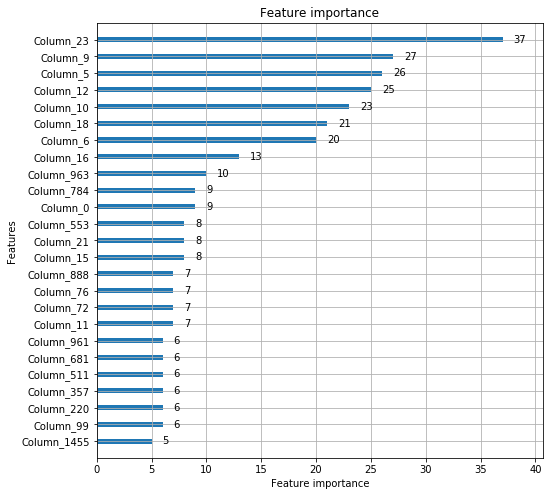

==< domain1_var1 >==
X_train : (4407, 1458)


C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:61: ExperimentalWarning: train is experimental (supported from v0.18.0). The interface can change in the future.
  ExperimentalWarning,
C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:83: ExperimentalWarning: LightGBMTuner is experimental (supported from v1.5.0). The interface can change in the future.
  ExperimentalWarning,

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.53464	valid_1's rmse: 9.49113
Early stopping, best iteration is:
[13]	training's rmse: 8.13915	valid_1's rmse: 9.46619



feature_fraction, val_score: 9.466192:  14%|#4        | 1/7 [00:09<00:56,  9.38s/it][I 2020-06-28 21:49:47,177] Finished trial#0 with value: 9.466192061752205 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#0 with value: 9.466192061752205.

feature_fraction, val_score: 9.466192:  14%|#4        | 1/7 [00:09<00:56,  9.38s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.52246	valid_1's rmse: 9.53698
Early stopping, best iteration is:
[19]	training's rmse: 7.60469	valid_1's rmse: 9.51999



feature_fraction, val_score: 9.466192:  29%|##8       | 2/7 [00:20<00:49,  9.91s/it][I 2020-06-28 21:49:58,309] Finished trial#1 with value: 9.519986879203321 with parameters: {'feature_fraction': 1.0}. Best is trial#0 with value: 9.466192061752205.

feature_fraction, val_score: 9.466192:  29%|##8       | 2/7 [00:20<00:49,  9.91s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.58421	valid_1's rmse: 9.48523
[40]	training's rmse: 6.14153	valid_1's rmse: 9.50321
Early stopping, best iteration is:
[27]	training's rmse: 7.03369	valid_1's rmse: 9.47198



feature_fraction, val_score: 9.466192:  43%|####2     | 3/7 [00:29<00:39,  9.75s/it][I 2020-06-28 21:50:07,691] Finished trial#2 with value: 9.471983940292597 with parameters: {'feature_fraction': 0.7}. Best is trial#0 with value: 9.466192061752205.

feature_fraction, val_score: 9.466192:  43%|####2     | 3/7 [00:30<00:39,  9.75s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.59944	valid_1's rmse: 9.47552
Early stopping, best iteration is:
[18]	training's rmse: 7.7656	valid_1's rmse: 9.46376



feature_fraction, val_score: 9.463759:  57%|#####7    | 4/7 [00:37<00:26,  8.96s/it][I 2020-06-28 21:50:14,812] Finished trial#3 with value: 9.463758681718227 with parameters: {'feature_fraction': 0.6}. Best is trial#3 with value: 9.463758681718227.

feature_fraction, val_score: 9.463759:  57%|#####7    | 4/7 [00:37<00:26,  8.96s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.6119	valid_1's rmse: 9.5003
[40]	training's rmse: 6.2315	valid_1's rmse: 9.51683
Early stopping, best iteration is:
[21]	training's rmse: 7.53411	valid_1's rmse: 9.49971



feature_fraction, val_score: 9.463759:  71%|#######1  | 5/7 [00:43<00:16,  8.12s/it][I 2020-06-28 21:50:20,947] Finished trial#4 with value: 9.49970618725542 with parameters: {'feature_fraction': 0.5}. Best is trial#3 with value: 9.463758681718227.

feature_fraction, val_score: 9.463759:  71%|#######1  | 5/7 [00:43<00:16,  8.12s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.63654	valid_1's rmse: 9.45511
[40]	training's rmse: 6.26982	valid_1's rmse: 9.48287
Early stopping, best iteration is:
[22]	training's rmse: 7.47822	valid_1's rmse: 9.44342



feature_fraction, val_score: 9.443420:  86%|########5 | 6/7 [00:48<00:07,  7.42s/it][I 2020-06-28 21:50:26,764] Finished trial#5 with value: 9.443419764899792 with parameters: {'feature_fraction': 0.4}. Best is trial#5 with value: 9.443419764899792.

feature_fraction, val_score: 9.443420:  86%|########5 | 6/7 [00:49<00:07,  7.42s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.54689	valid_1's rmse: 9.50072
Early stopping, best iteration is:
[16]	training's rmse: 7.88792	valid_1's rmse: 9.48365



feature_fraction, val_score: 9.443420: 100%|##########| 7/7 [00:57<00:00,  8.21s/it]

num_leaves, val_score: 9.443420:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.18672	valid_1's rmse: 9.59314
[40]	training's rmse: 1.95357	valid_1's rmse: 9.58477
Early stopping, best iteration is:
[38]	training's rmse: 2.09728	valid_1's rmse: 9.58118



num_leaves, val_score: 9.443420:   5%|5         | 1/20 [00:21<06:52, 21.72s/it][I 2020-06-28 21:50:57,033] Finished trial#7 with value: 9.58117829254982 with parameters: {'num_leaves': 221}. Best is trial#7 with value: 9.58117829254982.

num_leaves, val_score: 9.443420:   5%|5         | 1/20 [00:21<06:52, 21.72s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.76197	valid_1's rmse: 9.59161
Early stopping, best iteration is:
[9]	training's rmse: 7.61473	valid_1's rmse: 9.56187



num_leaves, val_score: 9.443420:  10%|#         | 2/20 [00:30<05:20, 17.82s/it][I 2020-06-28 21:51:05,725] Finished trial#8 with value: 9.561873191313767 with parameters: {'num_leaves': 80}. Best is trial#8 with value: 9.561873191313767.

num_leaves, val_score: 9.443420:  10%|#         | 2/20 [00:30<05:20, 17.82s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.18672	valid_1's rmse: 9.59314
[40]	training's rmse: 1.95357	valid_1's rmse: 9.58477
Early stopping, best iteration is:
[38]	training's rmse: 2.09728	valid_1's rmse: 9.58118



num_leaves, val_score: 9.443420:  15%|#5        | 3/20 [00:52<05:26, 19.21s/it][I 2020-06-28 21:51:28,207] Finished trial#9 with value: 9.58117829254982 with parameters: {'num_leaves': 216}. Best is trial#8 with value: 9.561873191313767.

num_leaves, val_score: 9.443420:  15%|#5        | 3/20 [00:53<05:26, 19.21s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.58334	valid_1's rmse: 9.517
[40]	training's rmse: 4.6438	valid_1's rmse: 9.57436
Early stopping, best iteration is:
[20]	training's rmse: 6.58334	valid_1's rmse: 9.517



num_leaves, val_score: 9.443420:  20%|##        | 4/20 [01:01<04:17, 16.10s/it][I 2020-06-28 21:51:37,062] Finished trial#10 with value: 9.516996566741007 with parameters: {'num_leaves': 56}. Best is trial#10 with value: 9.516996566741007.

num_leaves, val_score: 9.443420:  20%|##        | 4/20 [01:01<04:17, 16.10s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.51123	valid_1's rmse: 9.5866
Early stopping, best iteration is:
[11]	training's rmse: 7.05303	valid_1's rmse: 9.57569



num_leaves, val_score: 9.443420:  25%|##5       | 5/20 [01:11<03:31, 14.08s/it][I 2020-06-28 21:51:46,389] Finished trial#11 with value: 9.575691808447697 with parameters: {'num_leaves': 90}. Best is trial#10 with value: 9.516996566741007.

num_leaves, val_score: 9.443420:  25%|##5       | 5/20 [01:11<03:31, 14.08s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.02947	valid_1's rmse: 9.57898
[40]	training's rmse: 2.72923	valid_1's rmse: 9.56905
Early stopping, best iteration is:
[30]	training's rmse: 3.69353	valid_1's rmse: 9.54905



num_leaves, val_score: 9.443420:  30%|###       | 6/20 [01:27<03:28, 14.86s/it][I 2020-06-28 21:52:03,101] Finished trial#12 with value: 9.54904531851979 with parameters: {'num_leaves': 110}. Best is trial#10 with value: 9.516996566741007.

num_leaves, val_score: 9.443420:  30%|###       | 6/20 [01:27<03:28, 14.86s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.74205	valid_1's rmse: 9.58719
Early stopping, best iteration is:
[17]	training's rmse: 5.26764	valid_1's rmse: 9.56735



num_leaves, val_score: 9.443420:  35%|###5      | 7/20 [01:40<03:05, 14.26s/it][I 2020-06-28 21:52:15,955] Finished trial#13 with value: 9.567351654828567 with parameters: {'num_leaves': 124}. Best is trial#10 with value: 9.516996566741007.

num_leaves, val_score: 9.443420:  35%|###5      | 7/20 [01:40<03:05, 14.26s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.18672	valid_1's rmse: 9.59314
[40]	training's rmse: 1.95357	valid_1's rmse: 9.58477
Early stopping, best iteration is:
[38]	training's rmse: 2.09728	valid_1's rmse: 9.58118



num_leaves, val_score: 9.443420:  40%|####      | 8/20 [02:04<03:25, 17.15s/it][I 2020-06-28 21:52:39,823] Finished trial#14 with value: 9.58117829254982 with parameters: {'num_leaves': 229}. Best is trial#10 with value: 9.516996566741007.

num_leaves, val_score: 9.443420:  40%|####      | 8/20 [02:04<03:25, 17.15s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.85585	valid_1's rmse: 9.52996
[40]	training's rmse: 3.68555	valid_1's rmse: 9.55008
Early stopping, best iteration is:
[22]	training's rmse: 5.58466	valid_1's rmse: 9.51505



num_leaves, val_score: 9.443420:  45%|####5     | 9/20 [02:16<02:50, 15.53s/it][I 2020-06-28 21:52:51,589] Finished trial#15 with value: 9.51505139371872 with parameters: {'num_leaves': 77}. Best is trial#15 with value: 9.51505139371872.

num_leaves, val_score: 9.443420:  45%|####5     | 9/20 [02:16<02:50, 15.53s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.95736	valid_1's rmse: 9.4895
[40]	training's rmse: 6.77546	valid_1's rmse: 9.50907
Early stopping, best iteration is:
[24]	training's rmse: 7.69591	valid_1's rmse: 9.47181



num_leaves, val_score: 9.443420:  50%|#####     | 10/20 [02:20<02:02, 12.24s/it][I 2020-06-28 21:52:56,157] Finished trial#16 with value: 9.471805109260995 with parameters: {'num_leaves': 25}. Best is trial#16 with value: 9.471805109260995.

num_leaves, val_score: 9.443420:  50%|#####     | 10/20 [02:20<02:02, 12.24s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.07536	valid_1's rmse: 9.44969
[40]	training's rmse: 8.74397	valid_1's rmse: 9.42463
[60]	training's rmse: 8.47064	valid_1's rmse: 9.42833
Early stopping, best iteration is:
[41]	training's rmse: 8.72869	valid_1's rmse: 9.4218



num_leaves, val_score: 9.421797:  55%|#####5    | 11/20 [02:22<01:21,  9.09s/it][I 2020-06-28 21:52:57,908] Finished trial#17 with value: 9.421796936053521 with parameters: {'num_leaves': 6}. Best is trial#17 with value: 9.421796936053521.

num_leaves, val_score: 9.421797:  55%|#####5    | 11/20 [02:22<01:21,  9.09s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37744	valid_1's rmse: 9.50311
[40]	training's rmse: 9.27006	valid_1's rmse: 9.4694
[60]	training's rmse: 9.20462	valid_1's rmse: 9.45598
[80]	training's rmse: 9.15203	valid_1's rmse: 9.45334
[100]	training's rmse: 9.10489	valid_1's rmse: 9.44769
[120]	training's rmse: 9.06174	valid_1's rmse: 9.45242
Early stopping, best iteration is:
[105]	training's rmse: 9.09376	valid_1's rmse: 9.44513



num_leaves, val_score: 9.421797:  60%|######    | 12/20 [02:23<00:53,  6.64s/it][I 2020-06-28 21:52:58,810] Finished trial#18 with value: 9.445130796495281 with parameters: {'num_leaves': 2}. Best is trial#17 with value: 9.421796936053521.

num_leaves, val_score: 9.421797:  60%|######    | 12/20 [02:23<00:53,  6.64s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14269	valid_1's rmse: 9.45938
[40]	training's rmse: 8.87296	valid_1's rmse: 9.41982
[60]	training's rmse: 8.64394	valid_1's rmse: 9.42351
Early stopping, best iteration is:
[55]	training's rmse: 8.70104	valid_1's rmse: 9.40666



num_leaves, val_score: 9.406665:  65%|######5   | 13/20 [02:25<00:36,  5.20s/it][I 2020-06-28 21:53:00,662] Finished trial#19 with value: 9.406664773518825 with parameters: {'num_leaves': 5}. Best is trial#19 with value: 9.406664773518825.

num_leaves, val_score: 9.406665:  65%|######5   | 13/20 [02:25<00:36,  5.20s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.21411	valid_1's rmse: 9.65748
Early stopping, best iteration is:
[11]	training's rmse: 6.09688	valid_1's rmse: 9.64157



num_leaves, val_score: 9.406665:  70%|#######   | 14/20 [02:37<00:44,  7.36s/it][I 2020-06-28 21:53:13,076] Finished trial#20 with value: 9.641565185599571 with parameters: {'num_leaves': 164}. Best is trial#19 with value: 9.406664773518825.

num_leaves, val_score: 9.406665:  70%|#######   | 14/20 [02:37<00:44,  7.36s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.8172	valid_1's rmse: 9.45158
[40]	training's rmse: 8.28468	valid_1's rmse: 9.46032
Early stopping, best iteration is:
[20]	training's rmse: 8.8172	valid_1's rmse: 9.45158



num_leaves, val_score: 9.406665:  75%|#######5  | 15/20 [02:39<00:28,  5.79s/it][I 2020-06-28 21:53:15,178] Finished trial#21 with value: 9.451582746905498 with parameters: {'num_leaves': 10}. Best is trial#19 with value: 9.406664773518825.

num_leaves, val_score: 9.406665:  75%|#######5  | 15/20 [02:40<00:28,  5.79s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.46802	valid_1's rmse: 9.50867
Early stopping, best iteration is:
[19]	training's rmse: 7.55784	valid_1's rmse: 9.49488



num_leaves, val_score: 9.406665:  80%|########  | 16/20 [02:45<00:22,  5.68s/it][I 2020-06-28 21:53:20,624] Finished trial#22 with value: 9.494879522734857 with parameters: {'num_leaves': 35}. Best is trial#19 with value: 9.406664773518825.

num_leaves, val_score: 9.406665:  80%|########  | 16/20 [02:45<00:22,  5.68s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.18672	valid_1's rmse: 9.59314
[40]	training's rmse: 1.95357	valid_1's rmse: 9.58477
Early stopping, best iteration is:
[38]	training's rmse: 2.09728	valid_1's rmse: 9.58118



num_leaves, val_score: 9.406665:  85%|########5 | 17/20 [03:08<00:32, 10.85s/it][I 2020-06-28 21:53:43,530] Finished trial#23 with value: 9.58117829254982 with parameters: {'num_leaves': 178}. Best is trial#19 with value: 9.406664773518825.

num_leaves, val_score: 9.406665:  85%|########5 | 17/20 [03:08<00:32, 10.85s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.36731	valid_1's rmse: 9.52509
[40]	training's rmse: 5.82099	valid_1's rmse: 9.51455
Early stopping, best iteration is:
[22]	training's rmse: 7.18978	valid_1's rmse: 9.49354



num_leaves, val_score: 9.406665:  90%|######### | 18/20 [03:14<00:18,  9.49s/it][I 2020-06-28 21:53:49,830] Finished trial#24 with value: 9.493537806016528 with parameters: {'num_leaves': 37}. Best is trial#19 with value: 9.406664773518825.

num_leaves, val_score: 9.406665:  90%|######### | 18/20 [03:14<00:18,  9.49s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.21473	valid_1's rmse: 9.47554
[40]	training's rmse: 9.00429	valid_1's rmse: 9.45156
[60]	training's rmse: 8.83403	valid_1's rmse: 9.45258
Early stopping, best iteration is:
[45]	training's rmse: 8.96055	valid_1's rmse: 9.44657



num_leaves, val_score: 9.406665:  95%|#########5| 19/20 [03:15<00:07,  7.01s/it][I 2020-06-28 21:53:51,067] Finished trial#25 with value: 9.446565195431766 with parameters: {'num_leaves': 4}. Best is trial#19 with value: 9.406664773518825.

num_leaves, val_score: 9.406665:  95%|#########5| 19/20 [03:15<00:07,  7.01s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.69464	valid_1's rmse: 9.56168
[40]	training's rmse: 4.80804	valid_1's rmse: 9.56608
Early stopping, best iteration is:
[33]	training's rmse: 5.38461	valid_1's rmse: 9.54431



num_leaves, val_score: 9.406665: 100%|##########| 20/20 [03:26<00:00, 10.35s/it]

bagging, val_score: 9.406665:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.8694	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63882	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41866	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58072	valid_1's rmse: 9.40375



bagging, val_score: 9.403754:  10%|#         | 1/10 [00:01<00:17,  1.91s/it][I 2020-06-28 21:54:04,170] Finished trial#27 with value: 9.403753800685587 with parameters: {'bagging_fraction': 0.8494815113975512, 'bagging_freq': 6}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  10%|#         | 1/10 [00:02<00:17,  1.91s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.12715	valid_1's rmse: 9.48316
[40]	training's rmse: 8.86124	valid_1's rmse: 9.44359
[60]	training's rmse: 8.6259	valid_1's rmse: 9.41203
[80]	training's rmse: 8.4116	valid_1's rmse: 9.42773
Early stopping, best iteration is:
[67]	training's rmse: 8.5527	valid_1's rmse: 9.40491



bagging, val_score: 9.403754:  20%|##        | 2/10 [00:04<00:15,  1.96s/it][I 2020-06-28 21:54:06,277] Finished trial#28 with value: 9.404911897900922 with parameters: {'bagging_fraction': 0.5097413568030893, 'bagging_freq': 1}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  20%|##        | 2/10 [00:04<00:15,  1.96s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.1481	valid_1's rmse: 9.48208
[40]	training's rmse: 8.88003	valid_1's rmse: 9.45705
[60]	training's rmse: 8.64975	valid_1's rmse: 9.45071
Early stopping, best iteration is:
[41]	training's rmse: 8.86569	valid_1's rmse: 9.44826



bagging, val_score: 9.403754:  30%|###       | 3/10 [00:05<00:12,  1.85s/it][I 2020-06-28 21:54:07,853] Finished trial#29 with value: 9.448259412629213 with parameters: {'bagging_fraction': 0.975246303590982, 'bagging_freq': 6}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  30%|###       | 3/10 [00:05<00:12,  1.85s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14725	valid_1's rmse: 9.46671
[40]	training's rmse: 8.87056	valid_1's rmse: 9.45934
Early stopping, best iteration is:
[28]	training's rmse: 9.02148	valid_1's rmse: 9.45295



bagging, val_score: 9.403754:  40%|####      | 4/10 [00:06<00:10,  1.67s/it][I 2020-06-28 21:54:09,115] Finished trial#30 with value: 9.452949276938625 with parameters: {'bagging_fraction': 0.520946083696435, 'bagging_freq': 3}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  40%|####      | 4/10 [00:06<00:10,  1.67s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.1438	valid_1's rmse: 9.47324
[40]	training's rmse: 8.88053	valid_1's rmse: 9.45582
Early stopping, best iteration is:
[32]	training's rmse: 8.97298	valid_1's rmse: 9.44361



bagging, val_score: 9.403754:  50%|#####     | 5/10 [00:08<00:08,  1.65s/it][I 2020-06-28 21:54:10,701] Finished trial#31 with value: 9.443612874553732 with parameters: {'bagging_fraction': 0.9604442200004317, 'bagging_freq': 7}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  50%|#####     | 5/10 [00:08<00:08,  1.65s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.13946	valid_1's rmse: 9.49566
[40]	training's rmse: 8.86479	valid_1's rmse: 9.45236
[60]	training's rmse: 8.63839	valid_1's rmse: 9.47944
Early stopping, best iteration is:
[40]	training's rmse: 8.86479	valid_1's rmse: 9.45236



bagging, val_score: 9.403754:  60%|######    | 6/10 [00:10<00:06,  1.63s/it][I 2020-06-28 21:54:12,265] Finished trial#32 with value: 9.452359285481736 with parameters: {'bagging_fraction': 0.5636311471215438, 'bagging_freq': 6}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  60%|######    | 6/10 [00:10<00:06,  1.63s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.15254	valid_1's rmse: 9.47837
[40]	training's rmse: 8.86887	valid_1's rmse: 9.46218
[60]	training's rmse: 8.64088	valid_1's rmse: 9.44621
[80]	training's rmse: 8.42257	valid_1's rmse: 9.46015
Early stopping, best iteration is:
[61]	training's rmse: 8.62997	valid_1's rmse: 9.44389



bagging, val_score: 9.403754:  70%|#######   | 7/10 [00:11<00:05,  1.68s/it][I 2020-06-28 21:54:14,103] Finished trial#33 with value: 9.443892833101835 with parameters: {'bagging_fraction': 0.7567898562480022, 'bagging_freq': 4}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  70%|#######   | 7/10 [00:11<00:05,  1.68s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14175	valid_1's rmse: 9.46103
[40]	training's rmse: 8.87452	valid_1's rmse: 9.42489
[60]	training's rmse: 8.65139	valid_1's rmse: 9.42963
Early stopping, best iteration is:
[43]	training's rmse: 8.84097	valid_1's rmse: 9.42238



bagging, val_score: 9.403754:  80%|########  | 8/10 [00:13<00:03,  1.66s/it][I 2020-06-28 21:54:15,698] Finished trial#34 with value: 9.422375544724689 with parameters: {'bagging_fraction': 0.8575912350789404, 'bagging_freq': 2}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  80%|########  | 8/10 [00:13<00:03,  1.66s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14406	valid_1's rmse: 9.45652
[40]	training's rmse: 8.87946	valid_1's rmse: 9.48536
Early stopping, best iteration is:
[20]	training's rmse: 9.14406	valid_1's rmse: 9.45652



bagging, val_score: 9.403754:  90%|######### | 9/10 [00:14<00:01,  1.48s/it][I 2020-06-28 21:54:16,781] Finished trial#35 with value: 9.456521770677805 with parameters: {'bagging_fraction': 0.648894199601223, 'bagging_freq': 7}. Best is trial#27 with value: 9.403753800685587.

bagging, val_score: 9.403754:  90%|######### | 9/10 [00:14<00:01,  1.48s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14674	valid_1's rmse: 9.48069
[40]	training's rmse: 8.86986	valid_1's rmse: 9.45479
[60]	training's rmse: 8.64123	valid_1's rmse: 9.484
Early stopping, best iteration is:
[42]	training's rmse: 8.84375	valid_1's rmse: 9.44855



bagging, val_score: 9.403754: 100%|##########| 10/10 [00:16<00:00,  1.62s/it]

feature_fraction_stage2, val_score: 9.403754:   0%|          | 0/3 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.86667	valid_1's rmse: 9.45793
[60]	training's rmse: 8.64034	valid_1's rmse: 9.44886
Early stopping, best iteration is:
[54]	training's rmse: 8.70504	valid_1's rmse: 9.44468



feature_fraction_stage2, val_score: 9.403754:  33%|###3      | 1/3 [00:01<00:03,  1.75s/it][I 2020-06-28 21:54:20,263] Finished trial#37 with value: 9.444679689098603 with parameters: {'feature_fraction': 0.41600000000000004}. Best is trial#37 with value: 9.444679689098603.

feature_fraction_stage2, val_score: 9.403754:  33%|###3      | 1/3 [00:01<00:03,  1.75s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14888	valid_1's rmse: 9.49243
[40]	training's rmse: 8.86611	valid_1's rmse: 9.4647
[60]	training's rmse: 8.63818	valid_1's rmse: 9.45403
[80]	training's rmse: 8.42048	valid_1's rmse: 9.44838
[100]	training's rmse: 8.21769	valid_1's rmse: 9.4527
Early stopping, best iteration is:
[87]	training's rmse: 8.34479	valid_1's rmse: 9.44321



feature_fraction_stage2, val_score: 9.403754:  67%|######6   | 2/3 [00:04<00:01,  1.98s/it][I 2020-06-28 21:54:22,774] Finished trial#38 with value: 9.443212372763426 with parameters: {'feature_fraction': 0.44800000000000006}. Best is trial#38 with value: 9.443212372763426.

feature_fraction_stage2, val_score: 9.403754:  67%|######6   | 2/3 [00:04<00:01,  1.98s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14631	valid_1's rmse: 9.48198
[40]	training's rmse: 8.8644	valid_1's rmse: 9.47365
[60]	training's rmse: 8.63688	valid_1's rmse: 9.46058
[80]	training's rmse: 8.4123	valid_1's rmse: 9.45483
[100]	training's rmse: 8.21099	valid_1's rmse: 9.45106
Early stopping, best iteration is:
[96]	training's rmse: 8.24757	valid_1's rmse: 9.44756



feature_fraction_stage2, val_score: 9.403754: 100%|##########| 3/3 [00:07<00:00,  2.56s/it]

regularization_factors, val_score: 9.403754:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14881	valid_1's rmse: 9.48069
[40]	training's rmse: 8.87541	valid_1's rmse: 9.46977
[60]	training's rmse: 8.64967	valid_1's rmse: 9.45717
[80]	training's rmse: 8.43522	valid_1's rmse: 9.46876
Early stopping, best iteration is:
[65]	training's rmse: 8.5938	valid_1's rmse: 9.44907



regularization_factors, val_score: 9.403754:   5%|5         | 1/20 [00:02<00:43,  2.31s/it][I 2020-06-28 21:54:28,513] Finished trial#40 with value: 9.44907001670531 with parameters: {'lambda_l1': 6.723876559346043, 'lambda_l2': 7.090225541914089e-06}. Best is trial#40 with value: 9.44907001670531.

regularization_factors, val_score: 9.403754:   5%|5         | 1/20 [00:02<00:43,  2.31s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14556	valid_1's rmse: 9.4901
[40]	training's rmse: 8.86485	valid_1's rmse: 9.45449
[60]	training's rmse: 8.63466	valid_1's rmse: 9.43545
[80]	training's rmse: 8.41028	valid_1's rmse: 9.43909
Early stopping, best iteration is:
[73]	training's rmse: 8.48849	valid_1's rmse: 9.42968



regularization_factors, val_score: 9.403754:  10%|#         | 2/20 [00:04<00:41,  2.31s/it][I 2020-06-28 21:54:30,817] Finished trial#41 with value: 9.429677508849434 with parameters: {'lambda_l1': 0.47182543627903306, 'lambda_l2': 2.1433951860141312e-05}. Best is trial#41 with value: 9.429677508849434.

regularization_factors, val_score: 9.403754:  10%|#         | 2/20 [00:04<00:41,  2.31s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14551	valid_1's rmse: 9.49011
[40]	training's rmse: 8.8651	valid_1's rmse: 9.45883
[60]	training's rmse: 8.63331	valid_1's rmse: 9.44609
[80]	training's rmse: 8.41295	valid_1's rmse: 9.44973
Early stopping, best iteration is:
[65]	training's rmse: 8.57468	valid_1's rmse: 9.44014



regularization_factors, val_score: 9.403754:  15%|#5        | 3/20 [00:06<00:37,  2.20s/it][I 2020-06-28 21:54:32,766] Finished trial#42 with value: 9.440144416768817 with parameters: {'lambda_l1': 9.450420321022818e-08, 'lambda_l2': 0.07746207743001715}. Best is trial#41 with value: 9.429677508849434.

regularization_factors, val_score: 9.403754:  15%|#5        | 3/20 [00:06<00:37,  2.20s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.8694	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63882	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41866	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58072	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403754:  20%|##        | 4/20 [00:08<00:34,  2.13s/it][I 2020-06-28 21:54:34,727] Finished trial#43 with value: 9.403753795474273 with parameters: {'lambda_l1': 5.973543392298304e-05, 'lambda_l2': 1.9284248307348133e-05}. Best is trial#43 with value: 9.403753795474273.

regularization_factors, val_score: 9.403754:  20%|##        | 4/20 [00:08<00:34,  2.13s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14976	valid_1's rmse: 9.48096
[40]	training's rmse: 8.87466	valid_1's rmse: 9.47736
[60]	training's rmse: 8.65222	valid_1's rmse: 9.45352
[80]	training's rmse: 8.43645	valid_1's rmse: 9.45078
Early stopping, best iteration is:
[65]	training's rmse: 8.59607	valid_1's rmse: 9.44686



regularization_factors, val_score: 9.403754:  25%|##5       | 5/20 [00:10<00:31,  2.10s/it][I 2020-06-28 21:54:36,770] Finished trial#44 with value: 9.44686338611132 with parameters: {'lambda_l1': 9.126234208064872e-06, 'lambda_l2': 2.7585495860314615}. Best is trial#43 with value: 9.403753795474273.

regularization_factors, val_score: 9.403754:  25%|##5       | 5/20 [00:10<00:31,  2.10s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.8694	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63882	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41866	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58072	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403754:  30%|###       | 6/20 [00:12<00:29,  2.08s/it][I 2020-06-28 21:54:38,786] Finished trial#45 with value: 9.40375379671948 with parameters: {'lambda_l1': 3.7802898210037633e-07, 'lambda_l2': 9.699700994888826e-05}. Best is trial#43 with value: 9.403753795474273.

regularization_factors, val_score: 9.403754:  30%|###       | 6/20 [00:12<00:29,  2.08s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14821	valid_1's rmse: 9.4809
[40]	training's rmse: 8.87474	valid_1's rmse: 9.47219
[60]	training's rmse: 8.64079	valid_1's rmse: 9.44602
[80]	training's rmse: 8.42589	valid_1's rmse: 9.45363
Early stopping, best iteration is:
[63]	training's rmse: 8.60523	valid_1's rmse: 9.44509



regularization_factors, val_score: 9.403754:  35%|###5      | 7/20 [00:14<00:26,  2.05s/it][I 2020-06-28 21:54:40,770] Finished trial#46 with value: 9.445094737082425 with parameters: {'lambda_l1': 7.788688007368646e-06, 'lambda_l2': 1.4363314396311122}. Best is trial#43 with value: 9.403753795474273.

regularization_factors, val_score: 9.403754:  35%|###5      | 7/20 [00:14<00:26,  2.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14953	valid_1's rmse: 9.48095
[40]	training's rmse: 8.87643	valid_1's rmse: 9.46608
[60]	training's rmse: 8.65724	valid_1's rmse: 9.4556
Early stopping, best iteration is:
[50]	training's rmse: 8.75956	valid_1's rmse: 9.44592



regularization_factors, val_score: 9.403754:  40%|####      | 8/20 [00:16<00:24,  2.05s/it][I 2020-06-28 21:54:42,811] Finished trial#47 with value: 9.445919105120781 with parameters: {'lambda_l1': 1.2750967864056195e-05, 'lambda_l2': 2.5597734309497433}. Best is trial#43 with value: 9.403753795474273.

regularization_factors, val_score: 9.403754:  40%|####      | 8/20 [00:16<00:24,  2.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14581	valid_1's rmse: 9.49009
[40]	training's rmse: 8.86545	valid_1's rmse: 9.45446
[60]	training's rmse: 8.63114	valid_1's rmse: 9.43989
[80]	training's rmse: 8.4094	valid_1's rmse: 9.43442
[100]	training's rmse: 8.21328	valid_1's rmse: 9.42723
[120]	training's rmse: 8.02418	valid_1's rmse: 9.43625
Early stopping, best iteration is:
[105]	training's rmse: 8.1676	valid_1's rmse: 9.4223



regularization_factors, val_score: 9.403754:  45%|####5     | 9/20 [00:19<00:25,  2.32s/it][I 2020-06-28 21:54:45,766] Finished trial#48 with value: 9.422295513419424 with parameters: {'lambda_l1': 0.36871958076859973, 'lambda_l2': 0.18753838495241063}. Best is trial#43 with value: 9.403753795474273.

regularization_factors, val_score: 9.403754:  45%|####5     | 9/20 [00:19<00:25,  2.32s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.8694	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63882	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41866	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58072	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403754:  50%|#####     | 10/20 [00:21<00:22,  2.22s/it][I 2020-06-28 21:54:47,763] Finished trial#49 with value: 9.403753787942057 with parameters: {'lambda_l1': 1.2457936907148096e-07, 'lambda_l2': 0.00030149647360124226}. Best is trial#49 with value: 9.403753787942057.

regularization_factors, val_score: 9.403754:  50%|#####     | 10/20 [00:21<00:22,  2.22s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.8694	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63882	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41866	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58072	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403754:  55%|#####5    | 11/20 [00:23<00:19,  2.17s/it][I 2020-06-28 21:54:49,826] Finished trial#50 with value: 9.403753800690327 with parameters: {'lambda_l1': 1.0360825374596304e-08, 'lambda_l2': 1.062211130935135e-08}. Best is trial#49 with value: 9.403753787942057.

regularization_factors, val_score: 9.403754:  55%|#####5    | 11/20 [00:23<00:19,  2.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.8694	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63882	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41866	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58073	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403754:  60%|######    | 12/20 [00:25<00:16,  2.12s/it][I 2020-06-28 21:54:51,806] Finished trial#51 with value: 9.403753626522498 with parameters: {'lambda_l1': 0.002304655242908671, 'lambda_l2': 1.6131836832666485e-07}. Best is trial#51 with value: 9.403753626522498.

regularization_factors, val_score: 9.403754:  60%|######    | 12/20 [00:25<00:16,  2.12s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.86941	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63883	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41867	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58073	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403753:  65%|######5   | 13/20 [00:27<00:14,  2.06s/it][I 2020-06-28 21:54:53,746] Finished trial#52 with value: 9.40375326488514 with parameters: {'lambda_l1': 0.007078770313559114, 'lambda_l2': 7.928257317169228e-08}. Best is trial#52 with value: 9.40375326488514.

regularization_factors, val_score: 9.403753:  65%|######5   | 13/20 [00:27<00:14,  2.06s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.8694	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63883	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41866	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58073	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403753:  70%|#######   | 14/20 [00:29<00:12,  2.04s/it][I 2020-06-28 21:54:55,731] Finished trial#53 with value: 9.40375349602148 with parameters: {'lambda_l1': 0.004029474705381164, 'lambda_l2': 1.9853139420973926e-08}. Best is trial#52 with value: 9.40375326488514.

regularization_factors, val_score: 9.403753:  70%|#######   | 14/20 [00:29<00:12,  2.04s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14566	valid_1's rmse: 9.48639
[40]	training's rmse: 8.8694	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63883	valid_1's rmse: 9.40783
[80]	training's rmse: 8.41866	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58073	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403753:  75%|#######5  | 15/20 [00:31<00:10,  2.10s/it][I 2020-06-28 21:54:57,968] Finished trial#54 with value: 9.403753522006832 with parameters: {'lambda_l1': 0.0036866151657809734, 'lambda_l2': 1.7090203293776597e-08}. Best is trial#52 with value: 9.40375326488514.

regularization_factors, val_score: 9.403753:  75%|#######5  | 15/20 [00:31<00:10,  2.10s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14567	valid_1's rmse: 9.48639
[40]	training's rmse: 8.86942	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63886	valid_1's rmse: 9.40783
[80]	training's rmse: 8.4187	valid_1's rmse: 9.41718
Early stopping, best iteration is:
[65]	training's rmse: 8.58076	valid_1's rmse: 9.40375



regularization_factors, val_score: 9.403752:  80%|########  | 16/20 [00:34<00:08,  2.20s/it][I 2020-06-28 21:55:00,407] Finished trial#55 with value: 9.403751669713861 with parameters: {'lambda_l1': 0.02815917736921707, 'lambda_l2': 7.017644116367758e-07}. Best is trial#55 with value: 9.403751669713861.

regularization_factors, val_score: 9.403752:  80%|########  | 16/20 [00:34<00:08,  2.20s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.1457	valid_1's rmse: 9.48639
[40]	training's rmse: 8.86951	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63898	valid_1's rmse: 9.40782
[80]	training's rmse: 8.41888	valid_1's rmse: 9.41716
Early stopping, best iteration is:
[65]	training's rmse: 8.5809	valid_1's rmse: 9.40374



regularization_factors, val_score: 9.403744:  85%|########5 | 17/20 [00:36<00:06,  2.14s/it][I 2020-06-28 21:55:02,390] Finished trial#56 with value: 9.403744256424215 with parameters: {'lambda_l1': 0.1261695140175684, 'lambda_l2': 3.473111048464773e-07}. Best is trial#56 with value: 9.403744256424215.

regularization_factors, val_score: 9.403744:  85%|########5 | 17/20 [00:36<00:06,  2.14s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14571	valid_1's rmse: 9.48639
[40]	training's rmse: 8.86951	valid_1's rmse: 9.45174
[60]	training's rmse: 8.63899	valid_1's rmse: 9.40782
[80]	training's rmse: 8.41889	valid_1's rmse: 9.41716
Early stopping, best iteration is:
[65]	training's rmse: 8.58091	valid_1's rmse: 9.40374



regularization_factors, val_score: 9.403744:  90%|######### | 18/20 [00:38<00:04,  2.05s/it][I 2020-06-28 21:55:04,247] Finished trial#57 with value: 9.403743681132948 with parameters: {'lambda_l1': 0.133778384579985, 'lambda_l2': 6.90432039775484e-07}. Best is trial#57 with value: 9.403743681132948.

regularization_factors, val_score: 9.403744:  90%|######### | 18/20 [00:38<00:04,  2.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14898	valid_1's rmse: 9.48068
[40]	training's rmse: 8.87577	valid_1's rmse: 9.46972
[60]	training's rmse: 8.65026	valid_1's rmse: 9.45709
[80]	training's rmse: 8.43525	valid_1's rmse: 9.46971
Early stopping, best iteration is:
[65]	training's rmse: 8.59445	valid_1's rmse: 9.44899



regularization_factors, val_score: 9.403744:  95%|#########5| 19/20 [00:40<00:02,  2.05s/it][I 2020-06-28 21:55:06,309] Finished trial#58 with value: 9.448989589426116 with parameters: {'lambda_l1': 7.175229344003455, 'lambda_l2': 0.006651068749215585}. Best is trial#57 with value: 9.403743681132948.

regularization_factors, val_score: 9.403744:  95%|#########5| 19/20 [00:40<00:02,  2.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14547	valid_1's rmse: 9.49011
[40]	training's rmse: 8.86464	valid_1's rmse: 9.4545
[60]	training's rmse: 8.63546	valid_1's rmse: 9.4358
[80]	training's rmse: 8.41535	valid_1's rmse: 9.42883
[100]	training's rmse: 8.22122	valid_1's rmse: 9.42913
Early stopping, best iteration is:
[87]	training's rmse: 8.34549	valid_1's rmse: 9.42175



regularization_factors, val_score: 9.403744: 100%|##########| 20/20 [00:42<00:00,  2.12s/it]

min_data_in_leaf, val_score: 9.403744:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.1505	valid_1's rmse: 9.47512
[40]	training's rmse: 8.88317	valid_1's rmse: 9.45805
[60]	training's rmse: 8.66306	valid_1's rmse: 9.44891
[80]	training's rmse: 8.45786	valid_1's rmse: 9.46486
Early stopping, best iteration is:
[65]	training's rmse: 8.61014	valid_1's rmse: 9.44622



min_data_in_leaf, val_score: 9.403744:  20%|##        | 1/5 [00:01<00:06,  1.64s/it][I 2020-06-28 21:55:10,295] Finished trial#60 with value: 9.446220785167009 with parameters: {'min_child_samples': 100}. Best is trial#60 with value: 9.446220785167009.

min_data_in_leaf, val_score: 9.403744:  20%|##        | 1/5 [00:01<00:06,  1.64s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14629	valid_1's rmse: 9.48442
[40]	training's rmse: 8.86861	valid_1's rmse: 9.45925
[60]	training's rmse: 8.64249	valid_1's rmse: 9.43764
[80]	training's rmse: 8.4264	valid_1's rmse: 9.4489
Early stopping, best iteration is:
[65]	training's rmse: 8.58619	valid_1's rmse: 9.43204



min_data_in_leaf, val_score: 9.403744:  40%|####      | 2/5 [00:03<00:05,  1.73s/it][I 2020-06-28 21:55:12,257] Finished trial#61 with value: 9.432042734882527 with parameters: {'min_child_samples': 25}. Best is trial#61 with value: 9.432042734882527.

min_data_in_leaf, val_score: 9.403744:  40%|####      | 2/5 [00:03<00:05,  1.73s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.15153	valid_1's rmse: 9.47957
[40]	training's rmse: 8.8764	valid_1's rmse: 9.44773
[60]	training's rmse: 8.65194	valid_1's rmse: 9.44606
Early stopping, best iteration is:
[43]	training's rmse: 8.83882	valid_1's rmse: 9.43889



min_data_in_leaf, val_score: 9.403744:  60%|######    | 3/5 [00:05<00:03,  1.75s/it][I 2020-06-28 21:55:14,054] Finished trial#62 with value: 9.438891717792957 with parameters: {'min_child_samples': 50}. Best is trial#61 with value: 9.432042734882527.

min_data_in_leaf, val_score: 9.403744:  60%|######    | 3/5 [00:05<00:03,  1.75s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.15246	valid_1's rmse: 9.49794
[40]	training's rmse: 8.87748	valid_1's rmse: 9.48752
[60]	training's rmse: 8.64419	valid_1's rmse: 9.47196
[80]	training's rmse: 8.41234	valid_1's rmse: 9.47359
Early stopping, best iteration is:
[60]	training's rmse: 8.64419	valid_1's rmse: 9.47196



min_data_in_leaf, val_score: 9.403744:  80%|########  | 4/5 [00:07<00:01,  1.92s/it][I 2020-06-28 21:55:16,373] Finished trial#63 with value: 9.47195928195812 with parameters: {'min_child_samples': 10}. Best is trial#61 with value: 9.432042734882527.

min_data_in_leaf, val_score: 9.403744:  80%|########  | 4/5 [00:07<00:01,  1.92s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.14824	valid_1's rmse: 9.49156
[40]	training's rmse: 8.8742	valid_1's rmse: 9.48057
[60]	training's rmse: 8.63934	valid_1's rmse: 9.44937
[80]	training's rmse: 8.41747	valid_1's rmse: 9.43515
[100]	training's rmse: 8.2192	valid_1's rmse: 9.45242
Early stopping, best iteration is:
[80]	training's rmse: 8.41747	valid_1's rmse: 9.43515



min_data_in_leaf, val_score: 9.403744: 100%|##########| 5/5 [00:10<00:00,  2.07s/it]


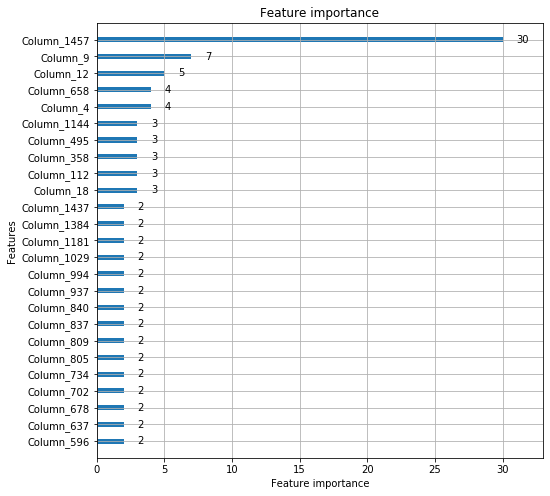

==< age >==
X_train : (4407, 1459)


C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:61: ExperimentalWarning: train is experimental (supported from v0.18.0). The interface can change in the future.
  ExperimentalWarning,
C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:83: ExperimentalWarning: LightGBMTuner is experimental (supported from v1.5.0). The interface can change in the future.
  ExperimentalWarning,

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.78533	valid_1's rmse: 10.8899
Early stopping, best iteration is:
[3]	training's rmse: 10.6157	valid_1's rmse: 10.8184



feature_fraction, val_score: 10.818359:  14%|#4        | 1/7 [00:06<00:41,  6.94s/it][I 2020-06-28 21:55:26,959] Finished trial#0 with value: 10.818359319570392 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#0 with value: 10.818359319570392.

feature_fraction, val_score: 10.818359:  14%|#4        | 1/7 [00:07<00:41,  6.94s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.7717	valid_1's rmse: 10.8451
Early stopping, best iteration is:
[1]	training's rmse: 10.8659	valid_1's rmse: 10.8229



feature_fraction, val_score: 10.818359:  29%|##8       | 2/7 [00:13<00:33,  6.79s/it][I 2020-06-28 21:55:33,399] Finished trial#1 with value: 10.822930572218889 with parameters: {'feature_fraction': 1.0}. Best is trial#0 with value: 10.818359319570392.

feature_fraction, val_score: 10.818359:  29%|##8       | 2/7 [00:13<00:33,  6.79s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.86403	valid_1's rmse: 10.8872
Early stopping, best iteration is:
[3]	training's rmse: 10.631	valid_1's rmse: 10.8094



feature_fraction, val_score: 10.809406:  43%|####2     | 3/7 [00:17<00:24,  6.10s/it][I 2020-06-28 21:55:37,895] Finished trial#2 with value: 10.809405914159905 with parameters: {'feature_fraction': 0.7}. Best is trial#2 with value: 10.809405914159905.

feature_fraction, val_score: 10.809406:  43%|####2     | 3/7 [00:18<00:24,  6.10s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.86854	valid_1's rmse: 10.9388
Early stopping, best iteration is:
[1]	training's rmse: 10.871	valid_1's rmse: 10.8115



feature_fraction, val_score: 10.809406:  57%|#####7    | 4/7 [00:21<00:16,  5.36s/it][I 2020-06-28 21:55:41,547] Finished trial#3 with value: 10.81148428574972 with parameters: {'feature_fraction': 0.6}. Best is trial#2 with value: 10.809405914159905.

feature_fraction, val_score: 10.809406:  57%|#####7    | 4/7 [00:21<00:16,  5.36s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.80939	valid_1's rmse: 10.9318
Early stopping, best iteration is:
[6]	training's rmse: 10.2673	valid_1's rmse: 10.8166



feature_fraction, val_score: 10.809406:  71%|#######1  | 5/7 [00:27<00:11,  5.64s/it][I 2020-06-28 21:55:47,840] Finished trial#4 with value: 10.816588340158317 with parameters: {'feature_fraction': 0.8}. Best is trial#2 with value: 10.809405914159905.

feature_fraction, val_score: 10.809406:  71%|#######1  | 5/7 [00:27<00:11,  5.64s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.96105	valid_1's rmse: 10.8918
Early stopping, best iteration is:
[1]	training's rmse: 10.8767	valid_1's rmse: 10.8269



feature_fraction, val_score: 10.809406:  86%|########5 | 6/7 [00:30<00:04,  4.79s/it][I 2020-06-28 21:55:50,647] Finished trial#5 with value: 10.826855635272922 with parameters: {'feature_fraction': 0.4}. Best is trial#2 with value: 10.809405914159905.

feature_fraction, val_score: 10.809406:  86%|########5 | 6/7 [00:30<00:04,  4.79s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.89398	valid_1's rmse: 10.9008
Early stopping, best iteration is:
[1]	training's rmse: 10.8809	valid_1's rmse: 10.8226



feature_fraction, val_score: 10.809406: 100%|##########| 7/7 [00:33<00:00,  4.85s/it]

num_leaves, val_score: 10.809406:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.06355	valid_1's rmse: 10.9799
Early stopping, best iteration is:
[1]	training's rmse: 10.758	valid_1's rmse: 10.8161



num_leaves, val_score: 10.809406:   5%|5         | 1/20 [00:08<02:32,  8.02s/it][I 2020-06-28 21:56:02,005] Finished trial#7 with value: 10.816077091484551 with parameters: {'num_leaves': 67}. Best is trial#7 with value: 10.816077091484551.

num_leaves, val_score: 10.809406:   5%|5         | 1/20 [00:08<02:32,  8.02s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.88477	valid_1's rmse: 11.0634
Early stopping, best iteration is:
[1]	training's rmse: 10.5491	valid_1's rmse: 10.8397



num_leaves, val_score: 10.809406:  10%|#         | 2/20 [00:21<02:52,  9.60s/it][I 2020-06-28 21:56:15,288] Finished trial#8 with value: 10.83965610590134 with parameters: {'num_leaves': 211}. Best is trial#7 with value: 10.816077091484551.

num_leaves, val_score: 10.809406:  10%|#         | 2/20 [00:21<02:52,  9.60s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.88477	valid_1's rmse: 11.0634
Early stopping, best iteration is:
[1]	training's rmse: 10.5491	valid_1's rmse: 10.8397



num_leaves, val_score: 10.809406:  15%|#5        | 3/20 [00:35<03:05, 10.91s/it][I 2020-06-28 21:56:29,265] Finished trial#9 with value: 10.83965610590134 with parameters: {'num_leaves': 212}. Best is trial#7 with value: 10.816077091484551.

num_leaves, val_score: 10.809406:  15%|#5        | 3/20 [00:35<03:05, 10.91s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.88477	valid_1's rmse: 11.0634
Early stopping, best iteration is:
[1]	training's rmse: 10.5491	valid_1's rmse: 10.8397



num_leaves, val_score: 10.809406:  20%|##        | 4/20 [00:49<03:08, 11.80s/it][I 2020-06-28 21:56:43,140] Finished trial#10 with value: 10.83965610590134 with parameters: {'num_leaves': 247}. Best is trial#7 with value: 10.816077091484551.

num_leaves, val_score: 10.809406:  20%|##        | 4/20 [00:49<03:08, 11.80s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.14908	valid_1's rmse: 10.9018
Early stopping, best iteration is:
[1]	training's rmse: 10.8323	valid_1's rmse: 10.8182



num_leaves, val_score: 10.809406:  25%|##5       | 5/20 [00:55<02:31, 10.07s/it][I 2020-06-28 21:56:49,154] Finished trial#11 with value: 10.81823928738664 with parameters: {'num_leaves': 43}. Best is trial#7 with value: 10.816077091484551.

num_leaves, val_score: 10.809406:  25%|##5       | 5/20 [00:55<02:31, 10.07s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.88477	valid_1's rmse: 11.0634
Early stopping, best iteration is:
[1]	training's rmse: 10.5491	valid_1's rmse: 10.8397



num_leaves, val_score: 10.809406:  30%|###       | 6/20 [01:08<02:34, 11.04s/it][I 2020-06-28 21:57:02,472] Finished trial#12 with value: 10.83965610590134 with parameters: {'num_leaves': 197}. Best is trial#7 with value: 10.816077091484551.

num_leaves, val_score: 10.809406:  30%|###       | 6/20 [01:08<02:34, 11.04s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.75014	valid_1's rmse: 10.9646
Early stopping, best iteration is:
[1]	training's rmse: 10.7296	valid_1's rmse: 10.8204



num_leaves, val_score: 10.809406:  35%|###5      | 7/20 [01:18<02:19, 10.74s/it][I 2020-06-28 21:57:12,486] Finished trial#13 with value: 10.820386318222553 with parameters: {'num_leaves': 75}. Best is trial#7 with value: 10.816077091484551.

num_leaves, val_score: 10.809406:  35%|###5      | 7/20 [01:18<02:19, 10.74s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.12003	valid_1's rmse: 11.0804
Early stopping, best iteration is:
[1]	training's rmse: 10.5723	valid_1's rmse: 10.8356



num_leaves, val_score: 10.809406:  40%|####      | 8/20 [01:31<02:17, 11.50s/it][I 2020-06-28 21:57:25,781] Finished trial#14 with value: 10.835624624159168 with parameters: {'num_leaves': 146}. Best is trial#7 with value: 10.816077091484551.

num_leaves, val_score: 10.809406:  40%|####      | 8/20 [01:31<02:17, 11.50s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.4975	valid_1's rmse: 10.8566
Early stopping, best iteration is:
[2]	training's rmse: 10.9426	valid_1's rmse: 10.8159



num_leaves, val_score: 10.809406:  45%|####5     | 9/20 [01:33<01:33,  8.49s/it][I 2020-06-28 21:57:27,250] Finished trial#15 with value: 10.815904343604439 with parameters: {'num_leaves': 7}. Best is trial#15 with value: 10.815904343604439.

num_leaves, val_score: 10.809406:  45%|####5     | 9/20 [01:33<01:33,  8.49s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.24541	valid_1's rmse: 10.9307
Early stopping, best iteration is:
[1]	training's rmse: 10.7691	valid_1's rmse: 10.8155



num_leaves, val_score: 10.809406:  50%|#####     | 10/20 [01:40<01:21,  8.14s/it][I 2020-06-28 21:57:34,566] Finished trial#16 with value: 10.815513694758671 with parameters: {'num_leaves': 63}. Best is trial#16 with value: 10.815513694758671.

num_leaves, val_score: 10.809406:  50%|#####     | 10/20 [01:40<01:21,  8.14s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.70065	valid_1's rmse: 10.9595
Early stopping, best iteration is:
[1]	training's rmse: 10.6341	valid_1's rmse: 10.8258



num_leaves, val_score: 10.809406:  55%|#####5    | 11/20 [01:52<01:23,  9.32s/it][I 2020-06-28 21:57:46,649] Finished trial#17 with value: 10.825757560555225 with parameters: {'num_leaves': 112}. Best is trial#16 with value: 10.815513694758671.

num_leaves, val_score: 10.809406:  55%|#####5    | 11/20 [01:52<01:23,  9.32s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.6709	valid_1's rmse: 10.8418
Early stopping, best iteration is:
[2]	training's rmse: 10.9604	valid_1's rmse: 10.8165



num_leaves, val_score: 10.809406:  60%|######    | 12/20 [01:53<00:54,  6.82s/it][I 2020-06-28 21:57:47,634] Finished trial#18 with value: 10.816493623225375 with parameters: {'num_leaves': 5}. Best is trial#16 with value: 10.815513694758671.

num_leaves, val_score: 10.809406:  60%|######    | 12/20 [01:53<00:54,  6.82s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.7524	valid_1's rmse: 10.835
Early stopping, best iteration is:
[2]	training's rmse: 10.9698	valid_1's rmse: 10.8142



num_leaves, val_score: 10.809406:  65%|######5   | 13/20 [01:54<00:35,  5.03s/it][I 2020-06-28 21:57:48,487] Finished trial#19 with value: 10.814222077797075 with parameters: {'num_leaves': 4}. Best is trial#19 with value: 10.814222077797075.

num_leaves, val_score: 10.809406:  65%|######5   | 13/20 [01:54<00:35,  5.03s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.72027	valid_1's rmse: 10.901
Early stopping, best iteration is:
[2]	training's rmse: 10.7337	valid_1's rmse: 10.8148



num_leaves, val_score: 10.809406:  70%|#######   | 14/20 [01:59<00:29,  4.94s/it][I 2020-06-28 21:57:53,195] Finished trial#20 with value: 10.814842799473185 with parameters: {'num_leaves': 33}. Best is trial#19 with value: 10.814222077797075.

num_leaves, val_score: 10.809406:  70%|#######   | 14/20 [01:59<00:29,  4.94s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.585	valid_1's rmse: 10.8351
Early stopping, best iteration is:
[2]	training's rmse: 10.9515	valid_1's rmse: 10.816



num_leaves, val_score: 10.809406:  75%|#######5  | 15/20 [02:00<00:19,  3.86s/it][I 2020-06-28 21:57:54,538] Finished trial#21 with value: 10.816041056330024 with parameters: {'num_leaves': 6}. Best is trial#19 with value: 10.814222077797075.

num_leaves, val_score: 10.809406:  75%|#######5  | 15/20 [02:00<00:19,  3.86s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.67416	valid_1's rmse: 10.9449
Early stopping, best iteration is:
[2]	training's rmse: 10.7267	valid_1's rmse: 10.8157



num_leaves, val_score: 10.809406:  80%|########  | 16/20 [02:05<00:16,  4.20s/it][I 2020-06-28 21:57:59,532] Finished trial#22 with value: 10.81569263700089 with parameters: {'num_leaves': 34}. Best is trial#19 with value: 10.814222077797075.

num_leaves, val_score: 10.809406:  80%|########  | 16/20 [02:05<00:16,  4.20s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.70065	valid_1's rmse: 10.9595
Early stopping, best iteration is:
[1]	training's rmse: 10.6341	valid_1's rmse: 10.8258



num_leaves, val_score: 10.809406:  85%|########5 | 17/20 [02:18<00:20,  6.89s/it][I 2020-06-28 21:58:12,685] Finished trial#23 with value: 10.825757560555225 with parameters: {'num_leaves': 112}. Best is trial#19 with value: 10.814222077797075.

num_leaves, val_score: 10.809406:  85%|########5 | 17/20 [02:18<00:20,  6.89s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.57547	valid_1's rmse: 10.9643
Early stopping, best iteration is:
[2]	training's rmse: 10.7219	valid_1's rmse: 10.8158



num_leaves, val_score: 10.809406:  90%|######### | 18/20 [02:23<00:12,  6.29s/it][I 2020-06-28 21:58:17,586] Finished trial#24 with value: 10.815822921156874 with parameters: {'num_leaves': 35}. Best is trial#19 with value: 10.814222077797075.

num_leaves, val_score: 10.809406:  90%|######### | 18/20 [02:23<00:12,  6.29s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.12003	valid_1's rmse: 11.0804
Early stopping, best iteration is:
[1]	training's rmse: 10.5723	valid_1's rmse: 10.8356



num_leaves, val_score: 10.809406:  95%|#########5| 19/20 [02:35<00:07,  7.96s/it][I 2020-06-28 21:58:29,454] Finished trial#25 with value: 10.835624624159168 with parameters: {'num_leaves': 146}. Best is trial#19 with value: 10.814222077797075.

num_leaves, val_score: 10.809406:  95%|#########5| 19/20 [02:35<00:07,  7.96s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.08639	valid_1's rmse: 11.0613
Early stopping, best iteration is:
[2]	training's rmse: 10.3591	valid_1's rmse: 10.8142



num_leaves, val_score: 10.809406: 100%|##########| 20/20 [02:45<00:00,  8.27s/it]

bagging, val_score: 10.809406:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.85521	valid_1's rmse: 10.9012
Early stopping, best iteration is:
[2]	training's rmse: 10.7526	valid_1's rmse: 10.8073



bagging, val_score: 10.807268:  10%|#         | 1/10 [00:04<00:37,  4.11s/it][I 2020-06-28 21:58:43,519] Finished trial#27 with value: 10.807268082535776 with parameters: {'bagging_fraction': 0.9692200958695348, 'bagging_freq': 6}. Best is trial#27 with value: 10.807268082535776.

bagging, val_score: 10.807268:  10%|#         | 1/10 [00:04<00:37,  4.11s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.19664	valid_1's rmse: 10.9545
Early stopping, best iteration is:
[1]	training's rmse: 10.8815	valid_1's rmse: 10.8048



bagging, val_score: 10.804808:  20%|##        | 2/10 [00:07<00:31,  3.90s/it][I 2020-06-28 21:58:46,887] Finished trial#28 with value: 10.80480839141979 with parameters: {'bagging_fraction': 0.5226582235947063, 'bagging_freq': 6}. Best is trial#28 with value: 10.80480839141979.

bagging, val_score: 10.804808:  20%|##        | 2/10 [00:07<00:31,  3.90s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.00399	valid_1's rmse: 10.9159
Early stopping, best iteration is:
[3]	training's rmse: 10.6516	valid_1's rmse: 10.8032



bagging, val_score: 10.803154:  30%|###       | 3/10 [00:11<00:27,  3.88s/it][I 2020-06-28 21:58:50,741] Finished trial#29 with value: 10.80315429971041 with parameters: {'bagging_fraction': 0.6348114136485239, 'bagging_freq': 6}. Best is trial#29 with value: 10.80315429971041.

bagging, val_score: 10.803154:  30%|###       | 3/10 [00:11<00:27,  3.88s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91713	valid_1's rmse: 10.953
Early stopping, best iteration is:
[5]	training's rmse: 10.4184	valid_1's rmse: 10.7878



bagging, val_score: 10.787806:  40%|####      | 4/10 [00:15<00:24,  4.03s/it][I 2020-06-28 21:58:55,124] Finished trial#30 with value: 10.787805777398914 with parameters: {'bagging_fraction': 0.729980240132174, 'bagging_freq': 1}. Best is trial#30 with value: 10.787805777398914.

bagging, val_score: 10.787806:  40%|####      | 4/10 [00:15<00:24,  4.03s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.08583	valid_1's rmse: 11.1007
Early stopping, best iteration is:
[1]	training's rmse: 10.8811	valid_1's rmse: 10.8232



bagging, val_score: 10.787806:  50%|#####     | 5/10 [00:20<00:20,  4.11s/it][I 2020-06-28 21:58:59,438] Finished trial#31 with value: 10.823240021924558 with parameters: {'bagging_fraction': 0.5908363173027759, 'bagging_freq': 5}. Best is trial#30 with value: 10.787805777398914.

bagging, val_score: 10.787806:  50%|#####     | 5/10 [00:20<00:20,  4.11s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.85312	valid_1's rmse: 10.9078
Early stopping, best iteration is:
[2]	training's rmse: 10.7514	valid_1's rmse: 10.8139



bagging, val_score: 10.787806:  60%|######    | 6/10 [00:24<00:16,  4.20s/it][I 2020-06-28 21:59:03,835] Finished trial#32 with value: 10.813919443573354 with parameters: {'bagging_fraction': 0.9765978439475026, 'bagging_freq': 3}. Best is trial#30 with value: 10.787805777398914.

bagging, val_score: 10.787806:  60%|######    | 6/10 [00:24<00:16,  4.20s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.86531	valid_1's rmse: 11.0005
Early stopping, best iteration is:
[3]	training's rmse: 10.6164	valid_1's rmse: 10.8191



bagging, val_score: 10.787806:  70%|#######   | 7/10 [00:28<00:12,  4.22s/it][I 2020-06-28 21:59:08,112] Finished trial#33 with value: 10.819056238692557 with parameters: {'bagging_fraction': 0.9044141233068493, 'bagging_freq': 7}. Best is trial#30 with value: 10.787805777398914.

bagging, val_score: 10.787806:  70%|#######   | 7/10 [00:28<00:12,  4.22s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.83223	valid_1's rmse: 10.9509
Early stopping, best iteration is:
[1]	training's rmse: 10.8712	valid_1's rmse: 10.8171



bagging, val_score: 10.787806:  80%|########  | 8/10 [00:32<00:08,  4.12s/it][I 2020-06-28 21:59:11,998] Finished trial#34 with value: 10.817059175930726 with parameters: {'bagging_fraction': 0.9857601346314611, 'bagging_freq': 2}. Best is trial#30 with value: 10.787805777398914.

bagging, val_score: 10.787806:  80%|########  | 8/10 [00:32<00:08,  4.12s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.83644	valid_1's rmse: 10.8762
Early stopping, best iteration is:
[5]	training's rmse: 10.3952	valid_1's rmse: 10.8093



bagging, val_score: 10.787806:  90%|######### | 9/10 [00:37<00:04,  4.26s/it][I 2020-06-28 21:59:16,583] Finished trial#35 with value: 10.809332865360627 with parameters: {'bagging_fraction': 0.9599676376311213, 'bagging_freq': 7}. Best is trial#30 with value: 10.787805777398914.

bagging, val_score: 10.787806:  90%|######### | 9/10 [00:37<00:04,  4.26s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.89724	valid_1's rmse: 10.8927
Early stopping, best iteration is:
[2]	training's rmse: 10.7661	valid_1's rmse: 10.8128



bagging, val_score: 10.787806: 100%|##########| 10/10 [00:41<00:00,  4.13s/it]

feature_fraction_stage2, val_score: 10.787806:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.90367	valid_1's rmse: 10.9898
Early stopping, best iteration is:
[1]	training's rmse: 10.8777	valid_1's rmse: 10.8266



feature_fraction_stage2, val_score: 10.787806:  17%|#6        | 1/6 [00:03<00:18,  3.67s/it][I 2020-06-28 21:59:24,425] Finished trial#37 with value: 10.826556348324052 with parameters: {'feature_fraction': 0.748}. Best is trial#37 with value: 10.826556348324052.

feature_fraction_stage2, val_score: 10.787806:  17%|#6        | 1/6 [00:03<00:18,  3.67s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.92939	valid_1's rmse: 10.9769
Early stopping, best iteration is:
[4]	training's rmse: 10.532	valid_1's rmse: 10.8152



feature_fraction_stage2, val_score: 10.787806:  33%|###3      | 2/6 [00:07<00:14,  3.73s/it][I 2020-06-28 21:59:28,276] Finished trial#38 with value: 10.8152199875963 with parameters: {'feature_fraction': 0.652}. Best is trial#38 with value: 10.8152199875963.

feature_fraction_stage2, val_score: 10.787806:  33%|###3      | 2/6 [00:07<00:14,  3.73s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91203	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



feature_fraction_stage2, val_score: 10.786725:  50%|#####     | 3/6 [00:12<00:11,  3.98s/it][I 2020-06-28 21:59:32,828] Finished trial#39 with value: 10.78672461385828 with parameters: {'feature_fraction': 0.6839999999999999}. Best is trial#39 with value: 10.78672461385828.

feature_fraction_stage2, val_score: 10.786725:  50%|#####     | 3/6 [00:12<00:11,  3.98s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.90543	valid_1's rmse: 10.9884
Early stopping, best iteration is:
[4]	training's rmse: 10.5229	valid_1's rmse: 10.8261



feature_fraction_stage2, val_score: 10.786725:  67%|######6   | 4/6 [00:16<00:08,  4.01s/it][I 2020-06-28 21:59:36,921] Finished trial#40 with value: 10.82610764763178 with parameters: {'feature_fraction': 0.716}. Best is trial#39 with value: 10.78672461385828.

feature_fraction_stage2, val_score: 10.786725:  67%|######6   | 4/6 [00:16<00:08,  4.01s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91118	valid_1's rmse: 10.8794
Early stopping, best iteration is:
[1]	training's rmse: 10.8834	valid_1's rmse: 10.8115



feature_fraction_stage2, val_score: 10.786725:  83%|########3 | 5/6 [00:19<00:03,  3.80s/it][I 2020-06-28 21:59:40,223] Finished trial#41 with value: 10.811494734582967 with parameters: {'feature_fraction': 0.62}. Best is trial#39 with value: 10.78672461385828.

feature_fraction_stage2, val_score: 10.786725:  83%|########3 | 5/6 [00:19<00:03,  3.80s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.89165	valid_1's rmse: 10.9098
Early stopping, best iteration is:
[5]	training's rmse: 10.4188	valid_1's rmse: 10.8181



feature_fraction_stage2, val_score: 10.786725: 100%|##########| 6/6 [00:24<00:00,  4.06s/it]

regularization_factors, val_score: 10.786725:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.90929	valid_1's rmse: 10.8823
Early stopping, best iteration is:
[4]	training's rmse: 10.5163	valid_1's rmse: 10.7983



regularization_factors, val_score: 10.786725:   5%|5         | 1/20 [00:04<01:27,  4.62s/it][I 2020-06-28 21:59:49,765] Finished trial#43 with value: 10.798298212198087 with parameters: {'lambda_l1': 3.508487004936735, 'lambda_l2': 0.0010549314324597068}. Best is trial#43 with value: 10.798298212198087.

regularization_factors, val_score: 10.786725:   5%|5         | 1/20 [00:04<01:27,  4.62s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91203	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786725:  10%|#         | 2/20 [00:09<01:23,  4.66s/it][I 2020-06-28 21:59:54,524] Finished trial#44 with value: 10.786724588984429 with parameters: {'lambda_l1': 1.2931115223189753e-06, 'lambda_l2': 4.8008101312852034e-05}. Best is trial#44 with value: 10.786724588984429.

regularization_factors, val_score: 10.786725:  10%|#         | 2/20 [00:09<01:23,  4.66s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.9203	valid_1's rmse: 10.8759
Early stopping, best iteration is:
[6]	training's rmse: 10.2986	valid_1's rmse: 10.7906



regularization_factors, val_score: 10.786725:  15%|#5        | 3/20 [00:13<01:18,  4.63s/it][I 2020-06-28 21:59:59,080] Finished trial#45 with value: 10.790582026702483 with parameters: {'lambda_l1': 0.31347690907219455, 'lambda_l2': 3.003182210515861e-06}. Best is trial#44 with value: 10.786724588984429.

regularization_factors, val_score: 10.786725:  15%|#5        | 3/20 [00:14<01:18,  4.63s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91203	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786725:  20%|##        | 4/20 [00:19<01:18,  4.93s/it][I 2020-06-28 22:00:04,692] Finished trial#46 with value: 10.786724594210042 with parameters: {'lambda_l1': 2.096889029147155e-07, 'lambda_l2': 3.797768489189158e-05}. Best is trial#44 with value: 10.786724588984429.

regularization_factors, val_score: 10.786725:  20%|##        | 4/20 [00:19<01:18,  4.93s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.074	valid_1's rmse: 10.93
Early stopping, best iteration is:
[1]	training's rmse: 10.8906	valid_1's rmse: 10.8236



regularization_factors, val_score: 10.786725:  25%|##5       | 5/20 [00:23<01:10,  4.69s/it][I 2020-06-28 22:00:08,832] Finished trial#47 with value: 10.82356192899698 with parameters: {'lambda_l1': 0.6645403482370922, 'lambda_l2': 7.21476118206026}. Best is trial#44 with value: 10.786724588984429.

regularization_factors, val_score: 10.786725:  25%|##5       | 5/20 [00:23<01:10,  4.69s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.894	valid_1's rmse: 10.8903
Early stopping, best iteration is:
[5]	training's rmse: 10.4123	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786719:  30%|###       | 6/20 [00:28<01:05,  4.68s/it][I 2020-06-28 22:00:13,495] Finished trial#48 with value: 10.786718551160225 with parameters: {'lambda_l1': 1.744275727470224e-08, 'lambda_l2': 0.011647330156951219}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  30%|###       | 6/20 [00:28<01:05,  4.68s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91203	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786719:  35%|###5      | 7/20 [00:33<01:00,  4.69s/it][I 2020-06-28 22:00:18,184] Finished trial#49 with value: 10.786724551548216 with parameters: {'lambda_l1': 1.721305031109772e-07, 'lambda_l2': 0.00011998155331513942}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  35%|###5      | 7/20 [00:33<01:00,  4.69s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91188	valid_1's rmse: 10.9201
Early stopping, best iteration is:
[5]	training's rmse: 10.4112	valid_1's rmse: 10.794



regularization_factors, val_score: 10.786719:  40%|####      | 8/20 [00:37<00:54,  4.58s/it][I 2020-06-28 22:00:22,532] Finished trial#50 with value: 10.793987856992208 with parameters: {'lambda_l1': 3.1068998849512116e-05, 'lambda_l2': 0.022106350583818733}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  40%|####      | 8/20 [00:37<00:54,  4.58s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91203	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786719:  45%|####5     | 9/20 [00:41<00:49,  4.50s/it][I 2020-06-28 22:00:26,842] Finished trial#51 with value: 10.786724616732206 with parameters: {'lambda_l1': 0.00019919963168070522, 'lambda_l2': 1.2265402617599433e-07}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  45%|####5     | 9/20 [00:41<00:49,  4.50s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91217	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786719:  50%|#####     | 10/20 [00:46<00:45,  4.55s/it][I 2020-06-28 22:00:31,514] Finished trial#52 with value: 10.786722999029184 with parameters: {'lambda_l1': 0.0006324070585887319, 'lambda_l2': 0.0031144049058496655}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  50%|#####     | 10/20 [00:46<00:45,  4.55s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.01386	valid_1's rmse: 10.9459
Early stopping, best iteration is:
[4]	training's rmse: 10.5558	valid_1's rmse: 10.8018



regularization_factors, val_score: 10.786719:  55%|#####5    | 11/20 [00:51<00:43,  4.86s/it][I 2020-06-28 22:00:37,113] Finished trial#53 with value: 10.80184992605512 with parameters: {'lambda_l1': 1.658273667966992e-08, 'lambda_l2': 3.57665361419315}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  55%|#####5    | 11/20 [00:52<00:43,  4.86s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.90618	valid_1's rmse: 10.9197
Early stopping, best iteration is:
[5]	training's rmse: 10.4115	valid_1's rmse: 10.794



regularization_factors, val_score: 10.786719:  60%|######    | 12/20 [00:56<00:39,  4.88s/it][I 2020-06-28 22:00:42,025] Finished trial#54 with value: 10.793978748410664 with parameters: {'lambda_l1': 0.012725887072140485, 'lambda_l2': 0.03994510582148354}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  60%|######    | 12/20 [00:57<00:39,  4.88s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91226	valid_1's rmse: 10.92
Early stopping, best iteration is:
[5]	training's rmse: 10.4113	valid_1's rmse: 10.794



regularization_factors, val_score: 10.786719:  65%|######5   | 13/20 [01:01<00:33,  4.76s/it][I 2020-06-28 22:00:46,498] Finished trial#55 with value: 10.793983649711445 with parameters: {'lambda_l1': 0.002723663484804671, 'lambda_l2': 0.030333093580799123}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  65%|######5   | 13/20 [01:01<00:33,  4.76s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.90868	valid_1's rmse: 10.8927
Early stopping, best iteration is:
[4]	training's rmse: 10.517	valid_1's rmse: 10.7976



regularization_factors, val_score: 10.786719:  70%|#######   | 14/20 [01:06<00:29,  4.95s/it][I 2020-06-28 22:00:51,905] Finished trial#56 with value: 10.797603591056212 with parameters: {'lambda_l1': 1.219818665370948e-05, 'lambda_l2': 0.5157694862644971}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  70%|#######   | 14/20 [01:06<00:29,  4.95s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91215	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786719:  75%|#######5  | 15/20 [01:11<00:24,  4.86s/it][I 2020-06-28 22:00:56,555] Finished trial#57 with value: 10.786723967632591 with parameters: {'lambda_l1': 0.011017921228206445, 'lambda_l2': 0.0015049018049697943}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  75%|#######5  | 15/20 [01:11<00:24,  4.86s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91222	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786719:  80%|########  | 16/20 [01:16<00:19,  4.84s/it][I 2020-06-28 22:01:01,354] Finished trial#58 with value: 10.78672239166947 with parameters: {'lambda_l1': 0.0006571414929554878, 'lambda_l2': 0.004281058978254771}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  80%|########  | 16/20 [01:16<00:19,  4.84s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.92436	valid_1's rmse: 10.9283
Early stopping, best iteration is:
[5]	training's rmse: 10.4212	valid_1's rmse: 10.7913



regularization_factors, val_score: 10.786719:  85%|########5 | 17/20 [01:21<00:14,  4.96s/it][I 2020-06-28 22:01:06,587] Finished trial#59 with value: 10.791338054890945 with parameters: {'lambda_l1': 1.814568198873133e-05, 'lambda_l2': 0.9915322181500861}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  85%|########5 | 17/20 [01:21<00:14,  4.96s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.90759	valid_1's rmse: 10.9095
Early stopping, best iteration is:
[4]	training's rmse: 10.527	valid_1's rmse: 10.7949



regularization_factors, val_score: 10.786719:  90%|######### | 18/20 [01:26<00:09,  4.92s/it][I 2020-06-28 22:01:11,421] Finished trial#60 with value: 10.794912293879525 with parameters: {'lambda_l1': 1.2415183913005269e-08, 'lambda_l2': 0.14187027057294088}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  90%|######### | 18/20 [01:26<00:09,  4.92s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91182	valid_1's rmse: 10.9201
Early stopping, best iteration is:
[5]	training's rmse: 10.4112	valid_1's rmse: 10.794



regularization_factors, val_score: 10.786719:  95%|#########5| 19/20 [01:30<00:04,  4.83s/it][I 2020-06-28 22:01:16,027] Finished trial#61 with value: 10.793994921548357 with parameters: {'lambda_l1': 0.10178576037122057, 'lambda_l2': 0.00834131842377807}. Best is trial#48 with value: 10.786718551160225.

regularization_factors, val_score: 10.786719:  95%|#########5| 19/20 [01:31<00:04,  4.83s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91203	valid_1's rmse: 10.8633
Early stopping, best iteration is:
[5]	training's rmse: 10.4122	valid_1's rmse: 10.7867



regularization_factors, val_score: 10.786719: 100%|##########| 20/20 [01:36<00:00,  4.81s/it]

min_data_in_leaf, val_score: 10.786719:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.86154	valid_1's rmse: 10.9565
Early stopping, best iteration is:
[1]	training's rmse: 10.8729	valid_1's rmse: 10.8275



min_data_in_leaf, val_score: 10.786719:  20%|##        | 1/5 [00:04<00:19,  4.87s/it][I 2020-06-28 22:01:26,271] Finished trial#63 with value: 10.827468008225875 with parameters: {'min_child_samples': 10}. Best is trial#63 with value: 10.827468008225875.

min_data_in_leaf, val_score: 10.786719:  20%|##        | 1/5 [00:05<00:19,  4.87s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.91188	valid_1's rmse: 10.957
Early stopping, best iteration is:
[1]	training's rmse: 10.8802	valid_1's rmse: 10.8258



min_data_in_leaf, val_score: 10.786719:  40%|####      | 2/5 [00:08<00:13,  4.54s/it][I 2020-06-28 22:01:30,065] Finished trial#64 with value: 10.825767229246994 with parameters: {'min_child_samples': 25}. Best is trial#64 with value: 10.825767229246994.

min_data_in_leaf, val_score: 10.786719:  40%|####      | 2/5 [00:08<00:13,  4.54s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.07552	valid_1's rmse: 10.8762
Early stopping, best iteration is:
[1]	training's rmse: 10.891	valid_1's rmse: 10.8233



min_data_in_leaf, val_score: 10.786719:  60%|######    | 3/5 [00:11<00:08,  4.17s/it][I 2020-06-28 22:01:33,363] Finished trial#65 with value: 10.823340432438862 with parameters: {'min_child_samples': 50}. Best is trial#65 with value: 10.823340432438862.

min_data_in_leaf, val_score: 10.786719:  60%|######    | 3/5 [00:12<00:08,  4.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.59224	valid_1's rmse: 10.9248
Early stopping, best iteration is:
[1]	training's rmse: 10.9161	valid_1's rmse: 10.8022



min_data_in_leaf, val_score: 10.786719:  80%|########  | 4/5 [00:13<00:03,  3.53s/it][I 2020-06-28 22:01:35,401] Finished trial#66 with value: 10.802249545069824 with parameters: {'min_child_samples': 100}. Best is trial#66 with value: 10.802249545069824.

min_data_in_leaf, val_score: 10.786719:  80%|########  | 4/5 [00:14<00:03,  3.53s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.85529	valid_1's rmse: 10.8731
Early stopping, best iteration is:
[4]	training's rmse: 10.5	valid_1's rmse: 10.8145



min_data_in_leaf, val_score: 10.786719: 100%|##########| 5/5 [00:20<00:00,  4.10s/it]


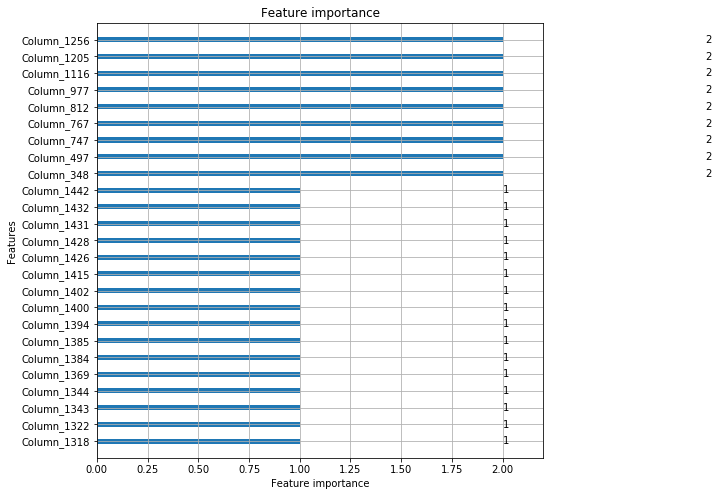

==< domain2_var2 >==
X_train : (4407, 1460)


C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:61: ExperimentalWarning: train is experimental (supported from v0.18.0). The interface can change in the future.
  ExperimentalWarning,
C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:83: ExperimentalWarning: LightGBMTuner is experimental (supported from v1.5.0). The interface can change in the future.
  ExperimentalWarning,

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.80682	valid_1's rmse: 11.0229
[40]	training's rmse: 7.17956	valid_1's rmse: 11.0605
Early stopping, best iteration is:
[26]	training's rmse: 8.27032	valid_1's rmse: 10.9931



feature_fraction, val_score: 10.993057:  14%|#4        | 1/7 [00:07<00:47,  7.93s/it][I 2020-06-28 22:01:50,882] Finished trial#0 with value: 10.993056591626342 with parameters: {'feature_fraction': 0.5}. Best is trial#0 with value: 10.993056591626342.

feature_fraction, val_score: 10.993057:  14%|#4        | 1/7 [00:08<00:47,  7.93s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.69647	valid_1's rmse: 11.1474
Early stopping, best iteration is:
[5]	training's rmse: 10.3307	valid_1's rmse: 11.0683



feature_fraction, val_score: 10.993057:  29%|##8       | 2/7 [00:14<00:37,  7.45s/it][I 2020-06-28 22:01:57,195] Finished trial#1 with value: 11.068250741790754 with parameters: {'feature_fraction': 0.8}. Best is trial#0 with value: 10.993056591626342.

feature_fraction, val_score: 10.993057:  29%|##8       | 2/7 [00:14<00:37,  7.45s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.65015	valid_1's rmse: 11.1156
Early stopping, best iteration is:
[4]	training's rmse: 10.4464	valid_1's rmse: 11.0314



feature_fraction, val_score: 10.993057:  43%|####2     | 3/7 [00:20<00:28,  7.11s/it][I 2020-06-28 22:02:03,515] Finished trial#2 with value: 11.03140634670622 with parameters: {'feature_fraction': 1.0}. Best is trial#0 with value: 10.993056591626342.

feature_fraction, val_score: 10.993057:  43%|####2     | 3/7 [00:20<00:28,  7.11s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.67911	valid_1's rmse: 11.0435
Early stopping, best iteration is:
[5]	training's rmse: 10.3196	valid_1's rmse: 11.0303



feature_fraction, val_score: 10.993057:  57%|#####7    | 4/7 [00:26<00:20,  6.88s/it][I 2020-06-28 22:02:09,883] Finished trial#3 with value: 11.03027486012283 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#0 with value: 10.993056591626342.

feature_fraction, val_score: 10.993057:  57%|#####7    | 4/7 [00:27<00:20,  6.88s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.71956	valid_1's rmse: 11.0342
Early stopping, best iteration is:
[8]	training's rmse: 9.97786	valid_1's rmse: 10.9785



feature_fraction, val_score: 10.978517:  71%|#######1  | 5/7 [00:32<00:13,  6.59s/it][I 2020-06-28 22:02:15,782] Finished trial#4 with value: 10.97851741253964 with parameters: {'feature_fraction': 0.7}. Best is trial#4 with value: 10.97851741253964.

feature_fraction, val_score: 10.978517:  71%|#######1  | 5/7 [00:32<00:13,  6.59s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.74502	valid_1's rmse: 11.0308
Early stopping, best iteration is:
[8]	training's rmse: 10.0068	valid_1's rmse: 11.0056



feature_fraction, val_score: 10.978517:  86%|########5 | 6/7 [00:37<00:06,  6.11s/it][I 2020-06-28 22:02:20,783] Finished trial#5 with value: 11.005592636208803 with parameters: {'feature_fraction': 0.6}. Best is trial#4 with value: 10.97851741253964.

feature_fraction, val_score: 10.978517:  86%|########5 | 6/7 [00:37<00:06,  6.11s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.82718	valid_1's rmse: 11.02
Early stopping, best iteration is:
[13]	training's rmse: 9.51301	valid_1's rmse: 10.9859



feature_fraction, val_score: 10.978517: 100%|##########| 7/7 [00:42<00:00,  6.05s/it]

num_leaves, val_score: 10.978517:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.79063	valid_1's rmse: 11.2559
Early stopping, best iteration is:
[1]	training's rmse: 10.5861	valid_1's rmse: 11.1031



num_leaves, val_score: 10.978517:   5%|5         | 1/20 [00:13<04:07, 13.01s/it][I 2020-06-28 22:02:38,349] Finished trial#7 with value: 11.103097546504806 with parameters: {'num_leaves': 230}. Best is trial#7 with value: 11.103097546504806.

num_leaves, val_score: 10.978517:   5%|5         | 1/20 [00:13<04:07, 13.01s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.0682	valid_1's rmse: 11.2267
Early stopping, best iteration is:
[1]	training's rmse: 10.624	valid_1's rmse: 11.1043



num_leaves, val_score: 10.978517:  10%|#         | 2/20 [00:26<03:55, 13.06s/it][I 2020-06-28 22:02:51,524] Finished trial#8 with value: 11.104311747013545 with parameters: {'num_leaves': 140}. Best is trial#7 with value: 11.103097546504806.

num_leaves, val_score: 10.978517:  10%|#         | 2/20 [00:26<03:55, 13.06s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.91205	valid_1's rmse: 11.0645
Early stopping, best iteration is:
[11]	training's rmse: 10.3457	valid_1's rmse: 11.0227



num_leaves, val_score: 10.978517:  15%|#5        | 3/20 [00:29<02:50, 10.05s/it][I 2020-06-28 22:02:54,568] Finished trial#9 with value: 11.022720931725885 with parameters: {'num_leaves': 13}. Best is trial#9 with value: 11.022720931725885.

num_leaves, val_score: 10.978517:  15%|#5        | 3/20 [00:29<02:50, 10.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.90337	valid_1's rmse: 11.0146
Early stopping, best iteration is:
[15]	training's rmse: 9.35893	valid_1's rmse: 11.0001



num_leaves, val_score: 10.978517:  20%|##        | 4/20 [00:36<02:27,  9.20s/it][I 2020-06-28 22:03:01,771] Finished trial#10 with value: 11.000051537095224 with parameters: {'num_leaves': 28}. Best is trial#10 with value: 11.000051537095224.

num_leaves, val_score: 10.978517:  20%|##        | 4/20 [00:36<02:27,  9.20s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.79063	valid_1's rmse: 11.2559
Early stopping, best iteration is:
[1]	training's rmse: 10.5861	valid_1's rmse: 11.1031



num_leaves, val_score: 10.978517:  25%|##5       | 5/20 [00:49<02:35, 10.37s/it][I 2020-06-28 22:03:14,891] Finished trial#11 with value: 11.103097546504806 with parameters: {'num_leaves': 209}. Best is trial#10 with value: 11.000051537095224.

num_leaves, val_score: 10.978517:  25%|##5       | 5/20 [00:49<02:35, 10.37s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.79063	valid_1's rmse: 11.2559
Early stopping, best iteration is:
[1]	training's rmse: 10.5861	valid_1's rmse: 11.1031



num_leaves, val_score: 10.978517:  30%|###       | 6/20 [01:02<02:37, 11.24s/it][I 2020-06-28 22:03:28,152] Finished trial#12 with value: 11.103097546504806 with parameters: {'num_leaves': 202}. Best is trial#10 with value: 11.000051537095224.

num_leaves, val_score: 10.978517:  30%|###       | 6/20 [01:02<02:37, 11.24s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.79063	valid_1's rmse: 11.2559
Early stopping, best iteration is:
[1]	training's rmse: 10.5861	valid_1's rmse: 11.1031



num_leaves, val_score: 10.978517:  35%|###5      | 7/20 [01:16<02:36, 12.02s/it][I 2020-06-28 22:03:41,997] Finished trial#13 with value: 11.103097546504806 with parameters: {'num_leaves': 252}. Best is trial#10 with value: 11.000051537095224.

num_leaves, val_score: 10.978517:  35%|###5      | 7/20 [01:16<02:36, 12.02s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.79063	valid_1's rmse: 11.2559
Early stopping, best iteration is:
[1]	training's rmse: 10.5861	valid_1's rmse: 11.1031



num_leaves, val_score: 10.978517:  40%|####      | 8/20 [01:30<02:32, 12.68s/it][I 2020-06-28 22:03:56,228] Finished trial#14 with value: 11.103097546504806 with parameters: {'num_leaves': 220}. Best is trial#10 with value: 11.000051537095224.

num_leaves, val_score: 10.978517:  40%|####      | 8/20 [01:31<02:32, 12.68s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.06363	valid_1's rmse: 11.2207
Early stopping, best iteration is:
[5]	training's rmse: 9.81054	valid_1's rmse: 11.0801



num_leaves, val_score: 10.978517:  45%|####5     | 9/20 [01:41<02:12, 12.04s/it][I 2020-06-28 22:04:06,770] Finished trial#15 with value: 11.080112677413908 with parameters: {'num_leaves': 65}. Best is trial#10 with value: 11.000051537095224.

num_leaves, val_score: 10.978517:  45%|####5     | 9/20 [01:41<02:12, 12.04s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.51537	valid_1's rmse: 11.2494
Early stopping, best iteration is:
[1]	training's rmse: 10.6689	valid_1's rmse: 11.0965



num_leaves, val_score: 10.978517:  50%|#####     | 10/20 [01:53<01:59, 11.94s/it][I 2020-06-28 22:04:18,492] Finished trial#16 with value: 11.096510941983736 with parameters: {'num_leaves': 116}. Best is trial#10 with value: 11.000051537095224.

num_leaves, val_score: 10.978517:  50%|#####     | 10/20 [01:53<01:59, 11.94s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8134	valid_1's rmse: 10.981
[40]	training's rmse: 10.7361	valid_1's rmse: 10.973
[60]	training's rmse: 10.6718	valid_1's rmse: 10.9757
Early stopping, best iteration is:
[46]	training's rmse: 10.7158	valid_1's rmse: 10.9709



num_leaves, val_score: 10.970901:  55%|#####5    | 11/20 [01:54<01:17,  8.64s/it][I 2020-06-28 22:04:19,430] Finished trial#17 with value: 10.97090111874693 with parameters: {'num_leaves': 2}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  55%|#####5    | 11/20 [01:54<01:17,  8.64s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3763	valid_1's rmse: 11.0177
[40]	training's rmse: 9.93209	valid_1's rmse: 11.0018
Early stopping, best iteration is:
[27]	training's rmse: 10.2149	valid_1's rmse: 10.9893



num_leaves, val_score: 10.970901:  60%|######    | 12/20 [01:56<00:54,  6.78s/it][I 2020-06-28 22:04:21,853] Finished trial#18 with value: 10.989307591781795 with parameters: {'num_leaves': 7}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  60%|######    | 12/20 [01:56<00:54,  6.78s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8134	valid_1's rmse: 10.981
[40]	training's rmse: 10.7361	valid_1's rmse: 10.973
[60]	training's rmse: 10.6718	valid_1's rmse: 10.9757
Early stopping, best iteration is:
[46]	training's rmse: 10.7158	valid_1's rmse: 10.9709



num_leaves, val_score: 10.970901:  65%|######5   | 13/20 [01:57<00:34,  4.97s/it][I 2020-06-28 22:04:22,595] Finished trial#19 with value: 10.97090111874693 with parameters: {'num_leaves': 2}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  65%|######5   | 13/20 [01:57<00:34,  4.97s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.06363	valid_1's rmse: 11.2207
Early stopping, best iteration is:
[5]	training's rmse: 9.81054	valid_1's rmse: 11.0801



num_leaves, val_score: 10.970901:  70%|#######   | 14/20 [02:06<00:38,  6.35s/it][I 2020-06-28 22:04:32,176] Finished trial#20 with value: 11.080112677413908 with parameters: {'num_leaves': 65}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  70%|#######   | 14/20 [02:06<00:38,  6.35s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.61386	valid_1's rmse: 11.1136
Early stopping, best iteration is:
[7]	training's rmse: 9.62443	valid_1's rmse: 11.0541



num_leaves, val_score: 10.970901:  75%|#######5  | 15/20 [02:16<00:36,  7.27s/it][I 2020-06-28 22:04:41,596] Finished trial#21 with value: 11.054072796576035 with parameters: {'num_leaves': 52}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  75%|#######5  | 15/20 [02:16<00:36,  7.27s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.68306	valid_1's rmse: 11.1727
Early stopping, best iteration is:
[1]	training's rmse: 10.6838	valid_1's rmse: 11.0959



num_leaves, val_score: 10.970901:  80%|########  | 16/20 [02:28<00:34,  8.69s/it][I 2020-06-28 22:04:53,598] Finished trial#22 with value: 11.095899341054 with parameters: {'num_leaves': 109}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  80%|########  | 16/20 [02:28<00:34,  8.69s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 4.83548	valid_1's rmse: 11.3235
Early stopping, best iteration is:
[1]	training's rmse: 10.5958	valid_1's rmse: 11.1057



num_leaves, val_score: 10.970901:  85%|########5 | 17/20 [02:41<00:30, 10.07s/it][I 2020-06-28 22:05:06,890] Finished trial#23 with value: 11.105741332508428 with parameters: {'num_leaves': 161}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  85%|########5 | 17/20 [02:41<00:30, 10.07s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.55817	valid_1's rmse: 11.0322
Early stopping, best iteration is:
[15]	training's rmse: 9.06612	valid_1's rmse: 10.991



num_leaves, val_score: 10.970901:  90%|######### | 18/20 [02:50<00:19,  9.71s/it][I 2020-06-28 22:05:15,740] Finished trial#24 with value: 10.990964061433399 with parameters: {'num_leaves': 34}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  90%|######### | 18/20 [02:50<00:19,  9.71s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.6397	valid_1's rmse: 10.998
[40]	training's rmse: 10.4064	valid_1's rmse: 11.0157
Early stopping, best iteration is:
[23]	training's rmse: 10.6003	valid_1's rmse: 10.9899



num_leaves, val_score: 10.970901:  95%|#########5| 19/20 [02:51<00:07,  7.21s/it][I 2020-06-28 22:05:17,155] Finished trial#25 with value: 10.989879940916781 with parameters: {'num_leaves': 4}. Best is trial#17 with value: 10.97090111874693.

num_leaves, val_score: 10.970901:  95%|#########5| 19/20 [02:51<00:07,  7.21s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.327	valid_1's rmse: 11.2136
Early stopping, best iteration is:
[1]	training's rmse: 10.7384	valid_1's rmse: 11.1057



num_leaves, val_score: 10.970901: 100%|##########| 20/20 [03:02<00:00,  9.11s/it]

bagging, val_score: 10.970901:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8104	valid_1's rmse: 11.0121
[40]	training's rmse: 10.7211	valid_1's rmse: 11.0016
[60]	training's rmse: 10.6343	valid_1's rmse: 11.0015
Early stopping, best iteration is:
[45]	training's rmse: 10.6945	valid_1's rmse: 10.9915



bagging, val_score: 10.970901:  10%|#         | 1/10 [00:00<00:05,  1.72it/s][I 2020-06-28 22:05:28,116] Finished trial#27 with value: 10.99151923521412 with parameters: {'bagging_fraction': 0.4483296318730792, 'bagging_freq': 3}. Best is trial#27 with value: 10.99151923521412.

bagging, val_score: 10.970901:  10%|#         | 1/10 [00:00<00:05,  1.72it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8104	valid_1's rmse: 10.9948
[40]	training's rmse: 10.7222	valid_1's rmse: 10.9827
[60]	training's rmse: 10.6499	valid_1's rmse: 10.9713
Early stopping, best iteration is:
[56]	training's rmse: 10.6627	valid_1's rmse: 10.9692



bagging, val_score: 10.969195:  20%|##        | 2/10 [00:01<00:05,  1.53it/s][I 2020-06-28 22:05:28,934] Finished trial#28 with value: 10.969195490554958 with parameters: {'bagging_fraction': 0.8267366096140731, 'bagging_freq': 5}. Best is trial#28 with value: 10.969195490554958.

bagging, val_score: 10.969195:  20%|##        | 2/10 [00:01<00:05,  1.53it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8243	valid_1's rmse: 11.015
[40]	training's rmse: 10.736	valid_1's rmse: 10.98
[60]	training's rmse: 10.6561	valid_1's rmse: 10.9708
Early stopping, best iteration is:
[47]	training's rmse: 10.7049	valid_1's rmse: 10.9621



bagging, val_score: 10.962104:  30%|###       | 3/10 [00:02<00:04,  1.47it/s][I 2020-06-28 22:05:29,677] Finished trial#29 with value: 10.962104109248553 with parameters: {'bagging_fraction': 0.4686773093219266, 'bagging_freq': 6}. Best is trial#29 with value: 10.962104109248553.

bagging, val_score: 10.962104:  30%|###       | 3/10 [00:02<00:04,  1.47it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.817	valid_1's rmse: 11.0101
[40]	training's rmse: 10.7293	valid_1's rmse: 10.9864
[60]	training's rmse: 10.6576	valid_1's rmse: 10.9838
Early stopping, best iteration is:
[58]	training's rmse: 10.6616	valid_1's rmse: 10.9784



bagging, val_score: 10.962104:  40%|####      | 4/10 [00:02<00:04,  1.38it/s][I 2020-06-28 22:05:30,515] Finished trial#30 with value: 10.978424289617381 with parameters: {'bagging_fraction': 0.5710885743401202, 'bagging_freq': 3}. Best is trial#29 with value: 10.962104109248553.

bagging, val_score: 10.962104:  40%|####      | 4/10 [00:03<00:04,  1.38it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8111	valid_1's rmse: 10.9841
[40]	training's rmse: 10.726	valid_1's rmse: 10.974
Early stopping, best iteration is:
[37]	training's rmse: 10.7379	valid_1's rmse: 10.9709



bagging, val_score: 10.962104:  50%|#####     | 5/10 [00:03<00:03,  1.35it/s][I 2020-06-28 22:05:31,293] Finished trial#31 with value: 10.97091070639731 with parameters: {'bagging_fraction': 0.8352825607871093, 'bagging_freq': 6}. Best is trial#29 with value: 10.962104109248553.

bagging, val_score: 10.962104:  50%|#####     | 5/10 [00:03<00:03,  1.35it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8086	valid_1's rmse: 10.9986
[40]	training's rmse: 10.7189	valid_1's rmse: 10.9803
[60]	training's rmse: 10.6456	valid_1's rmse: 10.9854
Early stopping, best iteration is:
[41]	training's rmse: 10.7145	valid_1's rmse: 10.9784



bagging, val_score: 10.962104:  60%|######    | 6/10 [00:04<00:02,  1.40it/s][I 2020-06-28 22:05:31,959] Finished trial#32 with value: 10.978404810747653 with parameters: {'bagging_fraction': 0.6495032612499398, 'bagging_freq': 7}. Best is trial#29 with value: 10.962104109248553.

bagging, val_score: 10.962104:  60%|######    | 6/10 [00:04<00:02,  1.40it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8133	valid_1's rmse: 10.9886
[40]	training's rmse: 10.7344	valid_1's rmse: 10.9732
[60]	training's rmse: 10.6651	valid_1's rmse: 10.9755
Early stopping, best iteration is:
[45]	training's rmse: 10.7154	valid_1's rmse: 10.971



bagging, val_score: 10.962104:  70%|#######   | 7/10 [00:05<00:02,  1.34it/s][I 2020-06-28 22:05:32,766] Finished trial#33 with value: 10.97101660281053 with parameters: {'bagging_fraction': 0.9607428870950243, 'bagging_freq': 7}. Best is trial#29 with value: 10.962104109248553.

bagging, val_score: 10.962104:  70%|#######   | 7/10 [00:05<00:02,  1.34it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8144	valid_1's rmse: 10.986
[40]	training's rmse: 10.7297	valid_1's rmse: 10.975
[60]	training's rmse: 10.6636	valid_1's rmse: 10.981
Early stopping, best iteration is:
[42]	training's rmse: 10.7229	valid_1's rmse: 10.9718



bagging, val_score: 10.962104:  80%|########  | 8/10 [00:06<00:01,  1.30it/s][I 2020-06-28 22:05:33,590] Finished trial#34 with value: 10.97177168550973 with parameters: {'bagging_fraction': 0.9005927027575567, 'bagging_freq': 4}. Best is trial#29 with value: 10.962104109248553.

bagging, val_score: 10.962104:  80%|########  | 8/10 [00:06<00:01,  1.30it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8151	valid_1's rmse: 10.9858
[40]	training's rmse: 10.7319	valid_1's rmse: 10.9714
[60]	training's rmse: 10.6511	valid_1's rmse: 10.9858
Early stopping, best iteration is:
[42]	training's rmse: 10.7259	valid_1's rmse: 10.9701



bagging, val_score: 10.962104:  90%|######### | 9/10 [00:06<00:00,  1.36it/s][I 2020-06-28 22:05:34,232] Finished trial#35 with value: 10.97006185202314 with parameters: {'bagging_fraction': 0.648503209936603, 'bagging_freq': 4}. Best is trial#29 with value: 10.962104109248553.

bagging, val_score: 10.962104:  90%|######### | 9/10 [00:06<00:00,  1.36it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8127	valid_1's rmse: 10.9875
[40]	training's rmse: 10.7306	valid_1's rmse: 10.9638
[60]	training's rmse: 10.6559	valid_1's rmse: 10.984
Early stopping, best iteration is:
[40]	training's rmse: 10.7306	valid_1's rmse: 10.9638



bagging, val_score: 10.962104: 100%|##########| 10/10 [00:07<00:00,  1.33it/s]

feature_fraction_stage2, val_score: 10.962104:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8243	valid_1's rmse: 11.015
[40]	training's rmse: 10.736	valid_1's rmse: 10.98
[60]	training's rmse: 10.657	valid_1's rmse: 10.9714
Early stopping, best iteration is:
[47]	training's rmse: 10.7049	valid_1's rmse: 10.9621



feature_fraction_stage2, val_score: 10.962104:  17%|#6        | 1/6 [00:00<00:02,  1.89it/s][I 2020-06-28 22:05:35,605] Finished trial#37 with value: 10.962128700146138 with parameters: {'feature_fraction': 0.716}. Best is trial#37 with value: 10.962128700146138.

feature_fraction_stage2, val_score: 10.962104:  17%|#6        | 1/6 [00:00<00:02,  1.89it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8277	valid_1's rmse: 11.0204
[40]	training's rmse: 10.7389	valid_1's rmse: 10.9931
[60]	training's rmse: 10.6603	valid_1's rmse: 10.9828
Early stopping, best iteration is:
[49]	training's rmse: 10.7026	valid_1's rmse: 10.9685



feature_fraction_stage2, val_score: 10.962104:  33%|###3      | 2/6 [00:01<00:02,  1.65it/s][I 2020-06-28 22:05:36,401] Finished trial#38 with value: 10.968458051097077 with parameters: {'feature_fraction': 0.6839999999999999}. Best is trial#37 with value: 10.962128700146138.

feature_fraction_stage2, val_score: 10.962104:  33%|###3      | 2/6 [00:01<00:02,  1.65it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6676	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



feature_fraction_stage2, val_score: 10.936806:  50%|#####     | 3/6 [00:02<00:02,  1.21it/s][I 2020-06-28 22:05:37,745] Finished trial#39 with value: 10.936806109855652 with parameters: {'feature_fraction': 0.62}. Best is trial#39 with value: 10.936806109855652.

feature_fraction_stage2, val_score: 10.936806:  50%|#####     | 3/6 [00:02<00:02,  1.21it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8151	valid_1's rmse: 11.0116
[40]	training's rmse: 10.733	valid_1's rmse: 10.9817
[60]	training's rmse: 10.6552	valid_1's rmse: 10.9777
Early stopping, best iteration is:
[47]	training's rmse: 10.7018	valid_1's rmse: 10.9672



feature_fraction_stage2, val_score: 10.936806:  67%|######6   | 4/6 [00:03<00:01,  1.17it/s][I 2020-06-28 22:05:38,639] Finished trial#40 with value: 10.967165595824703 with parameters: {'feature_fraction': 0.7799999999999999}. Best is trial#39 with value: 10.936806109855652.

feature_fraction_stage2, val_score: 10.936806:  67%|######6   | 4/6 [00:03<00:01,  1.17it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9877
[60]	training's rmse: 10.6656	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5938	valid_1's rmse: 10.9588
[100]	training's rmse: 10.5266	valid_1's rmse: 10.9621
Early stopping, best iteration is:
[81]	training's rmse: 10.5916	valid_1's rmse: 10.9555



feature_fraction_stage2, val_score: 10.936806:  83%|########3 | 5/6 [00:04<00:00,  1.11it/s][I 2020-06-28 22:05:39,651] Finished trial#41 with value: 10.955469639856261 with parameters: {'feature_fraction': 0.652}. Best is trial#39 with value: 10.936806109855652.

feature_fraction_stage2, val_score: 10.936806:  83%|########3 | 5/6 [00:04<00:00,  1.11it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8243	valid_1's rmse: 11.015
[40]	training's rmse: 10.738	valid_1's rmse: 10.9781
[60]	training's rmse: 10.6614	valid_1's rmse: 10.9692
Early stopping, best iteration is:
[47]	training's rmse: 10.7092	valid_1's rmse: 10.9594



feature_fraction_stage2, val_score: 10.936806: 100%|##########| 6/6 [00:05<00:00,  1.11it/s]

regularization_factors, val_score: 10.936806:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7425	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6678	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5925	valid_1's rmse: 10.9533
[100]	training's rmse: 10.5293	valid_1's rmse: 10.9528
Early stopping, best iteration is:
[95]	training's rmse: 10.5451	valid_1's rmse: 10.9464



regularization_factors, val_score: 10.936806:   5%|5         | 1/20 [00:00<00:16,  1.18it/s][I 2020-06-28 22:05:41,347] Finished trial#43 with value: 10.946381847588706 with parameters: {'lambda_l1': 0.6346446902314663, 'lambda_l2': 7.035350979447331e-07}. Best is trial#43 with value: 10.946381847588706.

regularization_factors, val_score: 10.936806:   5%|5         | 1/20 [00:00<00:16,  1.18it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6676	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936806:  10%|#         | 2/20 [00:01<00:16,  1.08it/s][I 2020-06-28 22:05:42,440] Finished trial#44 with value: 10.936806102460146 with parameters: {'lambda_l1': 0.00012312457133631917, 'lambda_l2': 8.976275527221049e-06}. Best is trial#44 with value: 10.936806102460146.

regularization_factors, val_score: 10.936806:  10%|#         | 2/20 [00:02<00:16,  1.08it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6676	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936806:  15%|#5        | 3/20 [00:03<00:16,  1.02it/s][I 2020-06-28 22:05:43,559] Finished trial#45 with value: 10.936806107481026 with parameters: {'lambda_l1': 6.174913891619945e-06, 'lambda_l2': 2.3531678567729657e-05}. Best is trial#44 with value: 10.936806102460146.

regularization_factors, val_score: 10.936806:  15%|#5        | 3/20 [00:03<00:16,  1.02it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7425	valid_1's rmse: 10.9877
[60]	training's rmse: 10.6679	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5927	valid_1's rmse: 10.9533
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9528
Early stopping, best iteration is:
[95]	training's rmse: 10.5453	valid_1's rmse: 10.9464



regularization_factors, val_score: 10.936806:  20%|##        | 4/20 [00:04<00:15,  1.02it/s][I 2020-06-28 22:05:44,553] Finished trial#46 with value: 10.946411309581372 with parameters: {'lambda_l1': 2.3599361691632366e-08, 'lambda_l2': 0.3418515126051989}. Best is trial#44 with value: 10.936806102460146.

regularization_factors, val_score: 10.936806:  20%|##        | 4/20 [00:04<00:15,  1.02it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6676	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936806:  25%|##5       | 5/20 [00:05<00:15,  1.06s/it][I 2020-06-28 22:05:45,775] Finished trial#47 with value: 10.936806052764016 with parameters: {'lambda_l1': 0.0010883779507435871, 'lambda_l2': 5.2330330941243585e-06}. Best is trial#47 with value: 10.936806052764016.

regularization_factors, val_score: 10.936806:  25%|##5       | 5/20 [00:05<00:15,  1.06s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8233	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7414	valid_1's rmse: 10.9894
[60]	training's rmse: 10.6657	valid_1's rmse: 10.964
[80]	training's rmse: 10.5901	valid_1's rmse: 10.9556
[100]	training's rmse: 10.529	valid_1's rmse: 10.9527
[120]	training's rmse: 10.4725	valid_1's rmse: 10.9457
[140]	training's rmse: 10.4075	valid_1's rmse: 10.9591
Early stopping, best iteration is:
[122]	training's rmse: 10.4676	valid_1's rmse: 10.9424



regularization_factors, val_score: 10.936806:  30%|###       | 6/20 [00:06<00:15,  1.09s/it][I 2020-06-28 22:05:46,955] Finished trial#48 with value: 10.942404748569155 with parameters: {'lambda_l1': 2.855865962910678, 'lambda_l2': 0.0014452324349208906}. Best is trial#47 with value: 10.936806052764016.

regularization_factors, val_score: 10.936806:  30%|###       | 6/20 [00:06<00:15,  1.09s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6677	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936804:  35%|###5      | 7/20 [00:07<00:14,  1.10s/it][I 2020-06-28 22:05:48,081] Finished trial#49 with value: 10.936803589105713 with parameters: {'lambda_l1': 0.0489639271584395, 'lambda_l2': 1.9391934289038527e-05}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  35%|###5      | 7/20 [00:07<00:14,  1.10s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7425	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6678	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5925	valid_1's rmse: 10.9533
[100]	training's rmse: 10.5293	valid_1's rmse: 10.9528
Early stopping, best iteration is:
[95]	training's rmse: 10.5451	valid_1's rmse: 10.9464



regularization_factors, val_score: 10.936804:  40%|####      | 8/20 [00:08<00:12,  1.05s/it][I 2020-06-28 22:05:48,990] Finished trial#50 with value: 10.946381711858962 with parameters: {'lambda_l1': 0.6983404122011231, 'lambda_l2': 0.003871652944519566}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  40%|####      | 8/20 [00:08<00:12,  1.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6676	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936804:  45%|####5     | 9/20 [00:09<00:11,  1.05s/it][I 2020-06-28 22:05:50,067] Finished trial#51 with value: 10.936805999948161 with parameters: {'lambda_l1': 0.0002849304020242349, 'lambda_l2': 0.0010479283654498577}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  45%|####5     | 9/20 [00:09<00:11,  1.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6676	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936804:  50%|#####     | 10/20 [00:10<00:11,  1.10s/it][I 2020-06-28 22:05:51,287] Finished trial#52 with value: 10.936806109856313 with parameters: {'lambda_l1': 4.18506776855501e-08, 'lambda_l2': 1.755140722792257e-07}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  50%|#####     | 10/20 [00:10<00:11,  1.10s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6677	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936804:  55%|#####5    | 11/20 [00:11<00:10,  1.13s/it][I 2020-06-28 22:05:52,476] Finished trial#53 with value: 10.936804610866258 with parameters: {'lambda_l1': 0.02911872689161367, 'lambda_l2': 2.111375616680878e-08}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  55%|#####5    | 11/20 [00:12<00:10,  1.13s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6677	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936804:  60%|######    | 12/20 [00:13<00:09,  1.21s/it][I 2020-06-28 22:05:53,881] Finished trial#54 with value: 10.936804657995243 with parameters: {'lambda_l1': 0.02820898948277288, 'lambda_l2': 2.159994322080942e-08}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  60%|######    | 12/20 [00:13<00:09,  1.21s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6677	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936804:  65%|######5   | 13/20 [00:14<00:08,  1.25s/it][I 2020-06-28 22:05:55,225] Finished trial#55 with value: 10.936805055128442 with parameters: {'lambda_l1': 0.020487831915108983, 'lambda_l2': 1.3403528442810455e-08}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  65%|######5   | 13/20 [00:14<00:08,  1.25s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7425	valid_1's rmse: 10.9877
[60]	training's rmse: 10.6678	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5926	valid_1's rmse: 10.9533
[100]	training's rmse: 10.5294	valid_1's rmse: 10.9528
Early stopping, best iteration is:
[95]	training's rmse: 10.5452	valid_1's rmse: 10.9464



regularization_factors, val_score: 10.936804:  70%|#######   | 14/20 [00:15<00:07,  1.17s/it][I 2020-06-28 22:05:56,217] Finished trial#56 with value: 10.946401279553076 with parameters: {'lambda_l1': 0.032451515838221624, 'lambda_l2': 0.20908974465082525}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  70%|#######   | 14/20 [00:15<00:07,  1.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8246	valid_1's rmse: 11.012
[40]	training's rmse: 10.7386	valid_1's rmse: 10.9944
[60]	training's rmse: 10.6701	valid_1's rmse: 10.9741
[80]	training's rmse: 10.6028	valid_1's rmse: 10.9636
[100]	training's rmse: 10.54	valid_1's rmse: 10.9502
[120]	training's rmse: 10.4986	valid_1's rmse: 10.9416
[140]	training's rmse: 10.4382	valid_1's rmse: 10.9719
Early stopping, best iteration is:
[120]	training's rmse: 10.4986	valid_1's rmse: 10.9416



regularization_factors, val_score: 10.936804:  75%|#######5  | 15/20 [00:16<00:05,  1.17s/it][I 2020-06-28 22:05:57,385] Finished trial#57 with value: 10.94163321911295 with parameters: {'lambda_l1': 9.372527828350472, 'lambda_l2': 9.38904605605753}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  75%|#######5  | 15/20 [00:17<00:05,  1.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6676	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936804:  80%|########  | 16/20 [00:18<00:04,  1.17s/it][I 2020-06-28 22:05:58,542] Finished trial#58 with value: 10.936805869225728 with parameters: {'lambda_l1': 0.004555631955648998, 'lambda_l2': 6.74463233237367e-05}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  80%|########  | 16/20 [00:18<00:04,  1.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6676	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5296	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4803	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4144	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936804:  85%|########5 | 17/20 [00:19<00:03,  1.18s/it][I 2020-06-28 22:05:59,746] Finished trial#59 with value: 10.93680610888413 with parameters: {'lambda_l1': 1.9732410441246962e-05, 'lambda_l2': 2.8932118130639267e-07}. Best is trial#49 with value: 10.936803589105713.

regularization_factors, val_score: 10.936804:  85%|########5 | 17/20 [00:19<00:03,  1.18s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6677	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5921	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5297	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4804	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4145	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4743	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936798:  90%|######### | 18/20 [00:20<00:02,  1.21s/it][I 2020-06-28 22:06:01,012] Finished trial#60 with value: 10.936797690889021 with parameters: {'lambda_l1': 0.1637633860174076, 'lambda_l2': 1.0000892589543149e-08}. Best is trial#60 with value: 10.936797690889021.

regularization_factors, val_score: 10.936798:  90%|######### | 18/20 [00:20<00:02,  1.21s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6677	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5922	valid_1's rmse: 10.9532
[100]	training's rmse: 10.5297	valid_1's rmse: 10.9524
[120]	training's rmse: 10.4805	valid_1's rmse: 10.9373
[140]	training's rmse: 10.4146	valid_1's rmse: 10.9557
Early stopping, best iteration is:
[122]	training's rmse: 10.4744	valid_1's rmse: 10.9368



regularization_factors, val_score: 10.936794:  95%|#########5| 19/20 [00:21<00:01,  1.18s/it][I 2020-06-28 22:06:02,141] Finished trial#61 with value: 10.9367942125036 with parameters: {'lambda_l1': 0.1914570780007196, 'lambda_l2': 0.022986147685588054}. Best is trial#61 with value: 10.9367942125036.

regularization_factors, val_score: 10.936794:  95%|#########5| 19/20 [00:21<00:01,  1.18s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8231	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7425	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6679	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5926	valid_1's rmse: 10.9533
[100]	training's rmse: 10.5294	valid_1's rmse: 10.9528
Early stopping, best iteration is:
[95]	training's rmse: 10.5452	valid_1's rmse: 10.9464



regularization_factors, val_score: 10.936794: 100%|##########| 20/20 [00:22<00:00,  1.13s/it]

min_data_in_leaf, val_score: 10.936794:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7362	valid_1's rmse: 10.9927
[60]	training's rmse: 10.66	valid_1's rmse: 10.9658
[80]	training's rmse: 10.5889	valid_1's rmse: 10.9602
[100]	training's rmse: 10.5279	valid_1's rmse: 10.9541
[120]	training's rmse: 10.4764	valid_1's rmse: 10.9386
[140]	training's rmse: 10.4125	valid_1's rmse: 10.9672
Early stopping, best iteration is:
[120]	training's rmse: 10.4764	valid_1's rmse: 10.9386



min_data_in_leaf, val_score: 10.936794:  20%|##        | 1/5 [00:01<00:04,  1.02s/it][I 2020-06-28 22:06:04,216] Finished trial#63 with value: 10.938589889104781 with parameters: {'min_child_samples': 50}. Best is trial#63 with value: 10.938589889104781.

min_data_in_leaf, val_score: 10.936794:  20%|##        | 1/5 [00:01<00:04,  1.02s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8207	valid_1's rmse: 11.0242
[40]	training's rmse: 10.7379	valid_1's rmse: 11.0042
[60]	training's rmse: 10.6603	valid_1's rmse: 10.99
[80]	training's rmse: 10.5891	valid_1's rmse: 10.9828
[100]	training's rmse: 10.5276	valid_1's rmse: 10.99
Early stopping, best iteration is:
[88]	training's rmse: 10.5668	valid_1's rmse: 10.9781



min_data_in_leaf, val_score: 10.936794:  40%|####      | 2/5 [00:02<00:03,  1.01s/it][I 2020-06-28 22:06:05,218] Finished trial#64 with value: 10.978111679409032 with parameters: {'min_child_samples': 5}. Best is trial#63 with value: 10.938589889104781.

min_data_in_leaf, val_score: 10.936794:  40%|####      | 2/5 [00:02<00:03,  1.01s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7362	valid_1's rmse: 10.994
[60]	training's rmse: 10.6634	valid_1's rmse: 10.976
[80]	training's rmse: 10.5951	valid_1's rmse: 10.9709
[100]	training's rmse: 10.5369	valid_1's rmse: 10.9646
Early stopping, best iteration is:
[95]	training's rmse: 10.5502	valid_1's rmse: 10.9602



min_data_in_leaf, val_score: 10.936794:  60%|######    | 3/5 [00:02<00:01,  1.00it/s][I 2020-06-28 22:06:06,180] Finished trial#65 with value: 10.960246478532307 with parameters: {'min_child_samples': 100}. Best is trial#63 with value: 10.938589889104781.

min_data_in_leaf, val_score: 10.936794:  60%|######    | 3/5 [00:03<00:01,  1.00it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8207	valid_1's rmse: 11.0242
[40]	training's rmse: 10.7364	valid_1's rmse: 11.0042
[60]	training's rmse: 10.659	valid_1's rmse: 10.9936
Early stopping, best iteration is:
[49]	training's rmse: 10.7023	valid_1's rmse: 10.9856



min_data_in_leaf, val_score: 10.936794:  80%|########  | 4/5 [00:03<00:00,  1.11it/s][I 2020-06-28 22:06:06,869] Finished trial#66 with value: 10.985551694283185 with parameters: {'min_child_samples': 10}. Best is trial#63 with value: 10.938589889104781.

min_data_in_leaf, val_score: 10.936794:  80%|########  | 4/5 [00:03<00:00,  1.11it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.823	valid_1's rmse: 11.0139
[40]	training's rmse: 10.7424	valid_1's rmse: 10.9876
[60]	training's rmse: 10.6677	valid_1's rmse: 10.9651
[80]	training's rmse: 10.5926	valid_1's rmse: 10.9534
[100]	training's rmse: 10.5324	valid_1's rmse: 10.9504
[120]	training's rmse: 10.4787	valid_1's rmse: 10.9443
Early stopping, best iteration is:
[119]	training's rmse: 10.4793	valid_1's rmse: 10.9432



min_data_in_leaf, val_score: 10.936794: 100%|##########| 5/5 [00:04<00:00,  1.01it/s]


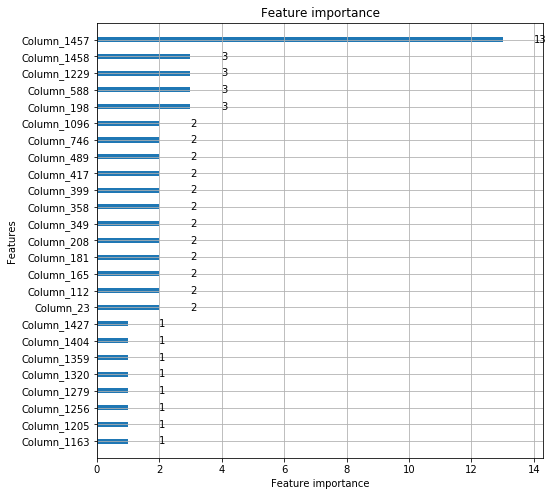

==< domain2_var1 >==
X_train : (4407, 1461)


C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:61: ExperimentalWarning: train is experimental (supported from v0.18.0). The interface can change in the future.
  ExperimentalWarning,
C:\Users\USER\anaconda3\envs\tf115\lib\site-packages\optuna\_experimental.py:83: ExperimentalWarning: LightGBMTuner is experimental (supported from v1.5.0). The interface can change in the future.
  ExperimentalWarning,

feature_fraction, val_score: inf:   0%|          | 0/7 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.30541	valid_1's rmse: 11.7799
Early stopping, best iteration is:
[3]	training's rmse: 11.3736	valid_1's rmse: 11.6985



feature_fraction, val_score: 11.698509:  14%|#4        | 1/7 [00:07<00:47,  7.88s/it][I 2020-06-28 22:06:17,085] Finished trial#0 with value: 11.69850850605455 with parameters: {'feature_fraction': 1.0}. Best is trial#0 with value: 11.69850850605455.

feature_fraction, val_score: 11.698509:  14%|#4        | 1/7 [00:08<00:47,  7.88s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.35722	valid_1's rmse: 11.8195
Early stopping, best iteration is:
[2]	training's rmse: 11.5243	valid_1's rmse: 11.7076



feature_fraction, val_score: 11.698509:  29%|##8       | 2/7 [00:12<00:35,  7.03s/it][I 2020-06-28 22:06:22,146] Finished trial#1 with value: 11.707577899337062 with parameters: {'feature_fraction': 0.8}. Best is trial#0 with value: 11.69850850605455.

feature_fraction, val_score: 11.698509:  29%|##8       | 2/7 [00:13<00:35,  7.03s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.42096	valid_1's rmse: 11.7493
Early stopping, best iteration is:
[1]	training's rmse: 11.6692	valid_1's rmse: 11.7115



feature_fraction, val_score: 11.698509:  43%|####2     | 3/7 [00:17<00:24,  6.22s/it][I 2020-06-28 22:06:26,497] Finished trial#2 with value: 11.711522651871034 with parameters: {'feature_fraction': 0.6}. Best is trial#0 with value: 11.69850850605455.

feature_fraction, val_score: 11.698509:  43%|####2     | 3/7 [00:17<00:24,  6.22s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.4427	valid_1's rmse: 11.7192
Early stopping, best iteration is:
[6]	training's rmse: 11.0136	valid_1's rmse: 11.6812



feature_fraction, val_score: 11.681228:  57%|#####7    | 4/7 [00:21<00:17,  5.75s/it][I 2020-06-28 22:06:31,137] Finished trial#3 with value: 11.681228403996931 with parameters: {'feature_fraction': 0.5}. Best is trial#3 with value: 11.681228403996931.

feature_fraction, val_score: 11.681228:  57%|#####7    | 4/7 [00:22<00:17,  5.75s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.32979	valid_1's rmse: 11.7679
Early stopping, best iteration is:
[1]	training's rmse: 11.6699	valid_1's rmse: 11.7075



feature_fraction, val_score: 11.681228:  71%|#######1  | 5/7 [00:27<00:11,  5.59s/it][I 2020-06-28 22:06:36,361] Finished trial#4 with value: 11.707488226197071 with parameters: {'feature_fraction': 0.8999999999999999}. Best is trial#3 with value: 11.681228403996931.

feature_fraction, val_score: 11.681228:  71%|#######1  | 5/7 [00:27<00:11,  5.59s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37204	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7419	valid_1's rmse: 11.6636



feature_fraction, val_score: 11.663631:  86%|########5 | 6/7 [00:33<00:05,  5.75s/it][I 2020-06-28 22:06:42,471] Finished trial#5 with value: 11.66363091248006 with parameters: {'feature_fraction': 0.7}. Best is trial#5 with value: 11.66363091248006.

feature_fraction, val_score: 11.663631:  86%|########5 | 6/7 [00:33<00:05,  5.75s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.51654	valid_1's rmse: 11.7683
Early stopping, best iteration is:
[5]	training's rmse: 11.1683	valid_1's rmse: 11.691



feature_fraction, val_score: 11.663631: 100%|##########| 7/7 [00:36<00:00,  5.28s/it]

num_leaves, val_score: 11.663631:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.27527	valid_1's rmse: 11.9224
Early stopping, best iteration is:
[2]	training's rmse: 11.065	valid_1's rmse: 11.7179



num_leaves, val_score: 11.663631:   5%|5         | 1/20 [00:10<03:27, 10.89s/it][I 2020-06-28 22:06:57,090] Finished trial#7 with value: 11.717943962136777 with parameters: {'num_leaves': 102}. Best is trial#7 with value: 11.717943962136777.

num_leaves, val_score: 11.663631:   5%|5         | 1/20 [00:11<03:27, 10.89s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.82192	valid_1's rmse: 11.944
Early stopping, best iteration is:
[1]	training's rmse: 11.4827	valid_1's rmse: 11.713



num_leaves, val_score: 11.663631:  10%|#         | 2/20 [00:21<03:13, 10.76s/it][I 2020-06-28 22:07:07,537] Finished trial#8 with value: 11.713007714912822 with parameters: {'num_leaves': 84}. Best is trial#8 with value: 11.713007714912822.

num_leaves, val_score: 11.663631:  10%|#         | 2/20 [00:21<03:13, 10.76s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.09676	valid_1's rmse: 11.8777
Early stopping, best iteration is:
[1]	training's rmse: 11.3083	valid_1's rmse: 11.7279



num_leaves, val_score: 11.663631:  15%|#5        | 3/20 [00:34<03:16, 11.55s/it][I 2020-06-28 22:07:20,950] Finished trial#9 with value: 11.727939190453867 with parameters: {'num_leaves': 190}. Best is trial#8 with value: 11.713007714912822.

num_leaves, val_score: 11.663631:  15%|#5        | 3/20 [00:34<03:16, 11.55s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.40659	valid_1's rmse: 11.8129
Early stopping, best iteration is:
[6]	training's rmse: 10.6333	valid_1's rmse: 11.7021



num_leaves, val_score: 11.663631:  20%|##        | 4/20 [00:42<02:47, 10.48s/it][I 2020-06-28 22:07:28,932] Finished trial#10 with value: 11.702113657881211 with parameters: {'num_leaves': 48}. Best is trial#10 with value: 11.702113657881211.

num_leaves, val_score: 11.663631:  20%|##        | 4/20 [00:42<02:47, 10.48s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.76395	valid_1's rmse: 11.9277
Early stopping, best iteration is:
[1]	training's rmse: 11.477	valid_1's rmse: 11.7152



num_leaves, val_score: 11.663631:  25%|##5       | 5/20 [00:52<02:35, 10.39s/it][I 2020-06-28 22:07:39,126] Finished trial#11 with value: 11.715176784858121 with parameters: {'num_leaves': 86}. Best is trial#10 with value: 11.702113657881211.

num_leaves, val_score: 11.663631:  25%|##5       | 5/20 [00:53<02:35, 10.39s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.09676	valid_1's rmse: 11.8777
Early stopping, best iteration is:
[1]	training's rmse: 11.3083	valid_1's rmse: 11.7279



num_leaves, val_score: 11.663631:  30%|###       | 6/20 [01:06<02:40, 11.46s/it][I 2020-06-28 22:07:53,063] Finished trial#12 with value: 11.727939190453867 with parameters: {'num_leaves': 232}. Best is trial#10 with value: 11.702113657881211.

num_leaves, val_score: 11.663631:  30%|###       | 6/20 [01:06<02:40, 11.46s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.41019	valid_1's rmse: 11.9026
Early stopping, best iteration is:
[1]	training's rmse: 11.4464	valid_1's rmse: 11.7172



num_leaves, val_score: 11.663631:  35%|###5      | 7/20 [01:18<02:29, 11.49s/it][I 2020-06-28 22:08:04,618] Finished trial#13 with value: 11.717232346877834 with parameters: {'num_leaves': 97}. Best is trial#10 with value: 11.702113657881211.

num_leaves, val_score: 11.663631:  35%|###5      | 7/20 [01:18<02:29, 11.49s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 6.31995	valid_1's rmse: 11.8891
Early stopping, best iteration is:
[1]	training's rmse: 11.4358	valid_1's rmse: 11.7168



num_leaves, val_score: 11.663631:  40%|####      | 8/20 [01:28<02:14, 11.17s/it][I 2020-06-28 22:08:15,051] Finished trial#14 with value: 11.716805364783358 with parameters: {'num_leaves': 101}. Best is trial#10 with value: 11.702113657881211.

num_leaves, val_score: 11.663631:  40%|####      | 8/20 [01:28<02:14, 11.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 7.29027	valid_1's rmse: 11.8245
Early stopping, best iteration is:
[2]	training's rmse: 11.2369	valid_1's rmse: 11.6954



num_leaves, val_score: 11.663631:  45%|####5     | 9/20 [01:38<01:58, 10.74s/it][I 2020-06-28 22:08:24,769] Finished trial#15 with value: 11.695449834016333 with parameters: {'num_leaves': 72}. Best is trial#15 with value: 11.695449834016333.

num_leaves, val_score: 11.663631:  45%|####5     | 9/20 [01:38<01:58, 10.74s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.09676	valid_1's rmse: 11.8777
Early stopping, best iteration is:
[1]	training's rmse: 11.3083	valid_1's rmse: 11.7279



num_leaves, val_score: 11.663631:  50%|#####     | 10/20 [01:53<01:59, 11.91s/it][I 2020-06-28 22:08:39,418] Finished trial#16 with value: 11.727939190453867 with parameters: {'num_leaves': 206}. Best is trial#15 with value: 11.695449834016333.

num_leaves, val_score: 11.663631:  50%|#####     | 10/20 [01:53<01:59, 11.91s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.8465	valid_1's rmse: 11.7228
Early stopping, best iteration is:
[10]	training's rmse: 11.2982	valid_1's rmse: 11.6851



num_leaves, val_score: 11.663631:  55%|#####5    | 11/20 [01:55<01:22,  9.13s/it][I 2020-06-28 22:08:42,067] Finished trial#17 with value: 11.685124650614476 with parameters: {'num_leaves': 11}. Best is trial#17 with value: 11.685124650614476.

num_leaves, val_score: 11.663631:  55%|#####5    | 11/20 [01:56<01:22,  9.13s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.3615	valid_1's rmse: 11.6913
Early stopping, best iteration is:
[11]	training's rmse: 10.9658	valid_1's rmse: 11.6778



num_leaves, val_score: 11.663631:  60%|######    | 12/20 [01:59<00:59,  7.46s/it][I 2020-06-28 22:08:45,642] Finished trial#18 with value: 11.677752956525753 with parameters: {'num_leaves': 17}. Best is trial#18 with value: 11.677752956525753.

num_leaves, val_score: 11.663631:  60%|######    | 12/20 [01:59<00:59,  7.46s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 11.1215	valid_1's rmse: 11.7243
Early stopping, best iteration is:
[14]	training's rmse: 11.3084	valid_1's rmse: 11.6964



num_leaves, val_score: 11.663631:  65%|######5   | 13/20 [02:01<00:40,  5.82s/it][I 2020-06-28 22:08:47,605] Finished trial#19 with value: 11.696396838211825 with parameters: {'num_leaves': 8}. Best is trial#18 with value: 11.677752956525753.

num_leaves, val_score: 11.663631:  65%|######5   | 13/20 [02:01<00:40,  5.82s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 11.5863	valid_1's rmse: 11.6942
Early stopping, best iteration is:
[19]	training's rmse: 11.5954	valid_1's rmse: 11.6922



num_leaves, val_score: 11.663631:  70%|#######   | 14/20 [02:02<00:26,  4.35s/it][I 2020-06-28 22:08:48,539] Finished trial#20 with value: 11.692174975819988 with parameters: {'num_leaves': 3}. Best is trial#18 with value: 11.677752956525753.

num_leaves, val_score: 11.663631:  70%|#######   | 14/20 [02:02<00:26,  4.35s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37204	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7419	valid_1's rmse: 11.6636



num_leaves, val_score: 11.663631:  75%|#######5  | 15/20 [02:08<00:25,  5.04s/it][I 2020-06-28 22:08:55,177] Finished trial#21 with value: 11.66363091248006 with parameters: {'num_leaves': 31}. Best is trial#21 with value: 11.66363091248006.

num_leaves, val_score: 11.663631:  75%|#######5  | 15/20 [02:09<00:25,  5.04s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.19404	valid_1's rmse: 11.8777
Early stopping, best iteration is:
[1]	training's rmse: 11.3213	valid_1's rmse: 11.7234



num_leaves, val_score: 11.663631:  80%|########  | 16/20 [02:22<00:30,  7.62s/it][I 2020-06-28 22:09:08,832] Finished trial#22 with value: 11.72340236472852 with parameters: {'num_leaves': 155}. Best is trial#21 with value: 11.66363091248006.

num_leaves, val_score: 11.663631:  80%|########  | 16/20 [02:22<00:30,  7.62s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 8.5131	valid_1's rmse: 11.8033
Early stopping, best iteration is:
[2]	training's rmse: 11.4122	valid_1's rmse: 11.7039



num_leaves, val_score: 11.663631:  85%|########5 | 17/20 [02:29<00:21,  7.31s/it][I 2020-06-28 22:09:15,401] Finished trial#23 with value: 11.703858494513328 with parameters: {'num_leaves': 46}. Best is trial#21 with value: 11.66363091248006.

num_leaves, val_score: 11.663631:  85%|########5 | 17/20 [02:29<00:21,  7.31s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.15123	valid_1's rmse: 11.6955
Early stopping, best iteration is:
[11]	training's rmse: 10.2365	valid_1's rmse: 11.679



num_leaves, val_score: 11.663631:  90%|######### | 18/20 [02:36<00:14,  7.37s/it][I 2020-06-28 22:09:22,932] Finished trial#24 with value: 11.679016512417816 with parameters: {'num_leaves': 35}. Best is trial#21 with value: 11.66363091248006.

num_leaves, val_score: 11.663631:  90%|######### | 18/20 [02:36<00:14,  7.37s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 5.46346	valid_1's rmse: 11.8971
Early stopping, best iteration is:
[1]	training's rmse: 11.3517	valid_1's rmse: 11.7198



num_leaves, val_score: 11.663631:  95%|#########5| 19/20 [02:49<00:08,  8.84s/it][I 2020-06-28 22:09:35,216] Finished trial#25 with value: 11.719831910113482 with parameters: {'num_leaves': 137}. Best is trial#21 with value: 11.66363091248006.

num_leaves, val_score: 11.663631:  95%|#########5| 19/20 [02:49<00:08,  8.84s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 10.2109	valid_1's rmse: 11.7331
Early stopping, best iteration is:
[11]	training's rmse: 10.8802	valid_1's rmse: 11.6875



num_leaves, val_score: 11.663631: 100%|##########| 20/20 [02:54<00:00,  8.71s/it]

bagging, val_score: 11.663631:   0%|          | 0/10 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.4371	valid_1's rmse: 11.7609
Early stopping, best iteration is:
[10]	training's rmse: 10.5056	valid_1's rmse: 11.6795



bagging, val_score: 11.663631:  10%|#         | 1/10 [00:05<00:50,  5.65s/it][I 2020-06-28 22:09:45,996] Finished trial#27 with value: 11.67952650912193 with parameters: {'bagging_fraction': 0.8747767802580343, 'bagging_freq': 4}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  10%|#         | 1/10 [00:05<00:50,  5.65s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.41662	valid_1's rmse: 11.7688
Early stopping, best iteration is:
[4]	training's rmse: 11.2704	valid_1's rmse: 11.718



bagging, val_score: 11.663631:  20%|##        | 2/10 [00:10<00:43,  5.43s/it][I 2020-06-28 22:09:50,915] Finished trial#28 with value: 11.717973971897703 with parameters: {'bagging_fraction': 0.9129226620370091, 'bagging_freq': 5}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  20%|##        | 2/10 [00:10<00:43,  5.43s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.63572	valid_1's rmse: 11.7875
Early stopping, best iteration is:
[1]	training's rmse: 11.6936	valid_1's rmse: 11.7207



bagging, val_score: 11.663631:  30%|###       | 3/10 [00:15<00:36,  5.19s/it][I 2020-06-28 22:09:55,558] Finished trial#29 with value: 11.720664576614595 with parameters: {'bagging_fraction': 0.5815650360968502, 'bagging_freq': 4}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  30%|###       | 3/10 [00:15<00:36,  5.19s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.77013	valid_1's rmse: 11.8334
Early stopping, best iteration is:
[1]	training's rmse: 11.6813	valid_1's rmse: 11.7418



bagging, val_score: 11.663631:  40%|####      | 4/10 [00:19<00:28,  4.81s/it][I 2020-06-28 22:09:59,472] Finished trial#30 with value: 11.74184229716028 with parameters: {'bagging_fraction': 0.5105584627184206, 'bagging_freq': 6}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  40%|####      | 4/10 [00:19<00:28,  4.81s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.78709	valid_1's rmse: 11.9421
Early stopping, best iteration is:
[2]	training's rmse: 11.5775	valid_1's rmse: 11.7352



bagging, val_score: 11.663631:  50%|#####     | 5/10 [00:22<00:22,  4.52s/it][I 2020-06-28 22:10:03,328] Finished trial#31 with value: 11.735191158124298 with parameters: {'bagging_fraction': 0.4163658349486873, 'bagging_freq': 1}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  50%|#####     | 5/10 [00:23<00:22,  4.52s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.87871	valid_1's rmse: 11.849
Early stopping, best iteration is:
[5]	training's rmse: 11.2608	valid_1's rmse: 11.7077



bagging, val_score: 11.663631:  60%|######    | 6/10 [00:27<00:17,  4.44s/it][I 2020-06-28 22:10:07,558] Finished trial#32 with value: 11.70772169232355 with parameters: {'bagging_fraction': 0.45608044326036995, 'bagging_freq': 5}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  60%|######    | 6/10 [00:27<00:17,  4.44s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.4589	valid_1's rmse: 11.8128
Early stopping, best iteration is:
[6]	training's rmse: 11.0024	valid_1's rmse: 11.7027



bagging, val_score: 11.663631:  70%|#######   | 7/10 [00:33<00:14,  4.86s/it][I 2020-06-28 22:10:13,420] Finished trial#33 with value: 11.702684630896513 with parameters: {'bagging_fraction': 0.8356720879775288, 'bagging_freq': 3}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  70%|#######   | 7/10 [00:33<00:14,  4.86s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.49942	valid_1's rmse: 11.8454
Early stopping, best iteration is:
[5]	training's rmse: 11.1479	valid_1's rmse: 11.6937



bagging, val_score: 11.663631:  80%|########  | 8/10 [00:37<00:09,  4.87s/it][I 2020-06-28 22:10:18,299] Finished trial#34 with value: 11.693743583800812 with parameters: {'bagging_fraction': 0.7985869142767636, 'bagging_freq': 7}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  80%|########  | 8/10 [00:38<00:09,  4.87s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.7167	valid_1's rmse: 11.8386
Early stopping, best iteration is:
[7]	training's rmse: 11.0109	valid_1's rmse: 11.6919



bagging, val_score: 11.663631:  90%|######### | 9/10 [00:42<00:04,  4.79s/it][I 2020-06-28 22:10:22,902] Finished trial#35 with value: 11.691929207276063 with parameters: {'bagging_fraction': 0.4513967088631352, 'bagging_freq': 2}. Best is trial#27 with value: 11.67952650912193.

bagging, val_score: 11.663631:  90%|######### | 9/10 [00:42<00:04,  4.79s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.64359	valid_1's rmse: 11.8346
Early stopping, best iteration is:
[1]	training's rmse: 11.6839	valid_1's rmse: 11.7353



bagging, val_score: 11.663631: 100%|##########| 10/10 [00:47<00:00,  4.72s/it]

feature_fraction_stage2, val_score: 11.663631:   0%|          | 0/6 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.3701	valid_1's rmse: 11.7869
Early stopping, best iteration is:
[5]	training's rmse: 11.1131	valid_1's rmse: 11.6838



feature_fraction_stage2, val_score: 11.663631:  17%|#6        | 1/6 [00:05<00:28,  5.68s/it][I 2020-06-28 22:10:33,235] Finished trial#37 with value: 11.683765468129465 with parameters: {'feature_fraction': 0.748}. Best is trial#37 with value: 11.683765468129465.

feature_fraction_stage2, val_score: 11.663631:  17%|#6        | 1/6 [00:05<00:28,  5.68s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.40345	valid_1's rmse: 11.796
Early stopping, best iteration is:
[1]	training's rmse: 11.6692	valid_1's rmse: 11.7115



feature_fraction_stage2, val_score: 11.663631:  33%|###3      | 2/6 [00:09<00:20,  5.16s/it][I 2020-06-28 22:10:37,184] Finished trial#38 with value: 11.711522651871034 with parameters: {'feature_fraction': 0.62}. Best is trial#37 with value: 11.683765468129465.

feature_fraction_stage2, val_score: 11.663631:  33%|###3      | 2/6 [00:09<00:20,  5.16s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37037	valid_1's rmse: 11.7922
Early stopping, best iteration is:
[9]	training's rmse: 10.6144	valid_1's rmse: 11.691



feature_fraction_stage2, val_score: 11.663631:  50%|#####     | 3/6 [00:16<00:16,  5.54s/it][I 2020-06-28 22:10:43,603] Finished trial#39 with value: 11.690999597397857 with parameters: {'feature_fraction': 0.6839999999999999}. Best is trial#37 with value: 11.683765468129465.

feature_fraction_stage2, val_score: 11.663631:  50%|#####     | 3/6 [00:16<00:16,  5.54s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.35231	valid_1's rmse: 11.7445
Early stopping, best iteration is:
[6]	training's rmse: 10.9733	valid_1's rmse: 11.6663



feature_fraction_stage2, val_score: 11.663631:  67%|######6   | 4/6 [00:21<00:11,  5.61s/it][I 2020-06-28 22:10:49,364] Finished trial#40 with value: 11.666328564859109 with parameters: {'feature_fraction': 0.7799999999999999}. Best is trial#40 with value: 11.666328564859109.

feature_fraction_stage2, val_score: 11.663631:  67%|######6   | 4/6 [00:21<00:11,  5.61s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.38377	valid_1's rmse: 11.7756
Early stopping, best iteration is:
[1]	training's rmse: 11.6692	valid_1's rmse: 11.7115



feature_fraction_stage2, val_score: 11.663631:  83%|########3 | 5/6 [00:25<00:05,  5.14s/it][I 2020-06-28 22:10:53,421] Finished trial#41 with value: 11.711522651871034 with parameters: {'feature_fraction': 0.652}. Best is trial#40 with value: 11.666328564859109.

feature_fraction_stage2, val_score: 11.663631:  83%|########3 | 5/6 [00:26<00:05,  5.14s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.38503	valid_1's rmse: 11.7384
Early stopping, best iteration is:
[11]	training's rmse: 10.3822	valid_1's rmse: 11.6883



feature_fraction_stage2, val_score: 11.663631: 100%|##########| 6/6 [00:33<00:00,  5.52s/it]

regularization_factors, val_score: 11.663631:   0%|          | 0/20 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.40508	valid_1's rmse: 11.7647
Early stopping, best iteration is:
[5]	training's rmse: 11.1322	valid_1's rmse: 11.6917



regularization_factors, val_score: 11.663631:   5%|5         | 1/20 [00:04<01:32,  4.89s/it][I 2020-06-28 22:11:05,587] Finished trial#43 with value: 11.69168564309942 with parameters: {'lambda_l1': 2.281279859269352e-06, 'lambda_l2': 0.41451934328401013}. Best is trial#43 with value: 11.69168564309942.

regularization_factors, val_score: 11.663631:   5%|5         | 1/20 [00:05<01:32,  4.89s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.42277	valid_1's rmse: 11.8359
Early stopping, best iteration is:
[3]	training's rmse: 11.4056	valid_1's rmse: 11.7148



regularization_factors, val_score: 11.663631:  10%|#         | 2/20 [00:09<01:27,  4.87s/it][I 2020-06-28 22:11:10,398] Finished trial#44 with value: 11.714834446801339 with parameters: {'lambda_l1': 3.4669630419442914, 'lambda_l2': 1.14351066878509}. Best is trial#43 with value: 11.69168564309942.

regularization_factors, val_score: 11.663631:  10%|#         | 2/20 [00:09<01:27,  4.87s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.40462	valid_1's rmse: 11.7648
Early stopping, best iteration is:
[5]	training's rmse: 11.1321	valid_1's rmse: 11.6917



regularization_factors, val_score: 11.663631:  15%|#5        | 3/20 [00:15<01:28,  5.19s/it][I 2020-06-28 22:11:16,334] Finished trial#45 with value: 11.691693253367067 with parameters: {'lambda_l1': 0.007783624055323565, 'lambda_l2': 0.40161482283006633}. Best is trial#43 with value: 11.69168564309942.

regularization_factors, val_score: 11.663631:  15%|#5        | 3/20 [00:15<01:28,  5.19s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.3757	valid_1's rmse: 11.7415
Early stopping, best iteration is:
[8]	training's rmse: 10.74	valid_1's rmse: 11.6601



regularization_factors, val_score: 11.660062:  20%|##        | 4/20 [00:21<01:25,  5.32s/it][I 2020-06-28 22:11:21,967] Finished trial#46 with value: 11.660062308545749 with parameters: {'lambda_l1': 3.4529624495311806e-06, 'lambda_l2': 0.11100973491181507}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  20%|##        | 4/20 [00:21<01:25,  5.32s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37293	valid_1's rmse: 11.7084
Early stopping, best iteration is:
[8]	training's rmse: 10.7416	valid_1's rmse: 11.6635



regularization_factors, val_score: 11.660062:  25%|##5       | 5/20 [00:26<01:21,  5.41s/it][I 2020-06-28 22:11:27,567] Finished trial#47 with value: 11.663486069445534 with parameters: {'lambda_l1': 0.40367656163330273, 'lambda_l2': 2.5523832045193026e-08}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  25%|##5       | 5/20 [00:27<01:21,  5.41s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37204	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7419	valid_1's rmse: 11.6636



regularization_factors, val_score: 11.660062:  30%|###       | 6/20 [00:33<01:20,  5.76s/it][I 2020-06-28 22:11:34,146] Finished trial#48 with value: 11.66363091233768 with parameters: {'lambda_l1': 2.8513213643153437e-06, 'lambda_l2': 1.9821985442194512e-08}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  30%|###       | 6/20 [00:33<01:20,  5.76s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.36436	valid_1's rmse: 11.6952
Early stopping, best iteration is:
[8]	training's rmse: 10.7409	valid_1's rmse: 11.6626



regularization_factors, val_score: 11.660062:  35%|###5      | 7/20 [00:39<01:14,  5.75s/it][I 2020-06-28 22:11:39,868] Finished trial#49 with value: 11.66258789599665 with parameters: {'lambda_l1': 0.00010604780772504208, 'lambda_l2': 0.016469135754823606}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  35%|###5      | 7/20 [00:39<01:14,  5.75s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37018	valid_1's rmse: 11.7901
Early stopping, best iteration is:
[8]	training's rmse: 10.7416	valid_1's rmse: 11.6901



regularization_factors, val_score: 11.660062:  40%|####      | 8/20 [00:45<01:09,  5.82s/it][I 2020-06-28 22:11:45,848] Finished trial#50 with value: 11.690111754382137 with parameters: {'lambda_l1': 5.144225754531523e-06, 'lambda_l2': 0.1620912789827142}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  40%|####      | 8/20 [00:45<01:09,  5.82s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.46457	valid_1's rmse: 11.7576
Early stopping, best iteration is:
[9]	training's rmse: 10.6732	valid_1's rmse: 11.6958



regularization_factors, val_score: 11.660062:  45%|####5     | 9/20 [00:51<01:07,  6.10s/it][I 2020-06-28 22:11:52,600] Finished trial#51 with value: 11.69580042944649 with parameters: {'lambda_l1': 0.9592972947912869, 'lambda_l2': 3.011118007328256}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  45%|####5     | 9/20 [00:52<01:07,  6.10s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.39953	valid_1's rmse: 11.8087
Early stopping, best iteration is:
[3]	training's rmse: 11.3967	valid_1's rmse: 11.6939



regularization_factors, val_score: 11.660062:  50%|#####     | 10/20 [00:56<00:56,  5.68s/it][I 2020-06-28 22:11:57,316] Finished trial#52 with value: 11.693940454134369 with parameters: {'lambda_l1': 0.6755725287348306, 'lambda_l2': 0.17457676920936807}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  50%|#####     | 10/20 [00:56<00:56,  5.68s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37205	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7419	valid_1's rmse: 11.6636



regularization_factors, val_score: 11.660062:  55%|#####5    | 11/20 [01:03<00:53,  5.91s/it][I 2020-06-28 22:12:03,760] Finished trial#53 with value: 11.663630858087242 with parameters: {'lambda_l1': 2.451218343776217e-08, 'lambda_l2': 0.0001328041112812246}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  55%|#####5    | 11/20 [01:03<00:53,  5.91s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.3721	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7419	valid_1's rmse: 11.6636



regularization_factors, val_score: 11.660062:  60%|######    | 12/20 [01:08<00:47,  5.89s/it][I 2020-06-28 22:12:09,591] Finished trial#54 with value: 11.663630349177932 with parameters: {'lambda_l1': 0.00016834493708250134, 'lambda_l2': 0.0013619272625722731}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  60%|######    | 12/20 [01:09<00:47,  5.89s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37213	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.742	valid_1's rmse: 11.6636



regularization_factors, val_score: 11.660062:  65%|######5   | 13/20 [01:14<00:40,  5.81s/it][I 2020-06-28 22:12:15,201] Finished trial#55 with value: 11.663630078607998 with parameters: {'lambda_l1': 0.00033726134862741193, 'lambda_l2': 0.0020077796423945576}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  65%|######5   | 13/20 [01:14<00:40,  5.81s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37204	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7419	valid_1's rmse: 11.6636



regularization_factors, val_score: 11.660062:  70%|#######   | 14/20 [01:21<00:36,  6.02s/it][I 2020-06-28 22:12:21,729] Finished trial#56 with value: 11.663630908618822 with parameters: {'lambda_l1': 1.377654415322969e-08, 'lambda_l2': 9.040481713623477e-06}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  70%|#######   | 14/20 [01:21<00:36,  6.02s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37236	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7421	valid_1's rmse: 11.6636



regularization_factors, val_score: 11.660062:  75%|#######5  | 15/20 [01:26<00:29,  5.93s/it][I 2020-06-28 22:12:27,436] Finished trial#57 with value: 11.66362783857033 with parameters: {'lambda_l1': 0.00010229283860917576, 'lambda_l2': 0.00752970358369947}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  75%|#######5  | 15/20 [01:26<00:29,  5.93s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.36466	valid_1's rmse: 11.6953
Early stopping, best iteration is:
[8]	training's rmse: 10.7411	valid_1's rmse: 11.6626



regularization_factors, val_score: 11.660062:  80%|########  | 16/20 [01:33<00:24,  6.07s/it][I 2020-06-28 22:12:33,861] Finished trial#58 with value: 11.66258524470431 with parameters: {'lambda_l1': 1.8867609496145954e-07, 'lambda_l2': 0.023310326346182506}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  80%|########  | 16/20 [01:33<00:24,  6.07s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37204	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7419	valid_1's rmse: 11.6636



regularization_factors, val_score: 11.660062:  85%|########5 | 17/20 [01:39<00:18,  6.17s/it][I 2020-06-28 22:12:40,235] Finished trial#59 with value: 11.66363090255446 with parameters: {'lambda_l1': 1.5599374779418944e-07, 'lambda_l2': 2.4494528628857193e-05}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  85%|########5 | 17/20 [01:39<00:18,  6.17s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.36483	valid_1's rmse: 11.6953
Early stopping, best iteration is:
[8]	training's rmse: 10.7412	valid_1's rmse: 11.6626



regularization_factors, val_score: 11.660062:  90%|######### | 18/20 [01:45<00:11,  6.00s/it][I 2020-06-28 22:12:45,840] Finished trial#60 with value: 11.662583715002402 with parameters: {'lambda_l1': 3.959535735890477e-07, 'lambda_l2': 0.027255876461360524}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  90%|######### | 18/20 [01:45<00:11,  6.00s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.59475	valid_1's rmse: 11.7835
Early stopping, best iteration is:
[5]	training's rmse: 11.1894	valid_1's rmse: 11.6969



regularization_factors, val_score: 11.660062:  95%|#########5| 19/20 [01:51<00:06,  6.05s/it][I 2020-06-28 22:12:51,987] Finished trial#61 with value: 11.696886028154669 with parameters: {'lambda_l1': 2.353532524392911e-07, 'lambda_l2': 9.8269667918719}. Best is trial#46 with value: 11.660062308545749.

regularization_factors, val_score: 11.660062:  95%|#########5| 19/20 [01:51<00:06,  6.05s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.37204	valid_1's rmse: 11.6964
Early stopping, best iteration is:
[8]	training's rmse: 10.7419	valid_1's rmse: 11.6636



regularization_factors, val_score: 11.660062: 100%|##########| 20/20 [01:57<00:00,  5.85s/it]

min_data_in_leaf, val_score: 11.660062:   0%|          | 0/5 [00:00<?, ?it/s]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.40684	valid_1's rmse: 11.7531
Early stopping, best iteration is:
[5]	training's rmse: 11.1269	valid_1's rmse: 11.6934



min_data_in_leaf, val_score: 11.660062:  20%|##        | 1/5 [00:05<00:20,  5.03s/it][I 2020-06-28 22:13:02,750] Finished trial#63 with value: 11.693356383641312 with parameters: {'min_child_samples': 25}. Best is trial#63 with value: 11.693356383641312.

min_data_in_leaf, val_score: 11.660062:  20%|##        | 1/5 [00:05<00:20,  5.03s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.33692	valid_1's rmse: 11.7574
Early stopping, best iteration is:
[9]	training's rmse: 10.606	valid_1's rmse: 11.7107



min_data_in_leaf, val_score: 11.660062:  40%|####      | 2/5 [00:12<00:17,  5.82s/it][I 2020-06-28 22:13:10,425] Finished trial#64 with value: 11.710685006775428 with parameters: {'min_child_samples': 10}. Best is trial#63 with value: 11.693356383641312.

min_data_in_leaf, val_score: 11.660062:  40%|####      | 2/5 [00:12<00:17,  5.82s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.6606	valid_1's rmse: 11.7167
Early stopping, best iteration is:
[7]	training's rmse: 10.9728	valid_1's rmse: 11.6652



min_data_in_leaf, val_score: 11.660062:  60%|######    | 3/5 [00:16<00:10,  5.11s/it][I 2020-06-28 22:13:13,872] Finished trial#65 with value: 11.66515641654417 with parameters: {'min_child_samples': 100}. Best is trial#65 with value: 11.66515641654417.

min_data_in_leaf, val_score: 11.660062:  60%|######    | 3/5 [00:16<00:10,  5.11s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.4754	valid_1's rmse: 11.7409
Early stopping, best iteration is:
[7]	training's rmse: 10.912	valid_1's rmse: 11.6926



min_data_in_leaf, val_score: 11.660062:  80%|########  | 4/5 [00:20<00:04,  4.96s/it][I 2020-06-28 22:13:18,492] Finished trial#66 with value: 11.692606908810738 with parameters: {'min_child_samples': 50}. Best is trial#65 with value: 11.66515641654417.

min_data_in_leaf, val_score: 11.660062:  80%|########  | 4/5 [00:20<00:04,  4.96s/it]

Training until validation scores don't improve for 20 rounds
[20]	training's rmse: 9.32874	valid_1's rmse: 11.7737
Early stopping, best iteration is:
[4]	training's rmse: 11.2306	valid_1's rmse: 11.7109



min_data_in_leaf, val_score: 11.660062: 100%|##########| 5/5 [00:27<00:00,  5.55s/it]


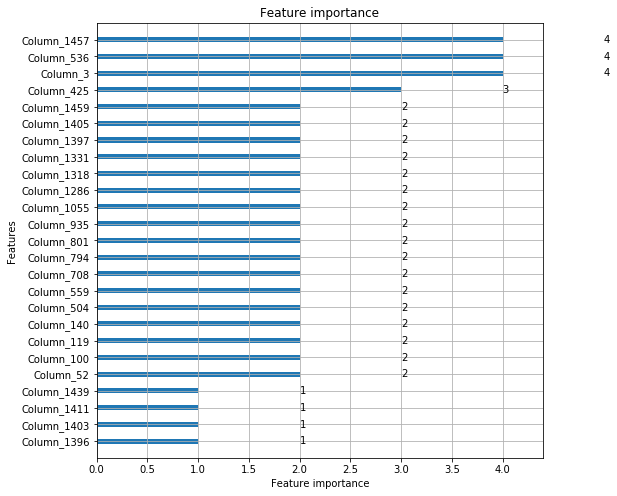

array([0.15011453, 0.14525839, 0.13918568, 0.1813179 , 0.17655867])

In [7]:
# lightGBM(optuna)

X = df_7.iloc[:, 6:].values
y = df_7.iloc[:, 1:6].values
X_train, X_val, y_train, y_val = train_test_split(
    X, y, random_state=1, train_size=0.75)

targets = ['domain1_var2', 'domain1_var1', 'age', 'domain2_var2', 'domain2_var1']
preds = np.empty_like(y_val)
opts_7 = []

for i, target in enumerate(targets):
    print('==< {} >=='.format(target))
    print('X_train :', X_train.shape)
    y_tr = y_train[:, i]
    y_vl = y_val[:, i]
    
    lgb_train = lgb.Dataset(X_train, y_tr)
    lgb_eval = lgb.Dataset(X_val, y_vl)
    params = {'task': 'train', 
              'boosting_type': 'gbdt', 
              'objective': 'regression', 
              'metric': 'rmse'}

    model = lgb.train(params, lgb_train, num_boost_round=250,
                      early_stopping_rounds=20,
                      valid_sets=[lgb_train, lgb_eval],
                      verbose_eval=20)

    opts_7.append(model)
    
    ad_train = model.predict(X_train)
    X_train = np.hstack([X_train, ad_train[:,None]])
    ad_val = model.predict(X_val)
    X_val = np.hstack([X_val, ad_val[:,None]])
    preds[:, i] = ad_val
    
    lgb.plot_importance(model, max_num_features=25, height=0.3, figsize=(8,8))
    plt.show()

scores = np.sum(np.abs(y_val - preds), axis=0) / np.sum(preds, axis=0)
scores

作成したモデルを別に使用できるよう、保存する

In [ ]:
import pickle
filename = 'opts_7.sav'
pickle.dump(models, open(filename, 'wb'))